In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for expanding dataframe and displaying all columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

### Load Data and Data Checks

In [551]:
# Importing csv
Consumer_Electronics_DF = pd.read_csv('ConsumerElectronics.csv',na_values=['\\N',''])

In [552]:
# Check the head of the dataset
Consumer_Electronics_DF.head()

fsn_id           order_date  Year  Month      order_id  order_item_id   gmv  units  deliverybdays  deliverycdays s1_fact.order_payment_type  sla                 cust_id                 pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015  10     3.419301e+15  3.419301e+15   6400  1     NaN            NaN             COD                        5    -1.01299130778588E+018  -7.79175582905735E+018  CE                              CameraAccessory           CameraAccessory               CameraTripod              7190         0                      
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015  10     1.420831e+15  1.420831e+15   6900  1     NaN            NaN             COD                        7    -8.99032457905512E+018  7.33541149097431E+018   CE                              CameraAccessory           CameraAccessory               CameraTripod              7190         0                      
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015  10     2.421913e+15  2.421913e+15   1990  1     NaN            NaN             COD                        10   -1.0404429420466E+018   -7.47768776228657E+018  CE                              CameraAccessory           CameraAccessory               CameraTripod              2099         3                      
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015  10     4.416592e+15  4.416592e+15   1690  1     NaN            NaN             Prepaid                    4    -7.60496084352714E+018  -5.83593163877661E+018  CE                              CameraAccessory           CameraAccessory               CameraTripod              2099         3                      
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015  10     4.419525e+15  4.419525e+15   1618  1     NaN            NaN             Prepaid                    6    2.8945572083453E+018    5.34735360997242E+017   CE                              CameraAccessory           CameraAccessory               CameraTripod              2099         3

In [553]:
#Drop Duplicate Values (If Any)

Consumer_Electronics_DF = Consumer_Electronics_DF.drop_duplicates()

In [554]:
# Check for Rows & Columns count
print(Consumer_Electronics_DF.shape)

(1543981, 20)


In [555]:
Consumer_Electronics_DF.describe()

Year         Month      order_id  order_item_id         units  deliverybdays  deliverycdays           sla   product_mrp  product_procurement_sla
count  1.543981e+06  1.543981e+06  1.543981e+06  1.543981e+06   1.543981e+06  335802.000000  335803.000000  1.543981e+06  1.543981e+06  1.543981e+06           
mean   2.015554e+03  6.422019e+00  2.837023e+15  9.201482e+15   1.022026e+00  4.575271       5.248211       5.683773e+00  4.164509e+03  5.348075e+00           
std    4.971066e-01  3.687461e+00  1.286431e+15  4.306844e+16   2.555464e-01  3.382590       12.522272      2.992970e+00  8.604990e+03  5.296503e+01           
min    2.015000e+03  1.000000e+00  7.633152e+07  1.080165e+08   1.000000e+00 -98.000000     -5345.000000    0.000000e+00  0.000000e+00 -1.000000e+00           
25%    2.015000e+03  3.000000e+00  1.597105e+15  1.599648e+15   1.000000e+00  3.000000       3.000000       4.000000e+00  7.990000e+02  1.000000e+00           
50%    2.016000e+03  6.000000e+00  2.610074e+15  2.612942e+15   1.000000e+00  4.000000       5.000000       6.000000e+00  1.599000e+03  2.000000e+00           
75%    2.016000e+03  1.000000e+01  3.615673e+15  3.641475e+15   1.000000e+00  6.000000       7.000000       7.000000e+00  3.499000e+03  3.000000e+00           
max    2.016000e+03  1.200000e+01  5.395077e+15  3.000373e+17   5.000000e+01  238.000000     278.000000     1.006000e+03  2.999990e+05  1.000000e+03

In [556]:
Consumer_Electronics_DF['gmv'] = Consumer_Electronics_DF['gmv'].str.strip()

In [557]:
# get percentage of null values for column in descending order
num_rows = Consumer_Electronics_DF.shape[0] 
print((Consumer_Electronics_DF.isnull().sum() * 100/num_rows).sort_values(ascending=False))

deliverybdays                      78.250898
deliverycdays                      78.250833
gmv                                63.668141
product_analytic_vertical          0.375652 
order_date                         0.000000 
Year                               0.000000 
Month                              0.000000 
order_id                           0.000000 
order_item_id                      0.000000 
units                              0.000000 
product_procurement_sla            0.000000 
product_mrp                        0.000000 
s1_fact.order_payment_type         0.000000 
sla                                0.000000 
cust_id                            0.000000 
pincode                            0.000000 
product_analytic_super_category    0.000000 
product_analytic_category          0.000000 
product_analytic_sub_category      0.000000 
fsn_id                             0.000000 
dtype: float64


#### Remove Columns having more than 70% Null values

In [558]:
Consumer_Electronics_DF = Consumer_Electronics_DF.drop(['deliverybdays','deliverycdays'], 1)

#### We have to use the data from July 2015 to June 2016, Hence filtering on the required date range

In [559]:
Consumer_Electronics_DF.groupby(['Year','Month']).size()


Year  Month
2015  5        1     
      6        6     
      7        88683 
      8        158   
      9        104625
      10       207231
      11       130202
      12       158151
2016  1        143765
      2        144072
      3        153297
      4        134325
      5        157071
      6        121792
      7        602   
dtype: int64

In [560]:
#Filter the Data frame only for the required Window (i.e. July2015 to July2016)
Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF.drop(Consumer_Electronics_DF[(Consumer_Electronics_DF['Year'] == 2015) & (Consumer_Electronics_DF['Month'] == 5)].index)
Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF_Filtered.drop(Consumer_Electronics_DF_Filtered[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 6)].index)
Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF_Filtered.drop(Consumer_Electronics_DF_Filtered[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 7)].index)

In [561]:
Consumer_Electronics_DF_Filtered.groupby(['Year','Month']).size()

Year  Month
2015  7        88683 
      8        158   
      9        104625
      10       207231
      11       130202
      12       158151
2016  1        143765
      2        144072
      3        153297
      4        134325
      5        157071
      6        121792
dtype: int64

### We have to create market mix models for three product subcategories  - camera accessory, home audio & and gaming accessory

In [562]:
Consumer_Electronics_DF_Filtered.groupby(['product_analytic_category','product_analytic_sub_category']).size()


product_analytic_category  product_analytic_sub_category
Camera                     Camera                           96492 
CameraAccessory            CameraAccessory                  223269
                           CameraStorage                    16726 
EntertainmentSmall         AmplifierReceiver                3470  
                           AudioAccessory                   10765 
                           AudioMP3Player                   104721
                           HomeAudio                        115591
                           HomeTheatre                      4206  
                           Speaker                          509259
                           TVVideoSmall                     133627
GameCDDVD                  Game                             107815
                           GameMembershipCards              97    
GamingHardware             GamingAccessory                  189582
                           GamingConsole                    27752 
dtype

### Filter on the required Product categories

In [563]:
Category = ['CameraAccessory','GamingAccessory','HomeAudio']
Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF_Filtered[Consumer_Electronics_DF_Filtered.product_analytic_sub_category.isin(Category)]

In [564]:
# get percentage of null values for column in descending order
num_rows = Consumer_Electronics_DF_Filtered.shape[0] 
print((Consumer_Electronics_DF_Filtered.isnull().sum() * 100/num_rows).sort_values(ascending=False))

gmv                                64.411799
product_procurement_sla            0.000000 
product_mrp                        0.000000 
order_date                         0.000000 
Year                               0.000000 
Month                              0.000000 
order_id                           0.000000 
order_item_id                      0.000000 
units                              0.000000 
s1_fact.order_payment_type         0.000000 
sla                                0.000000 
cust_id                            0.000000 
pincode                            0.000000 
product_analytic_super_category    0.000000 
product_analytic_category          0.000000 
product_analytic_sub_category      0.000000 
product_analytic_vertical          0.000000 
fsn_id                             0.000000 
dtype: float64


#### Null values under column product_analytic_vertical got removed along with the product categories after filtering only on the 3 required ones.

In [565]:
# Converting to correct data types for further analysis

Consumer_Electronics_DF_Filtered['order_date'] = pd.to_datetime(Consumer_Electronics_DF_Filtered['order_date'])

Consumer_Electronics_DF_Filtered['gmv'].fillna(0, inplace=True)

Consumer_Electronics_DF_Filtered['gmv'] = pd.to_numeric(Consumer_Electronics_DF_Filtered['gmv'])

Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF_Filtered.dropna(how='any',axis=0)

### Adding a new colum to Indicate week number & Pay day

In [566]:
Consumer_Electronics_DF_Filtered['Week_Number'] = Consumer_Electronics_DF_Filtered['order_date'].dt.week

Consumer_Electronics_DF_Filtered['Pay_Day'] = Consumer_Electronics_DF_Filtered['order_date'].dt.day


In [567]:
# Updating rest of the values as 0 to keep only pay day flag values
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Pay_Day'] != 1) & (Consumer_Electronics_DF_Filtered['Pay_Day'] != 15), 'Pay_Day'] = 0

In [568]:
Consumer_Electronics_DF_Filtered.head()

fsn_id          order_date  Year  Month      order_id  order_item_id     gmv  units s1_fact.order_payment_type  sla                 cust_id                 pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  Week_Number  Pay_Day
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015  10     3.419301e+15  3.419301e+15   6400.0  1      COD                        5    -1.01299130778588E+018  -7.79175582905735E+018  CE                              CameraAccessory           CameraAccessory               CameraTripod              7190         0                        42           0      
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015  10     1.420831e+15  1.420831e+15   6900.0  1      COD                        7    -8.99032457905512E+018  7.33541149097431E+018   CE                              CameraAccessory           CameraAccessory               CameraTripod              7190         0                        43           0      
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015  10     2.421913e+15  2.421913e+15   1990.0  1      COD                        10   -1.0404429420466E+018   -7.47768776228657E+018  CE                              CameraAccessory           CameraAccessory               CameraTripod              2099         3                        43           0      
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015  10     4.416592e+15  4.416592e+15   1690.0  1      Prepaid                    4    -7.60496084352714E+018  -5.83593163877661E+018  CE                              CameraAccessory           CameraAccessory               CameraTripod              2099         3                        42           0      
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015  10     4.419525e+15  4.419525e+15   1618.0  1      Prepaid                    6    2.8945572083453E+018    5.34735360997242E+017   CE                              CameraAccessory           CameraAccessory               CameraTripod              2099         3                        42           0

## Creating and updating the Media investment features / Columns into the Dataframe

In [569]:
Consumer_Electronics_DF_Filtered['Weekly_Investment_Total'] = 0.00
Consumer_Electronics_DF_Filtered['Weekly_Investment_TV'] = 0.00
Consumer_Electronics_DF_Filtered['Weekly_Investment_Digital'] = 0.00
Consumer_Electronics_DF_Filtered['Weekly_Investment_Sponsorship'] = 0.00
Consumer_Electronics_DF_Filtered['Weekly_Investment_Content_Marketing'] = 0.00
Consumer_Electronics_DF_Filtered['Weekly_Investment_Online_Marketing'] = 0.00
Consumer_Electronics_DF_Filtered['Weekly_Investment_affiliates'] = 0.00
Consumer_Electronics_DF_Filtered['Weekly_Investment_SEM'] = 0.00
Consumer_Electronics_DF_Filtered['Weekly_Investment_Radio'] = 0.00
Consumer_Electronics_DF_Filtered['Weekly_Investment_Other'] = 0.00

### Assumption: per month 4.5 weeks and forumula used to calculate the Weekly investment = (Investment for that month) / 4.5

In [570]:
#Updating the values calculated for Total Investment

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_Total'] = 3.79
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Weekly_Investment_Total'] = 1.13
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_Total'] = 21.39
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_Total'] = 37.81
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_Total'] = 11.38
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_Total'] = 23.72
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_Total'] = 16.49
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_Total'] = 10.68
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_Total'] = 22.23
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_Total'] = 12.63
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_Total'] = 17.35
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_Total'] = 9.52


#Updating the weekly values calculated for TV investment

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_TV'] = 0.05
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_TV'] = 0.86
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_TV'] = 1.37
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_TV'] = 0.94
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_TV'] = 1.20
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_TV'] = 0.97
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_TV'] = 0.57
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_TV'] = 2.07
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_TV'] = 1.16
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_TV'] = 0.30
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_TV'] = 0.37


#Updating the weekly values calculated for Digital investment

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_Digital'] = 0.56
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Weekly_Investment_Digital'] = 0.28
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_Digital'] = 0.30
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_Digital'] = 2.80
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_Digital'] = 0.28
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_Digital'] = 0.68
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_Digital'] = 0.10
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_Digital'] = 0.43
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_Digital'] = 0.47
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_Digital'] = 0.19
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_Digital'] = 0.17
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_Digital'] = 0.32


#Updating the weekly values calculated for Sponsorship investment

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_Sponsorship'] = 1.65
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Weekly_Investment_Sponsorship'] = 0.24
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_Sponsorship'] = 13.95
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_Sponsorship'] =18.82
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_Sponsorship'] = 3.15
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_Sponsorship'] = 12.60
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_Sponsorship'] = 0.93
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_Sponsorship'] = 2.61
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_Sponsorship'] = 9.24
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_Sponsorship'] = 5.40
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_Sponsorship'] = 7.04
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_Sponsorship'] = 5.57



#Updating the weekly values calculated for Content Marketing investment

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_Content_Marketing'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Weekly_Investment_Content_Marketing'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_Content_Marketing'] = 0.14
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_Content_Marketing'] = 0.77
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_Content_Marketing'] = 0.04
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_Content_Marketing'] = 0.24
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_Content_Marketing'] = 0.20
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_Content_Marketing'] = 0.13
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_Content_Marketing'] = 0.08
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_Content_Marketing'] = 0.01
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_Content_Marketing'] = 0.18
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_Content_Marketing'] = 0.01




#Updating the weekly values calculated for Online marketing investment

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_Online_Marketing'] = 0.29
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Weekly_Investment_Online_Marketing'] = 0.03
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_Online_Marketing'] = 3.64
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_Online_Marketing'] = 5.42
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_Online_Marketing'] = 4.35
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_Online_Marketing'] = 5.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_Online_Marketing'] = 5.09
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_Online_Marketing'] = 4.42
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_Online_Marketing'] = 4.10
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_Online_Marketing'] = 3.67
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_Online_Marketing'] = 5.26
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_Online_Marketing'] = 1.77



#Updating the weekly values calculated for Affiliates investment

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_affiliates'] = 0.12
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Weekly_Investment_affiliates'] = 0.02
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_affiliates'] = 1.12
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_affiliates'] = 1.55
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_affiliates'] = 1.47
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_affiliates'] = 1.52
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_affiliates'] = 1.64
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_affiliates'] = 1.44
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_affiliates'] = 1.38
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_affiliates'] = 1.27
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_affiliates'] = 1.51
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_affiliates'] = 0.62




#Updating the weekly values calculated for SEM investment

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_SEM'] = 1.12
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Weekly_Investment_SEM'] = 0.56
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_SEM'] = 1.38
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_SEM'] = 7.09
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_SEM'] = 1.16
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_SEM'] = 2.48
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_SEM'] = 0.93
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_SEM'] = 1.08
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_SEM'] = 1.15
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_SEM'] = 0.94
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_SEM'] = 1.54
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_SEM'] = 0.83



#Updating the weekly values calculated for Radio investment

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_Radio'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Weekly_Investment_Radio'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_Radio'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_Radio'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_Radio'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_Radio'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_Radio'] = 0.60
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_Radio'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_Radio'] = 0.19
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_Radio'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_Radio'] = 0.24
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_Radio'] = 0.00




#Updating the weekly values calculated for Other investments

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Weekly_Investment_Other'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Weekly_Investment_Other'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Weekly_Investment_Other'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Weekly_Investment_Other'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Weekly_Investment_Other'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Weekly_Investment_Other'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Weekly_Investment_Other'] = 6.02
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Weekly_Investment_Other'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Weekly_Investment_Other'] = 3.54
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Weekly_Investment_Other'] = 0.00
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Weekly_Investment_Other'] = 1.11
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Weekly_Investment_Other'] = 0.00


## Creating and updating the NPS features / Columns into the Dataframe

In [571]:
Consumer_Electronics_DF_Filtered['Monthly_NPS'] = 0.00

In [572]:
#Updating the Monthly values  provided for NPS

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 7), 'Monthly_NPS'] = 54.6
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 8), 'Monthly_NPS'] = 60.0
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 9), 'Monthly_NPS'] = 46.9
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 10), 'Monthly_NPS'] = 44.4
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 11), 'Monthly_NPS'] = 47.0
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2015) & (Consumer_Electronics_DF_Filtered['Month'] == 12), 'Monthly_NPS'] = 45.8
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 1), 'Monthly_NPS'] = 47.1
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 2), 'Monthly_NPS'] = 50.3
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 3), 'Monthly_NPS'] = 49.0
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 4), 'Monthly_NPS'] = 51.8
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 5), 'Monthly_NPS'] = 47.3
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['Year'] == 2016) & (Consumer_Electronics_DF_Filtered['Month'] == 6), 'Monthly_NPS'] = 50.5


In [573]:
#Converting Order Payment Type field to numeric with flag values 0 & 1 to calculate the Percentage

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['s1_fact.order_payment_type'] == "COD"), 's1_fact.order_payment_type'] = 1

Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['s1_fact.order_payment_type'] == "Prepaid"), 's1_fact.order_payment_type'] = 0

Consumer_Electronics_DF_Filtered['s1_fact.order_payment_type'] = pd.to_numeric(Consumer_Electronics_DF_Filtered['s1_fact.order_payment_type'])

In [574]:
Consumer_Electronics_DF_Filtered['Prepaid_Flag'] = 1

In [575]:
Consumer_Electronics_DF_Filtered.loc[(Consumer_Electronics_DF_Filtered['s1_fact.order_payment_type'] == 1), 'Prepaid_Flag'] = 0

In [576]:
Consumer_Electronics_DF_Filtered

fsn_id          order_date  Year  Month      order_id  order_item_id      gmv  units  s1_fact.order_payment_type  sla                 cust_id                 pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  Week_Number  Pay_Day  Weekly_Investment_Total  Weekly_Investment_TV  Weekly_Investment_Digital  Weekly_Investment_Sponsorship  Weekly_Investment_Content_Marketing  Weekly_Investment_Online_Marketing  Weekly_Investment_affiliates  Weekly_Investment_SEM  Weekly_Investment_Radio  Weekly_Investment_Other  Monthly_NPS  Prepaid_Flag
0        ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015  10     3.419301e+15  3.419301e+15   6400.0   1      1                           5    -1.01299130778588E+018  -7.79175582905735E+018  CE                              CameraAccessory           CameraAccessory               CameraTripod              7190         0                        42           0        37.81                    1.37                  2.8                        18.82                          0.77                                 5.42                                1.55                          7.09                   0.0                      0.0                      44.4         0           
1        ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015  10     1.420831e+15  1.420831e+15   6900.0   1      1                           7    -8.99032457905512E+018  7.33541149097431E+018   CE                              CameraAccessory           CameraAccessory               CameraTripod              7190         0                        43           0        37.81                    1.37                  2.8                        18.82                          0.77                                 5.42                                1.55                          7.09                   0.0                      0.0                      44.4         0           
2        ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015  10     2.421913e+15  2.421913e+15   1990.0   1      1                           10   -1.0404429420466E+018   -7.47768776228657E+018  CE                              CameraAccessory           CameraAccessory               CameraTripod              2099         3                        43           0        37.81                    1.37                  2.8                        18.82                          0.77                                 5.42                                1.55                          7.09                   0.0                      0.0                      44.4         0           
3        ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015  10     4.416592e+15  4.416592e+15   1690.0   1      0                           4    -7.60496084352714E+018  -5.83593163877661E+018  CE                              CameraAccessory           CameraAccessory               CameraTripod              2099         3                        42           0        37.81                    1.37                  2.8                        18.82                          0.77                                 5.42                                1.55                          7.09                   0.0                      0.0                      44.4         1           
4        ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015  10     4.419525e+15  4.419525e+15   1618.0   1      0                           6    2.8945572083453E+018    5.34735360997242E+017   CE                              CameraAccessory           CameraAccessory               CameraTripod              2099         3                        42           0        37.81                    1.37                  2.8                        18.82                          0.77                                 5.42                                1.55                          7.09                   0.0                      0.0                      44.4         1           
5        ACCCX3S5

### Remove Outliers

In [577]:
# Checking for outliers in the continuous variables
num_consumer = Consumer_Electronics_DF_Filtered[['gmv','units','sla','product_mrp','product_procurement_sla']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_consumer.describe(percentiles=[.01,.05,.08, .1,.25, .5, .75, .90, .95, .99])

gmv          units            sla    product_mrp  product_procurement_sla
count  527080.000000  527080.000000  527080.000000  527080.000000  527080.000000          
mean   508.704758     1.025994       5.888873       2459.204646    2.537975               
std    1738.037094    0.255400       2.695071       4651.774784    1.732005               
min    0.000000       1.000000       0.000000       0.000000      -1.000000               
1%     0.000000       1.000000       1.000000       199.000000    -1.000000               
5%     0.000000       1.000000       2.000000       349.000000     1.000000               
8%     0.000000       1.000000       2.000000       399.000000     1.000000               
10%    0.000000       1.000000       3.000000       410.000000     1.000000               
25%    0.000000       1.000000       4.000000       700.000000     2.000000               
50%    0.000000       1.000000       6.000000       1199.000000    2.000000               
75%    369.000000     1.000000       7.000000       2750.000000    3.000000               
90%    1530.000000    1.000000       9.000000       5399.000000    5.000000               
95%    2499.000000    1.000000       11.000000      6990.000000    5.000000               
99%    6650.000000    2.000000       14.000000      18000.000000   6.000000               
max    115598.000000  39.000000      60.000000      180000.000000  15.000000

In [578]:
#Remove Outliers for Column gmv 
P99gmv = np.percentile(Consumer_Electronics_DF_Filtered.gmv, [0, 99])
Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF_Filtered[(Consumer_Electronics_DF_Filtered.gmv >= P99gmv[0]) & (Consumer_Electronics_DF_Filtered.gmv <= P99gmv[1])]


#Remove Outliers for Column sla
P99sla = np.percentile(Consumer_Electronics_DF_Filtered.sla, [0, 99])
Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF_Filtered[(Consumer_Electronics_DF_Filtered.sla >= P99sla[0]) & (Consumer_Electronics_DF_Filtered.sla <= P99sla[1])]


#Remove Outliers for Column Product mrp
P99mrp = np.percentile(Consumer_Electronics_DF_Filtered.product_mrp, [0, 99])
Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF_Filtered[(Consumer_Electronics_DF_Filtered.product_mrp >= P99mrp[0]) & (Consumer_Electronics_DF_Filtered.product_mrp <= P99mrp[1])]


#Remove Outliers for Column Units
P99units = np.percentile(Consumer_Electronics_DF_Filtered.units, [0, 99])
Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF_Filtered[(Consumer_Electronics_DF_Filtered.units >= P99units[0]) & (Consumer_Electronics_DF_Filtered.units <= P99units[1])]


#Remove Outliers for Column product_procurement_sla
P99prosla = np.percentile(Consumer_Electronics_DF_Filtered.product_procurement_sla, [0, 99])
Consumer_Electronics_DF_Filtered = Consumer_Electronics_DF_Filtered[(Consumer_Electronics_DF_Filtered.product_procurement_sla >= P99prosla[0]) & (Consumer_Electronics_DF_Filtered.product_procurement_sla <= P99prosla[1])]

### Creating DF based on Product Category

In [579]:
Category = ['CameraAccessory']
Consumer_Electronics_DF_CameraAccessory = Consumer_Electronics_DF_Filtered[Consumer_Electronics_DF_Filtered.product_analytic_sub_category.isin(Category)]

In [580]:
Category = ['GamingAccessory']
Consumer_Electronics_DF_GamingAccessory = Consumer_Electronics_DF_Filtered[Consumer_Electronics_DF_Filtered.product_analytic_sub_category.isin(Category)]

In [581]:
Category = ['HomeAudio']
Consumer_Electronics_DF_HomeAudio = Consumer_Electronics_DF_Filtered[Consumer_Electronics_DF_Filtered.product_analytic_sub_category.isin(Category)]

In [582]:
print(Consumer_Electronics_DF_HomeAudio.shape)
print(Consumer_Electronics_DF_GamingAccessory.shape)
print(Consumer_Electronics_DF_CameraAccessory.shape)

(113376, 32)
(184819, 32)
(210929, 32)


### Aggregating the DFs into weekly basis

## Weekly DF for HomeAudio Category

In [583]:
d = {'gmv': ['sum'], 'units': ['sum'], 'sla': ['mean'], 'product_mrp': ['mean','sum'], 'product_procurement_sla':['mean'], 'Weekly_Investment_Total':['mean'], 'Weekly_Investment_TV':['mean'], 'Weekly_Investment_Digital':['mean'], 'Weekly_Investment_Sponsorship':['mean'], 'Weekly_Investment_Content_Marketing':['mean'], 'Weekly_Investment_Online_Marketing':['mean'], 'Weekly_Investment_affiliates':['mean'], 'Weekly_Investment_SEM':['mean'], 'Weekly_Investment_Radio':['mean'], 'Weekly_Investment_Other':['mean'], 'Monthly_NPS':['mean'], 'Pay_Day':['sum'], 's1_fact.order_payment_type':['sum'], 'Prepaid_Flag':['sum']}
Consumer_Electronics_DF_weekly_HomeAudio = Consumer_Electronics_DF_HomeAudio.groupby('Week_Number').agg(d)


# flatten MultiIndex columns
Consumer_Electronics_DF_weekly_HomeAudio.columns = ['_'.join(col) for col in Consumer_Electronics_DF_weekly_HomeAudio.columns.values]




In [584]:
#Convert Index to Column
Consumer_Electronics_DF_weekly_HomeAudio.reset_index(level=0, inplace=True)

In [585]:
print(Consumer_Electronics_DF_weekly_HomeAudio.shape)

(50, 21)


In [586]:
Consumer_Electronics_DF_weekly_HomeAudio.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_sum  s1_fact.order_payment_type_sum  Prepaid_Flag_sum
0  1            0.0      3399       4.825907  4351.370316       14746794         2.797285                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0            2914                            475             
1  2            9167.0   2348       5.480736  3981.783818       9301447          2.754281                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              4530         1909                            427             
2  3            300.0    3046       5.514362  3974.086506       11898415         2.282899                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0            2345                            649             
3  4            4124.0   2266       5.672138  3757.516415       8469442          2.626442                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0            1847                            407             
4  5            2299.0   3334       4.886316  4162.392180       13839954         2.713985                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              397          2802                            523

In [587]:
Consumer_Electronics_DF_weekly_HomeAudio.rename(columns={'Pay_Day_sum':'Pay_Day_Flag'}, inplace=True)

In [588]:
#Updating the Pay_Day flag value as 0 and 1

Consumer_Electronics_DF_weekly_HomeAudio.loc[(Consumer_Electronics_DF_weekly_HomeAudio['Pay_Day_Flag'] != 0), 'Pay_Day_Flag'] = 1

In [589]:
Consumer_Electronics_DF_weekly_HomeAudio.rename(columns={'Pay_Day_sum':'Pay_Day_Flag'}, inplace=True)

#### Converting Prepaid Flag to %value 

In [590]:
Consumer_Electronics_DF_weekly_HomeAudio['Prepaid_Flag_sum'] =  ((Consumer_Electronics_DF_weekly_HomeAudio['Prepaid_Flag_sum']) / (Consumer_Electronics_DF_weekly_HomeAudio['Prepaid_Flag_sum'] + Consumer_Electronics_DF_weekly_HomeAudio['s1_fact.order_payment_type_sum']))*100

In [591]:
Consumer_Electronics_DF_weekly_HomeAudio.rename(columns={'Prepaid_Flag_sum':'Prepaid_Payment_Percentage'}, inplace=True)

#### Converting COD Flag to %value

In [592]:
Consumer_Electronics_DF_weekly_HomeAudio['s1_fact.order_payment_type_sum'] =  (100 - Consumer_Electronics_DF_weekly_HomeAudio['Prepaid_Payment_Percentage'])

In [593]:
Consumer_Electronics_DF_weekly_HomeAudio.rename(columns={'s1_fact.order_payment_type_sum':'COD_Payment_Percentage'}, inplace=True)

## Creating and updating the Sale week Flag features / Columns into the Dataframe

In [594]:
Consumer_Electronics_DF_weekly_HomeAudio['Sale_Week_Flag'] = 0.00

In [595]:
#From the Sale Calender have idntified the week number for the sale Days and used in the below update statement

Consumer_Electronics_DF_weekly_HomeAudio.loc[(Consumer_Electronics_DF_weekly_HomeAudio['Week_Number'].isin(['29','30', '33','34','35','36','42','45','46','52','53','1','2','4','6','8','9','11','22'])), 'Sale_Week_Flag'] = 1


In [596]:
Consumer_Electronics_DF_weekly_HomeAudio.head()
#Consumer_Electronics_DF_weekly.dtypes

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag
0  1            0.0      3399       4.825907  4351.370316       14746794         2.797285                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             85.984066               14.015934                   1.0           
1  2            9167.0   2348       5.480736  3981.783818       9301447          2.754281                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1             81.720890               18.279110                   1.0           
2  3            300.0    3046       5.514362  3974.086506       11898415         2.282899                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             78.323313               21.676687                   0.0           
3  4            4124.0   2266       5.672138  3757.516415       8469442          2.626442                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             81.943212               18.056788                   1.0           
4  5            2299.0   3334       4.886316  4162.392180       13839954         2.713985                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1             84.270677               15.729323                   0.0

## Weekly DF for GamingAccessory Category

In [597]:
d = {'gmv': ['sum'], 'units': ['sum'], 'sla': ['mean'], 'product_mrp': ['mean','sum'], 'product_procurement_sla':['mean'], 'Weekly_Investment_Total':['mean'], 'Weekly_Investment_TV':['mean'], 'Weekly_Investment_Digital':['mean'], 'Weekly_Investment_Sponsorship':['mean'], 'Weekly_Investment_Content_Marketing':['mean'], 'Weekly_Investment_Online_Marketing':['mean'], 'Weekly_Investment_affiliates':['mean'], 'Weekly_Investment_SEM':['mean'], 'Weekly_Investment_Radio':['mean'], 'Weekly_Investment_Other':['mean'], 'Monthly_NPS':['mean'], 'Pay_Day':['sum'], 's1_fact.order_payment_type':['sum'], 'Prepaid_Flag':['sum']}
Consumer_Electronics_DF_Weekly_GamingAccessory = Consumer_Electronics_DF_GamingAccessory.groupby('Week_Number').agg(d)


# flatten MultiIndex columns
Consumer_Electronics_DF_Weekly_GamingAccessory.columns = ['_'.join(col) for col in Consumer_Electronics_DF_Weekly_GamingAccessory.columns.values]




In [598]:
#Convert Index to Column
Consumer_Electronics_DF_Weekly_GamingAccessory.reset_index(level=0, inplace=True)

In [599]:
print(Consumer_Electronics_DF_Weekly_GamingAccessory.shape)

(53, 21)


In [600]:
Consumer_Electronics_DF_Weekly_GamingAccessory.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_sum  s1_fact.order_payment_type_sum  Prepaid_Flag_sum
0  1            4749.0   4395       5.902807  1465.999304       6319923          2.382742                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0            3606                            705             
1  2            1497.0   3975       5.894710  1401.808937       5458644          2.331793                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              8370         3234                            660             
2  3            285.0    5409       5.881997  1493.248487       7896298          2.448563                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0            4216                            1072            
3  4            970.0    3625       6.004229  1451.109388       5147085          2.533409                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0            2890                            657             
4  5            2272.0   4232       5.850721  1310.836058       5453078          2.457452                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              537          3388                            772

In [601]:
Consumer_Electronics_DF_Weekly_GamingAccessory.rename(columns={'Pay_Day_sum':'Pay_Day_Flag'}, inplace=True)

In [602]:
#Updating the Pay_Day flag value as 0 and 1

Consumer_Electronics_DF_Weekly_GamingAccessory.loc[(Consumer_Electronics_DF_Weekly_GamingAccessory['Pay_Day_Flag'] != 0), 'Pay_Day_Flag'] = 1

#### Converting Prepaid Flag to %value 

In [603]:
Consumer_Electronics_DF_Weekly_GamingAccessory['Prepaid_Flag_sum'] =  ((Consumer_Electronics_DF_Weekly_GamingAccessory['Prepaid_Flag_sum']) / (Consumer_Electronics_DF_Weekly_GamingAccessory['Prepaid_Flag_sum'] + Consumer_Electronics_DF_Weekly_GamingAccessory['s1_fact.order_payment_type_sum']))*100

In [604]:
Consumer_Electronics_DF_Weekly_GamingAccessory.rename(columns={'Prepaid_Flag_sum':'Prepaid_Payment_Percentage'}, inplace=True)

#### Converting COD Flag to %value

In [605]:
Consumer_Electronics_DF_Weekly_GamingAccessory['s1_fact.order_payment_type_sum'] =  (100 - Consumer_Electronics_DF_Weekly_GamingAccessory['Prepaid_Payment_Percentage'])

In [606]:
Consumer_Electronics_DF_Weekly_GamingAccessory.rename(columns={'s1_fact.order_payment_type_sum':'COD_Payment_Percentage'}, inplace=True)

## Creating and updating the Sale week Flag features / Columns into the Dataframe

In [607]:
Consumer_Electronics_DF_Weekly_GamingAccessory['Sale_Week_Flag'] = 0.00

In [608]:
#From the Sale Calender have idntified the week number for the sale Days and used in the below update statement

Consumer_Electronics_DF_Weekly_GamingAccessory.loc[(Consumer_Electronics_DF_Weekly_GamingAccessory['Week_Number'].isin(['29','30', '33','34','35','36','42','45','46','52','53','1','2','4','6','8','9','11','22'])), 'Sale_Week_Flag'] = 1


In [609]:
Consumer_Electronics_DF_Weekly_GamingAccessory.head()
#Consumer_Electronics_DF_weekly.dtypes

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag
0  1            4749.0   4395       5.902807  1465.999304       6319923          2.382742                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             83.646486               16.353514                   1.0           
1  2            1497.0   3975       5.894710  1401.808937       5458644          2.331793                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1             83.050847               16.949153                   1.0           
2  3            285.0    5409       5.881997  1493.248487       7896298          2.448563                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             79.727685               20.272315                   0.0           
3  4            970.0    3625       6.004229  1451.109388       5147085          2.533409                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             81.477305               18.522695                   1.0           
4  5            2272.0   4232       5.850721  1310.836058       5453078          2.457452                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1             81.442308               18.557692                   0.0

## Weekly DF for CameraAccessory Category

In [610]:
d = {'gmv': ['sum'], 'units': ['sum'], 'sla': ['mean'], 'product_mrp': ['mean','sum'], 'product_procurement_sla':['mean'], 'Weekly_Investment_Total':['mean'], 'Weekly_Investment_TV':['mean'], 'Weekly_Investment_Digital':['mean'], 'Weekly_Investment_Sponsorship':['mean'], 'Weekly_Investment_Content_Marketing':['mean'], 'Weekly_Investment_Online_Marketing':['mean'], 'Weekly_Investment_affiliates':['mean'], 'Weekly_Investment_SEM':['mean'], 'Weekly_Investment_Radio':['mean'], 'Weekly_Investment_Other':['mean'], 'Monthly_NPS':['mean'], 'Pay_Day':['sum'], 's1_fact.order_payment_type':['sum'], 'Prepaid_Flag':['sum']}
Consumer_Electronics_DF_Weekly_CameraAccessory = Consumer_Electronics_DF_CameraAccessory.groupby('Week_Number').agg(d)


# flatten MultiIndex columns
Consumer_Electronics_DF_Weekly_CameraAccessory.columns = ['_'.join(col) for col in Consumer_Electronics_DF_Weekly_CameraAccessory.columns.values]




In [611]:
#Convert Index to Column
Consumer_Electronics_DF_Weekly_CameraAccessory.reset_index(level=0, inplace=True)

In [612]:
print(Consumer_Electronics_DF_Weekly_CameraAccessory.shape)

(52, 21)


In [613]:
Consumer_Electronics_DF_Weekly_CameraAccessory.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_sum  s1_fact.order_payment_type_sum  Prepaid_Flag_sum
0  1            649.0    5317       5.825664  1457.315066       7631959          2.697537                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0            4246                            991             
1  2            1078.0   3867       6.497114  1597.019675       6087839          2.435992                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              7230         2991                            821             
2  3            1208.0   5104       6.331543  1617.625497       8133421          2.451870                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0            3804                            1224            
3  4            0.0      3558       6.561967  1708.277715       6009721          2.359579                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0            2787                            731             
4  5            857.0    5584       6.266203  1481.028195       8089376          2.476565                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              587          4324                            1138

In [614]:
Consumer_Electronics_DF_Weekly_CameraAccessory.rename(columns={'Pay_Day_sum':'Pay_Day_Flag'}, inplace=True)

In [615]:
#Updating the Pay_Day flag value as 0 and 1

Consumer_Electronics_DF_Weekly_CameraAccessory.loc[(Consumer_Electronics_DF_Weekly_CameraAccessory['Pay_Day_Flag'] != 0), 'Pay_Day_Flag'] = 1

#### Converting Prepaid Flag to %value 

In [616]:
Consumer_Electronics_DF_Weekly_CameraAccessory['Prepaid_Flag_sum'] =  ((Consumer_Electronics_DF_Weekly_CameraAccessory['Prepaid_Flag_sum']) / (Consumer_Electronics_DF_Weekly_CameraAccessory['Prepaid_Flag_sum'] + Consumer_Electronics_DF_Weekly_CameraAccessory['s1_fact.order_payment_type_sum']))*100

In [617]:
Consumer_Electronics_DF_Weekly_CameraAccessory.rename(columns={'Prepaid_Flag_sum':'Prepaid_Payment_Percentage'}, inplace=True)

#### Converting COD Flag to %value

In [618]:
Consumer_Electronics_DF_Weekly_CameraAccessory['s1_fact.order_payment_type_sum'] =  (100 - Consumer_Electronics_DF_Weekly_CameraAccessory['Prepaid_Payment_Percentage'])

In [619]:
Consumer_Electronics_DF_Weekly_CameraAccessory.rename(columns={'s1_fact.order_payment_type_sum':'COD_Payment_Percentage'}, inplace=True)

## Creating and updating the Sale week Flag features / Columns into the Dataframe

In [620]:
Consumer_Electronics_DF_Weekly_CameraAccessory['Sale_Week_Flag'] = 0.00

In [621]:
#From the Sale Calender have idntified the week number for the sale Days and used in the below update statement

Consumer_Electronics_DF_Weekly_CameraAccessory.loc[(Consumer_Electronics_DF_Weekly_CameraAccessory['Week_Number'].isin(['29','30', '33','34','35','36','42','45','46','52','53','1','2','4','6','8','9','11','22'])), 'Sale_Week_Flag'] = 1


In [622]:
Consumer_Electronics_DF_Weekly_CameraAccessory.head()
#Consumer_Electronics_DF_weekly.dtypes

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag
0  1            649.0    5317       5.825664  1457.315066       7631959          2.697537                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             81.076952               18.923048                   1.0           
1  2            1078.0   3867       6.497114  1597.019675       6087839          2.435992                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1             78.462749               21.537251                   1.0           
2  3            1208.0   5104       6.331543  1617.625497       8133421          2.451870                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             75.656325               24.343675                   0.0           
3  4            0.0      3558       6.561967  1708.277715       6009721          2.359579                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             79.221148               20.778852                   1.0           
4  5            857.0    5584       6.266203  1481.028195       8089376          2.476565                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1             79.165141               20.834859                   0.0

## Importing Ontario Climate data File 

In [623]:
Climate_16 = pd.read_csv('ONTARIO-2016.csv', skiprows=24)
Climate_15 = pd.read_csv('ONTARIO-2015.csv', skiprows=24)

In [624]:
Climate_15['Date/Time'] = pd.to_datetime(Climate_15['Date/Time'])
Climate_16['Date/Time'] = pd.to_datetime(Climate_16['Date/Time'])

In [625]:
#Adding a new colum to Indicate week number & day

Climate_15['Week_Number'] = Climate_15['Date/Time'].dt.week
Climate_16['Week_Number'] = Climate_16['Date/Time'].dt.week

### Filter the climate Data only for July 2015 to June 2016

In [626]:
#Filter the Data frame only for the required Window (i.e. July2015 to July2016)
Climate_15_Filtered = Climate_15.drop(Climate_15[(Climate_15['Year'] == 2015) & (Climate_15['Month'] == 5)].index)
Climate_15_Filtered = Climate_15_Filtered.drop(Climate_15_Filtered[(Climate_15_Filtered['Year'] == 2015) & (Climate_15_Filtered['Month'] == 6)].index)
Climate_15_Filtered = Climate_15_Filtered.drop(Climate_15_Filtered[(Climate_15_Filtered['Year'] == 2015) & (Climate_15_Filtered['Month'] == 1)].index)
Climate_15_Filtered = Climate_15_Filtered.drop(Climate_15_Filtered[(Climate_15_Filtered['Year'] == 2015) & (Climate_15_Filtered['Month'] == 2)].index)
Climate_15_Filtered = Climate_15_Filtered.drop(Climate_15_Filtered[(Climate_15_Filtered['Year'] == 2015) & (Climate_15_Filtered['Month'] == 3)].index)
Climate_15_Filtered = Climate_15_Filtered.drop(Climate_15_Filtered[(Climate_15_Filtered['Year'] == 2015) & (Climate_15_Filtered['Month'] == 4)].index)


Climate_16_Filtered = Climate_16.drop(Climate_16[(Climate_16['Year'] == 2016) & (Climate_16['Month'] == 7)].index)
Climate_16_Filtered = Climate_16_Filtered.drop(Climate_16_Filtered[(Climate_16_Filtered['Year'] == 2016) & (Climate_16_Filtered['Month'] == 8)].index)
Climate_16_Filtered = Climate_16_Filtered.drop(Climate_16_Filtered[(Climate_16_Filtered['Year'] == 2016) & (Climate_16_Filtered['Month'] == 9)].index)
Climate_16_Filtered = Climate_16_Filtered.drop(Climate_16_Filtered[(Climate_16_Filtered['Year'] == 2016) & (Climate_16_Filtered['Month'] == 10)].index)
Climate_16_Filtered = Climate_16_Filtered.drop(Climate_16_Filtered[(Climate_16_Filtered['Year'] == 2016) & (Climate_16_Filtered['Month'] == 11)].index)
Climate_16_Filtered = Climate_16_Filtered.drop(Climate_16_Filtered[(Climate_16_Filtered['Year'] == 2016) & (Climate_16_Filtered['Month'] == 12)].index)

#### ConCact the climat 2015 & 2016 DFs into a single master DF

In [627]:
Climate_Master = pd.concat([Climate_16_Filtered, Climate_15_Filtered], ignore_index=True)

In [628]:
Climate_Master.head(100)

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C) Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm) Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  Spd of Max Gust (km/h)  Spd of Max Gust Flag  Week_Number
0  2016-01-01  2016  1      1    NaN         NaN             NaN          NaN             NaN          NaN              NaN           NaN                  NaN               NaN                  NaN               NaN               NaN            NaN               NaN            NaN                 NaN              NaN                 NaN              NaN                        NaN                   NaN                     NaN                    53         
1  2016-01-02  2016  1      2    NaN         NaN             NaN          NaN             NaN          NaN              NaN           NaN                  NaN               NaN                  NaN               NaN               NaN            NaN               NaN            NaN                 NaN              NaN                 NaN              NaN                        NaN                   NaN                     NaN                    53         
2  2016-01-03  2016  1      3    NaN         NaN             NaN          NaN             NaN          NaN              NaN           NaN                  NaN               NaN                  NaN               NaN               NaN            NaN               NaN            NaN                 NaN              NaN                 NaN              NaN                        NaN                   NaN                     NaN                    53         
3  2016-01-04  2016  1      4    NaN         NaN             NaN          NaN             NaN          NaN              NaN           NaN                  NaN               NaN                  NaN               NaN               NaN            NaN               NaN            NaN                 NaN              NaN                 NaN              NaN                        NaN                   NaN                     NaN                    1          
4  2016-01-05  2016  1      5    NaN         NaN             NaN          NaN             NaN          NaN              NaN           NaN                  NaN               NaN                  NaN               NaN               NaN            NaN               NaN            NaN                 NaN              NaN                 NaN              NaN                        NaN                   NaN                     NaN                    1          
5  2016-01-06  2016  1      6    NaN         NaN             NaN          NaN             NaN          NaN              NaN           NaN                  NaN               NaN                  NaN               NaN               NaN            NaN               NaN            NaN                 NaN              NaN                 NaN              NaN                        NaN                   NaN                     NaN                    1          
6  2016-01-07  2016  1      7    NaN         NaN             NaN          NaN             NaN          NaN              NaN           NaN                  NaN               NaN                  NaN               NaN               NaN            NaN               NaN            NaN                 NaN              NaN                 NaN              NaN                        NaN                   NaN                     NaN                    1          
7  2016-01-08  2016  1      8    †            7.0            NaN          -14.0           NaN          -3.5             NaN            21.5                NaN                0.0                 NaN                9.0              NaN             0.0              NaN             9.0                NaN               0.0     

#### Add the Rain and Snow flag for the week

In [629]:
#Total Rain (mm)
#Total Snow (cm)

Climate_Master['Rain_Flag'] = 0
Climate_Master['Snow_Flag'] = 0

In [630]:
Climate_Master['Total Rain (mm)'].fillna(0, inplace=True)
Climate_Master['Total Snow (cm)'].fillna(0, inplace=True)

In [631]:
Climate_Master.loc[(Climate_Master['Total Rain (mm)'] != 0), 'Rain_Flag'] = 1
Climate_Master.loc[(Climate_Master['Total Snow (cm)'] != 0), 'Snow_Flag'] = 1

### Convert the Climate DF into weekly data

In [632]:
d = {'Rain_Flag': ['sum'], 'Snow_Flag': ['sum'], 'Max Temp (°C)': ['max'], 'Min Temp (°C)': ['min']}
Climate_Master_weekly = Climate_Master.groupby('Week_Number').agg(d)


# flatten MultiIndex columns
Climate_Master_weekly.columns = ['_'.join(col) for col in Climate_Master_weekly.columns.values]




In [633]:
#Convert Index to Column
Climate_Master_weekly.reset_index(level=0, inplace=True)

In [634]:
#Updating the Rain_Flag & Snow_FLag  value as 0 and 1

Climate_Master_weekly.loc[(Climate_Master_weekly['Rain_Flag_sum'] != 0), 'Rain_Flag_sum'] = 1

Climate_Master_weekly.loc[(Climate_Master_weekly['Snow_Flag_sum'] != 0), 'Snow_Flag_sum'] = 1

In [635]:
Climate_Master_weekly.rename(columns={'Rain_Flag_sum':'Rain_Flag'}, inplace=True)
Climate_Master_weekly.rename(columns={'Snow_Flag_sum':'Snow_Flag'}, inplace=True)

In [636]:
print(Climate_Master_weekly.shape)

(53, 5)


## Join the weekly Consumer sales and Weekly ClimateDataframes to produce mater DF for modeling

# Master Dataframe for HomeAudio category modeling

In [637]:
Consumer_Elec_Climate_HomeAudio_Master = pd.merge(Consumer_Electronics_DF_weekly_HomeAudio, Climate_Master_weekly, on='Week_Number', how='outer')

In [638]:
Consumer_Elec_Climate_HomeAudio_Master.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
0  1            0.0      3399.0     4.825907  4351.370316       14746794.0       2.797285                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           85.984066               14.015934                   1.0             1          1          11.0              -14.0             
1  2            9167.0   2348.0     5.480736  3981.783818       9301447.0        2.754281                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1.0           81.720890               18.279110                   1.0             1          0          4.5               -12.0             
2  3            300.0    3046.0     5.514362  3974.086506       11898415.0       2.282899                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           78.323313               21.676687                   0.0             0          0          3.0               NaN               
3  4            4124.0   2266.0     5.672138  3757.516415       8469442.0        2.626442                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           81.943212               18.056788                   1.0             0          0          6.0               -9.0              
4  5            2299.0   3334.0     4.886316  4162.392180       13839954.0       2.713985                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1.0           84.270677               15.729323                   0.0             1          0          13.0              -5.5

In [639]:
print(Consumer_Elec_Climate_HomeAudio_Master.shape)

(53, 26)


# Master Dataframe for GamingAccessory category modeling

In [640]:
Consumer_Elec_Climate_GamingAccessory_Master = pd.merge(Consumer_Electronics_DF_Weekly_GamingAccessory, Climate_Master_weekly, on='Week_Number', how='outer')

In [641]:
Consumer_Elec_Climate_GamingAccessory_Master.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
0  1            4749.0   4395       5.902807  1465.999304       6319923          2.382742                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             83.646486               16.353514                   1.0             1          1          11.0              -14.0             
1  2            1497.0   3975       5.894710  1401.808937       5458644          2.331793                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1             83.050847               16.949153                   1.0             1          0          4.5               -12.0             
2  3            285.0    5409       5.881997  1493.248487       7896298          2.448563                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             79.727685               20.272315                   0.0             0          0          3.0               NaN               
3  4            970.0    3625       6.004229  1451.109388       5147085          2.533409                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             81.477305               18.522695                   1.0             0          0          6.0               -9.0              
4  5            2272.0   4232       5.850721  1310.836058       5453078          2.457452                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1             81.442308               18.557692                   0.0             1          0          13.0              -5.5

In [642]:
print(Consumer_Elec_Climate_GamingAccessory_Master.shape)

(53, 26)


# Master Dataframe for CameraAccessory category modeling

In [643]:
Consumer_Elec_Climate_CameraAccessory_Master = pd.merge(Consumer_Electronics_DF_Weekly_CameraAccessory, Climate_Master_weekly, on='Week_Number', how='outer')

In [644]:
Consumer_Elec_Climate_CameraAccessory_Master.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
0  1            649.0    5317.0     5.825664  1457.315066       7631959.0        2.697537                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           81.076952               18.923048                   1.0             1          1          11.0              -14.0             
1  2            1078.0   3867.0     6.497114  1597.019675       6087839.0        2.435992                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1.0           78.462749               21.537251                   1.0             1          0          4.5               -12.0             
2  3            1208.0   5104.0     6.331543  1617.625497       8133421.0        2.451870                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           75.656325               24.343675                   0.0             0          0          3.0               NaN               
3  4            0.0      3558.0     6.561967  1708.277715       6009721.0        2.359579                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           79.221148               20.778852                   1.0             0          0          6.0               -9.0              
4  5            857.0    5584.0     6.266203  1481.028195       8089376.0        2.476565                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1.0           79.165141               20.834859                   0.0             1          0          13.0              -5.5

In [645]:
print(Consumer_Elec_Climate_CameraAccessory_Master.shape)

(53, 26)


In [646]:
Consumer_Elec_Climate_CameraAccessory_Master.tail()

Week_Number    gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
48  50           1208175.0  4171.0     5.913944  1732.151633       7105286.0        2.504632                      23.720000                     1.200000                   0.680000                        12.600000                           0.240000                                  5.000000                                 1.520000                           2.480000                    0.00000                       0.000000                      45.800000         0.0           76.426134               23.573866                   0.0             1          0          16.0              -2.5              
49  51           1153617.0  3417.0     6.685527  1668.961584       5604373.0        2.486301                      23.720000                     1.200000                   0.680000                        12.600000                           0.240000                                  5.000000                                 1.520000                           2.480000                    0.00000                       0.000000                      45.800000         1.0           76.593210               23.406790                   0.0             1          0          10.5              -5.0              
50  52           1439089.0  4411.0     6.290783  1639.435484       7115150.0        2.511521                      23.720000                     1.200000                   0.680000                        12.600000                           0.240000                                  5.000000                                 1.520000                           2.480000                    0.00000                       0.000000                      45.800000         0.0           73.179724               26.820276                   1.0             1          0          15.5               1.0              
51  53           612884.0   4174.0     6.089694  1552.345163       6386348.0        2.531842                      20.312375                     1.091597                   0.406636                        7.099725                            0.221147                                  5.042419                                 1.576558                           1.749458                    0.28279                       2.837331                      46.412713         1.0           77.953330               22.046670                   1.0             0          0          6.5               -2.0              
52  34          NaN        NaN        NaN       NaN               NaN              NaN                           NaN                           NaN                        NaN                             NaN                                 NaN                                       NaN                                      NaN                                NaN                         NaN                           NaN                           NaN               NaN           NaN                     NaN                         NaN              1          0          31.5               15.0

In [647]:
# dropping last row with NaN values
Consumer_Elec_Climate_CameraAccessory_Master = Consumer_Elec_Climate_CameraAccessory_Master[
    Consumer_Elec_Climate_CameraAccessory_Master['gmv_sum'].notnull()]
Consumer_Elec_Climate_CameraAccessory_Master.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
0  1            649.0    5317.0     5.825664  1457.315066       7631959.0        2.697537                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           81.076952               18.923048                   1.0             1          1          11.0              -14.0             
1  2            1078.0   3867.0     6.497114  1597.019675       6087839.0        2.435992                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1.0           78.462749               21.537251                   1.0             1          0          4.5               -12.0             
2  3            1208.0   5104.0     6.331543  1617.625497       8133421.0        2.451870                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           75.656325               24.343675                   0.0             0          0          3.0               NaN               
3  4            0.0      3558.0     6.561967  1708.277715       6009721.0        2.359579                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           79.221148               20.778852                   1.0             0          0          6.0               -9.0              
4  5            857.0    5584.0     6.266203  1481.028195       8089376.0        2.476565                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1.0           79.165141               20.834859                   0.0             1          0          13.0              -5.5

In [648]:
# Imputing one missing value in Min Temp with average of its previous and next value
Consumer_Elec_Climate_CameraAccessory_Master.iloc[2,-1] = -10.5
Consumer_Elec_Climate_CameraAccessory_Master.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
0  1            649.0    5317.0     5.825664  1457.315066       7631959.0        2.697537                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           81.076952               18.923048                   1.0             1          1          11.0              -14.0             
1  2            1078.0   3867.0     6.497114  1597.019675       6087839.0        2.435992                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1.0           78.462749               21.537251                   1.0             1          0          4.5               -12.0             
2  3            1208.0   5104.0     6.331543  1617.625497       8133421.0        2.451870                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           75.656325               24.343675                   0.0             0          0          3.0               -10.5             
3  4            0.0      3558.0     6.561967  1708.277715       6009721.0        2.359579                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           79.221148               20.778852                   1.0             0          0          6.0               -9.0              
4  5            857.0    5584.0     6.266203  1481.028195       8089376.0        2.476565                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1.0           79.165141               20.834859                   0.0             1          0          13.0              -5.5

In [649]:
Consumer_Elec_Climate_CameraAccessory_Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 26 columns):
Week_Number                                 52 non-null int64
gmv_sum                                     52 non-null float64
units_sum                                   52 non-null float64
sla_mean                                    52 non-null float64
product_mrp_mean                            52 non-null float64
product_mrp_sum                             52 non-null float64
product_procurement_sla_mean                52 non-null float64
Weekly_Investment_Total_mean                52 non-null float64
Weekly_Investment_TV_mean                   52 non-null float64
Weekly_Investment_Digital_mean              52 non-null float64
Weekly_Investment_Sponsorship_mean          52 non-null float64
Weekly_Investment_Content_Marketing_mean    52 non-null float64
Weekly_Investment_Online_Marketing_mean     52 non-null float64
Weekly_Investment_affiliates_mean           52 non-null float64
Wee

In [650]:
Consumer_Elec_Climate_GamingAccessory_Master.iloc[2,-1] = -10.5
Consumer_Elec_Climate_GamingAccessory_Master.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
0  1            4749.0   4395       5.902807  1465.999304       6319923          2.382742                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             83.646486               16.353514                   1.0             1          1          11.0              -14.0             
1  2            1497.0   3975       5.894710  1401.808937       5458644          2.331793                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1             83.050847               16.949153                   1.0             1          0          4.5               -12.0             
2  3            285.0    5409       5.881997  1493.248487       7896298          2.448563                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             79.727685               20.272315                   0.0             0          0          3.0               -10.5             
3  4            970.0    3625       6.004229  1451.109388       5147085          2.533409                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0             81.477305               18.522695                   1.0             0          0          6.0               -9.0              
4  5            2272.0   4232       5.850721  1310.836058       5453078          2.457452                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1             81.442308               18.557692                   0.0             1          0          13.0              -5.5

In [651]:
Consumer_Elec_Climate_GamingAccessory_Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 26 columns):
Week_Number                                 53 non-null int64
gmv_sum                                     53 non-null float64
units_sum                                   53 non-null int64
sla_mean                                    53 non-null float64
product_mrp_mean                            53 non-null float64
product_mrp_sum                             53 non-null int64
product_procurement_sla_mean                53 non-null float64
Weekly_Investment_Total_mean                53 non-null float64
Weekly_Investment_TV_mean                   53 non-null float64
Weekly_Investment_Digital_mean              53 non-null float64
Weekly_Investment_Sponsorship_mean          53 non-null float64
Weekly_Investment_Content_Marketing_mean    53 non-null float64
Weekly_Investment_Online_Marketing_mean     53 non-null float64
Weekly_Investment_affiliates_mean           53 non-null float64
Weekly_

In [652]:
Consumer_Elec_Climate_HomeAudio_Master.tail()

Week_Number    gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
48  52           3984257.0  4190.0     4.812803  4467.826382       18425316.0       1.513579                      23.720000                     1.200000                   0.680000                        12.600000                           0.240000                                  5.000000                                 1.520000                           2.480000                    0.000000                      0.000000                      45.800000         0.0           76.988361               23.011639                   1.0             1          0          15.5               1.0              
49  53           316380.0   2464.0     5.885412  3484.156034       8574508.0        2.421780                      20.412003                     1.094766                   0.414628                        7.260536                            0.221698                                  5.041178                                 1.574905                           1.770817                    0.274523                      2.754376                      46.394799         1.0           81.267777               18.732223                   1.0             0          0          6.5               -2.0              
50  33          NaN        NaN        NaN       NaN               NaN              NaN                           NaN                           NaN                        NaN                             NaN                                 NaN                                       NaN                                      NaN                                NaN                         NaN                           NaN                           NaN               NaN           NaN                     NaN                         NaN              1          0          31.0               14.5             
51  34          NaN        NaN        NaN       NaN               NaN              NaN                           NaN                           NaN                        NaN                             NaN                                 NaN                                       NaN                                      NaN                                NaN                         NaN                           NaN                           NaN               NaN           NaN                     NaN                         NaN              1          0          31.5               15.0             
52  35          NaN        NaN        NaN       NaN               NaN              NaN                           NaN                           NaN                        NaN                             NaN                                 NaN                                       NaN                                      NaN                                NaN                         NaN                           NaN                           NaN               NaN           NaN                     NaN                         NaN              0          0          29.0               14.0

In [653]:
Consumer_Elec_Climate_HomeAudio_Master = Consumer_Elec_Climate_HomeAudio_Master[Consumer_Elec_Climate_HomeAudio_Master['gmv_sum'].notnull()]

In [654]:
Consumer_Elec_Climate_HomeAudio_Master.iloc[2,-1] = -10.5
Consumer_Elec_Climate_HomeAudio_Master.head()

Week_Number  gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
0  1            0.0      3399.0     4.825907  4351.370316       14746794.0       2.797285                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           85.984066               14.015934                   1.0             1          1          11.0              -14.0             
1  2            9167.0   2348.0     5.480736  3981.783818       9301447.0        2.754281                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1.0           81.720890               18.279110                   1.0             1          0          4.5               -12.0             
2  3            300.0    3046.0     5.514362  3974.086506       11898415.0       2.282899                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           78.323313               21.676687                   0.0             0          0          3.0               -10.5             
3  4            4124.0   2266.0     5.672138  3757.516415       8469442.0        2.626442                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           81.943212               18.056788                   1.0             0          0          6.0               -9.0              
4  5            2299.0   3334.0     4.886316  4162.392180       13839954.0       2.713985                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1.0           84.270677               15.729323                   0.0             1          0          13.0              -5.5

In [655]:
Consumer_Elec_Climate_HomeAudio_Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 26 columns):
Week_Number                                 50 non-null int64
gmv_sum                                     50 non-null float64
units_sum                                   50 non-null float64
sla_mean                                    50 non-null float64
product_mrp_mean                            50 non-null float64
product_mrp_sum                             50 non-null float64
product_procurement_sla_mean                50 non-null float64
Weekly_Investment_Total_mean                50 non-null float64
Weekly_Investment_TV_mean                   50 non-null float64
Weekly_Investment_Digital_mean              50 non-null float64
Weekly_Investment_Sponsorship_mean          50 non-null float64
Weekly_Investment_Content_Marketing_mean    50 non-null float64
Weekly_Investment_Online_Marketing_mean     50 non-null float64
Weekly_Investment_affiliates_mean           50 non-null float64
Wee

# Below 3 Master Dataframes Created for Modeling
## 1) Consumer_Elec_Climate_CameraAccessory_Master
## 2) Consumer_Elec_Climate_GamingAccessory_Master
## 3) Consumer_Elec_Climate_HomeAudio_Master

In [656]:
## Now we dont have any null values in this data frames but still they are not normalied
## So for each dataframe we are going to:
## 1. Plot pair plots
## 2. Box Plots
## 3. Normalize values

In [657]:
# Dropping week number column
Consumer_Elec_Climate_CameraAccessory_Master_ML = Consumer_Elec_Climate_CameraAccessory_Master.iloc[:,1:]
Consumer_Elec_Climate_GamingAccessory_Master_ML = Consumer_Elec_Climate_GamingAccessory_Master.iloc[:,1:]
Consumer_Elec_Climate_HomeAudio_Master_ML = Consumer_Elec_Climate_HomeAudio_Master.iloc[:,1:]

In [658]:
# Columns which dont have flag values
columns = Consumer_Elec_Climate_CameraAccessory_Master_ML.drop(['Pay_Day_Flag', 'Sale_Week_Flag', 'Rain_Flag', 'Snow_Flag'], axis=1).columns.tolist()
columns

['gmv_sum',
 'units_sum',
 'sla_mean',
 'product_mrp_mean',
 'product_mrp_sum',
 'product_procurement_sla_mean',
 'Weekly_Investment_Total_mean',
 'Weekly_Investment_TV_mean',
 'Weekly_Investment_Digital_mean',
 'Weekly_Investment_Sponsorship_mean',
 'Weekly_Investment_Content_Marketing_mean',
 'Weekly_Investment_Online_Marketing_mean',
 'Weekly_Investment_affiliates_mean',
 'Weekly_Investment_SEM_mean',
 'Weekly_Investment_Radio_mean',
 'Weekly_Investment_Other_mean',
 'Monthly_NPS_mean',
 'COD_Payment_Percentage',
 'Prepaid_Payment_Percentage',
 'Max Temp (°C)_max',
 'Min Temp (°C)_min']

# Linear Regression Model

In [811]:
# pair plot function
def plot_pair(df):
    fig=plt.figure(figsize=(64,64))
    sns.pairplot(df)
    plt.show()

In [812]:
# box plot function
def plot_box(df):
    plt.figure(figsize=(25, 30))
    i=1
    for each in columns:
        plt.subplot(6,4,i)
        sns.boxplot(y = each,data = df)
        i+=1
    plt.show()

In [813]:
# Correlation plot function
def plot_corr(df):
    plt.figure(figsize=(25, 16))
    sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
    plt.show()

In [814]:
# feature scaling
def scale_feature(df):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df, scaler

In [815]:
# split data
def data_split_and_linear_model(df):
    y_train = df.pop('gmv_sum')
    X_train = df
    X_train_lm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_lm).fit()
    y_pred = model.predict(X_train_lm)
    return X_train, y_train, model, y_pred

In [816]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def find_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [817]:
# Creating Linear Regression model
def scikit_linear_model_and_RFE(i, X_train,y_train):
    model = LinearRegression()
    model.fit(X_train,y_train)
    select = RFE(model, i, step=1)
    select = select.fit(X_train,y_train)
    return model, select.ranking_, select.support_

In [818]:
# plot for residual analysis
def residual_analysis(y_train, y_pred):
    fig = plt.figure(figsize=(16,12))
    sns.distplot((y_train - y_pred), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xlabel('Errors', fontsize = 18)  
    plt.plot()
    plt.show()

In [819]:
# scatter plot
def predicted_train_test_scatter_plot(y_test, y_pred):
    fig = plt.figure(figsize=(12, 8))
    plt.scatter(y_test, y_pred)
    fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
    plt.xlabel('y_test', fontsize = 18)                          # X-label
    plt.ylabel('y_pred', fontsize = 16)
    plt.show()

In [820]:
# RMSE and R2_Score Calculation
def rmse_r2score(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2score = r2_score(y_test, y_pred)
    return rmse, r2score

## 1) Consumer_Elec_Climate_CameraAccessory_Master

<Figure size 4608x4608 with 0 Axes>

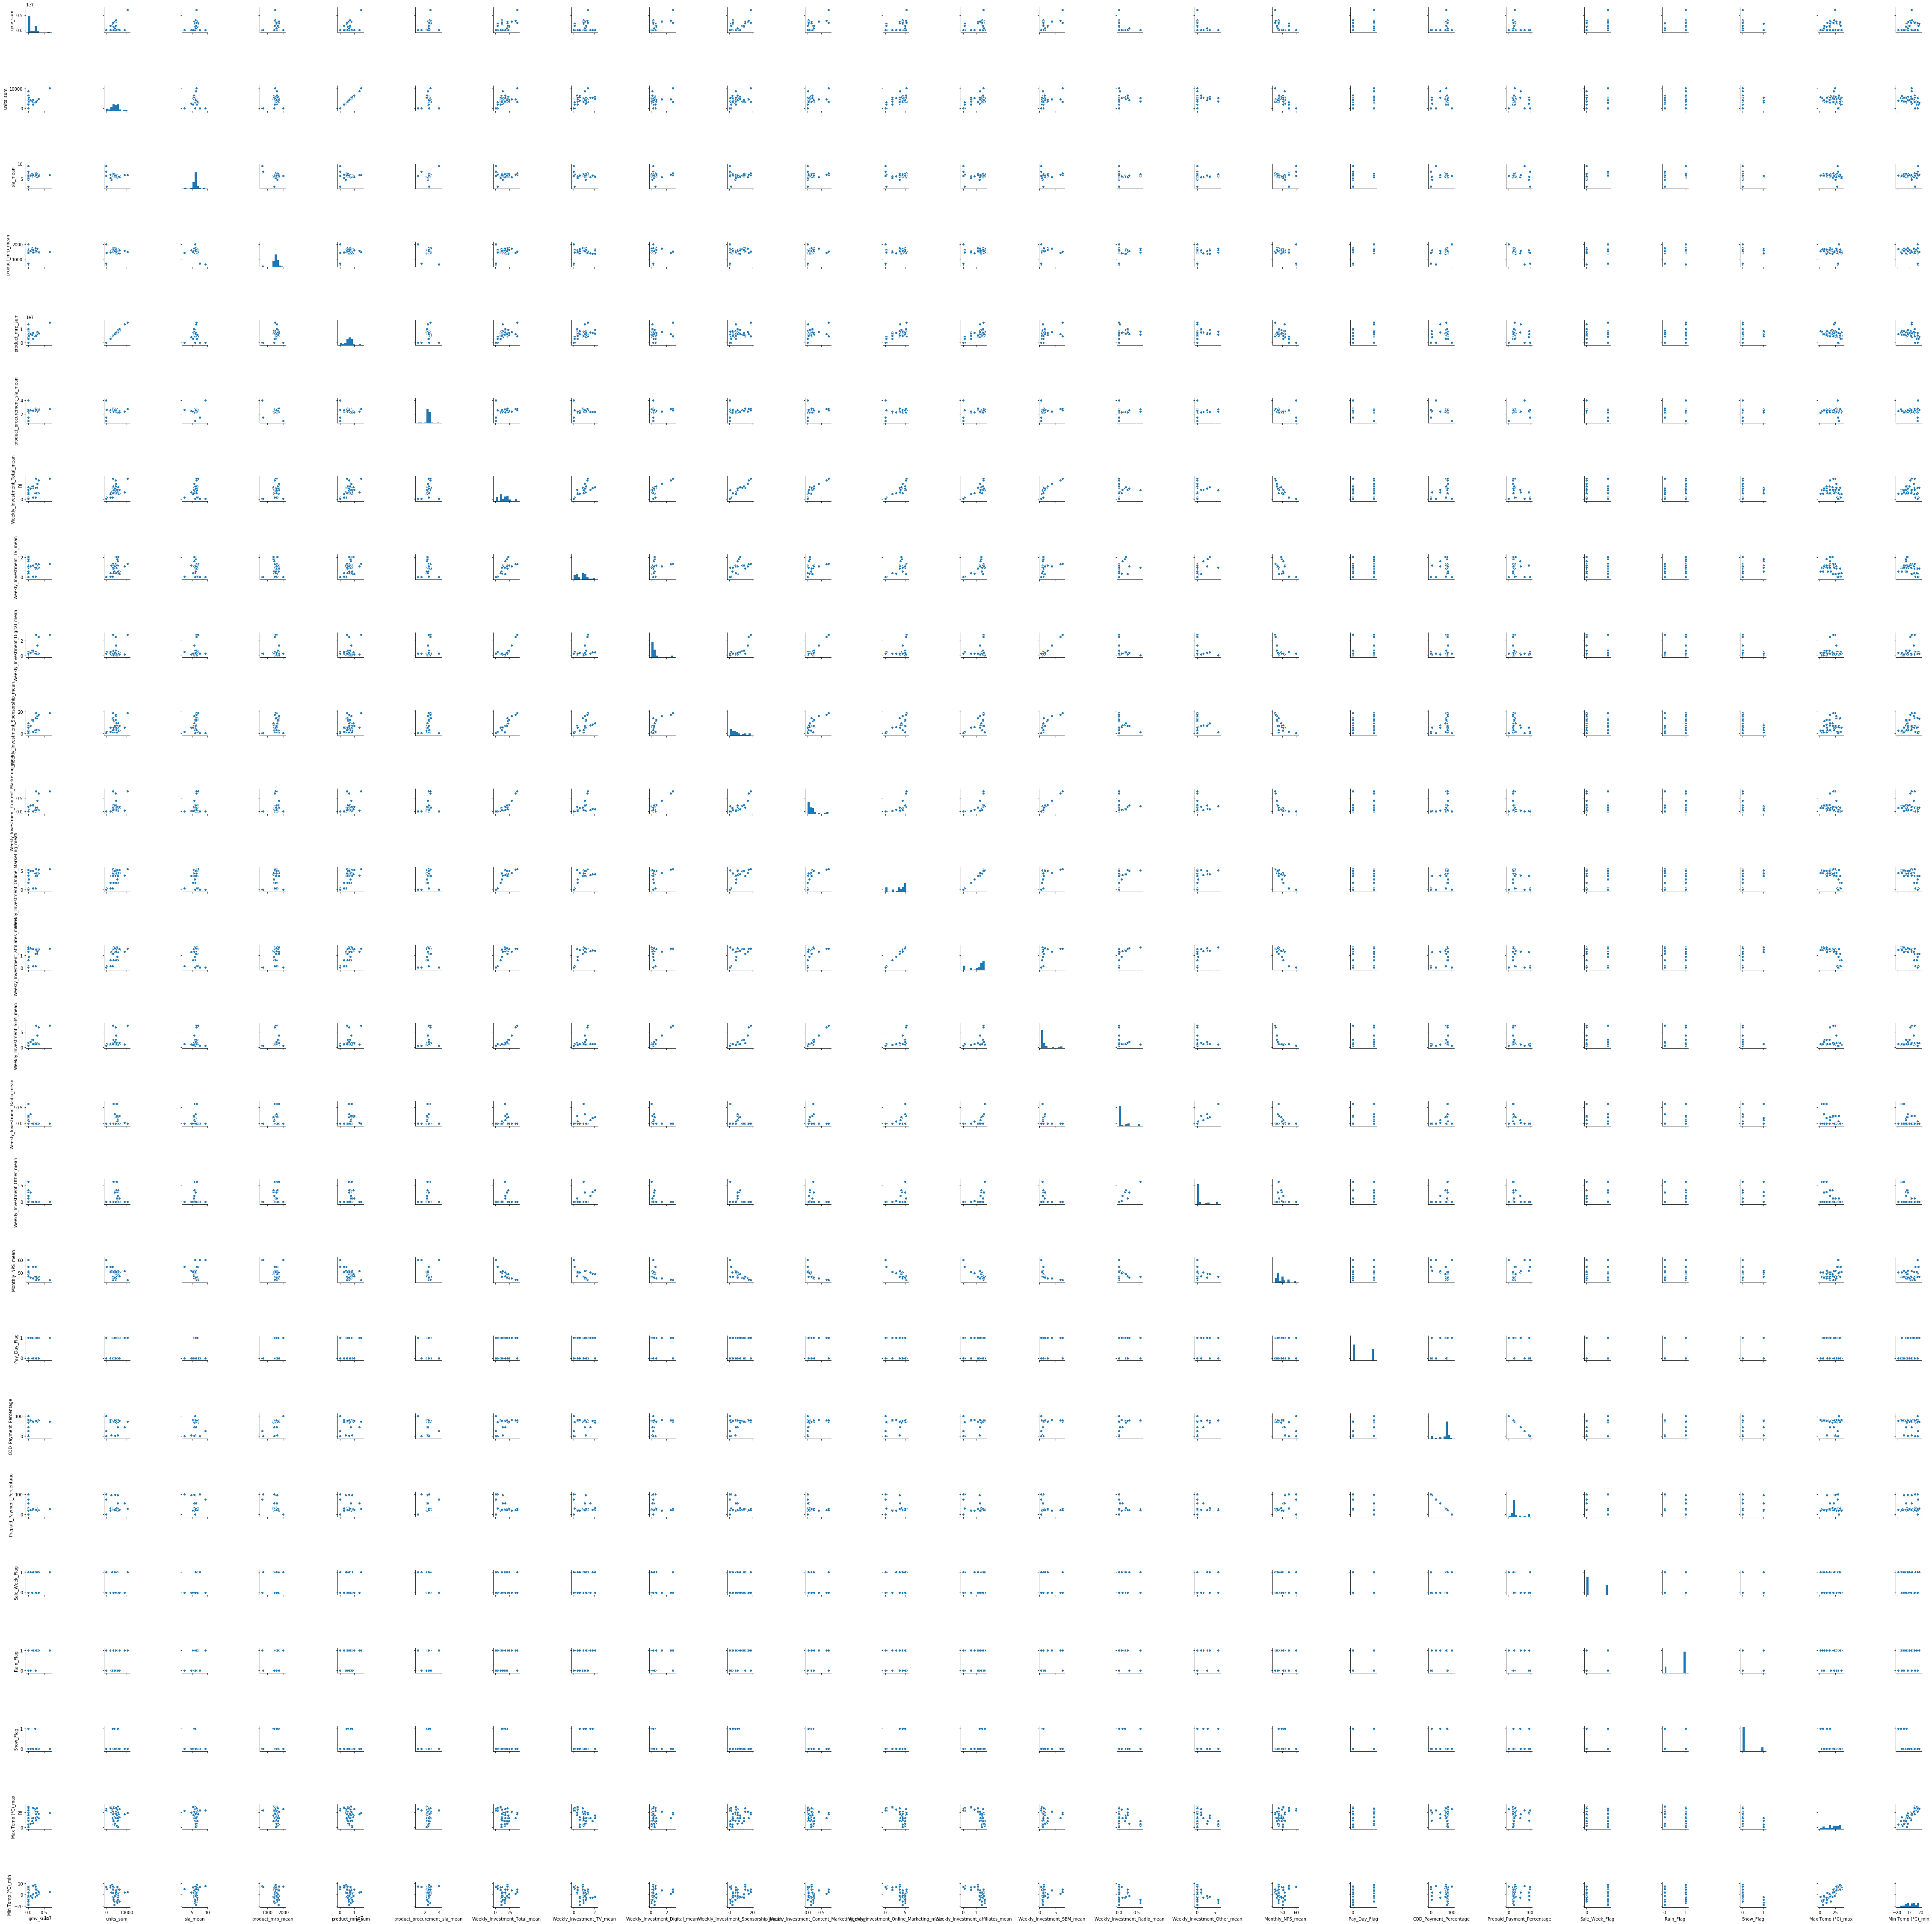

In [821]:
# pair plot
plot_pair(Consumer_Elec_Climate_CameraAccessory_Master_ML)

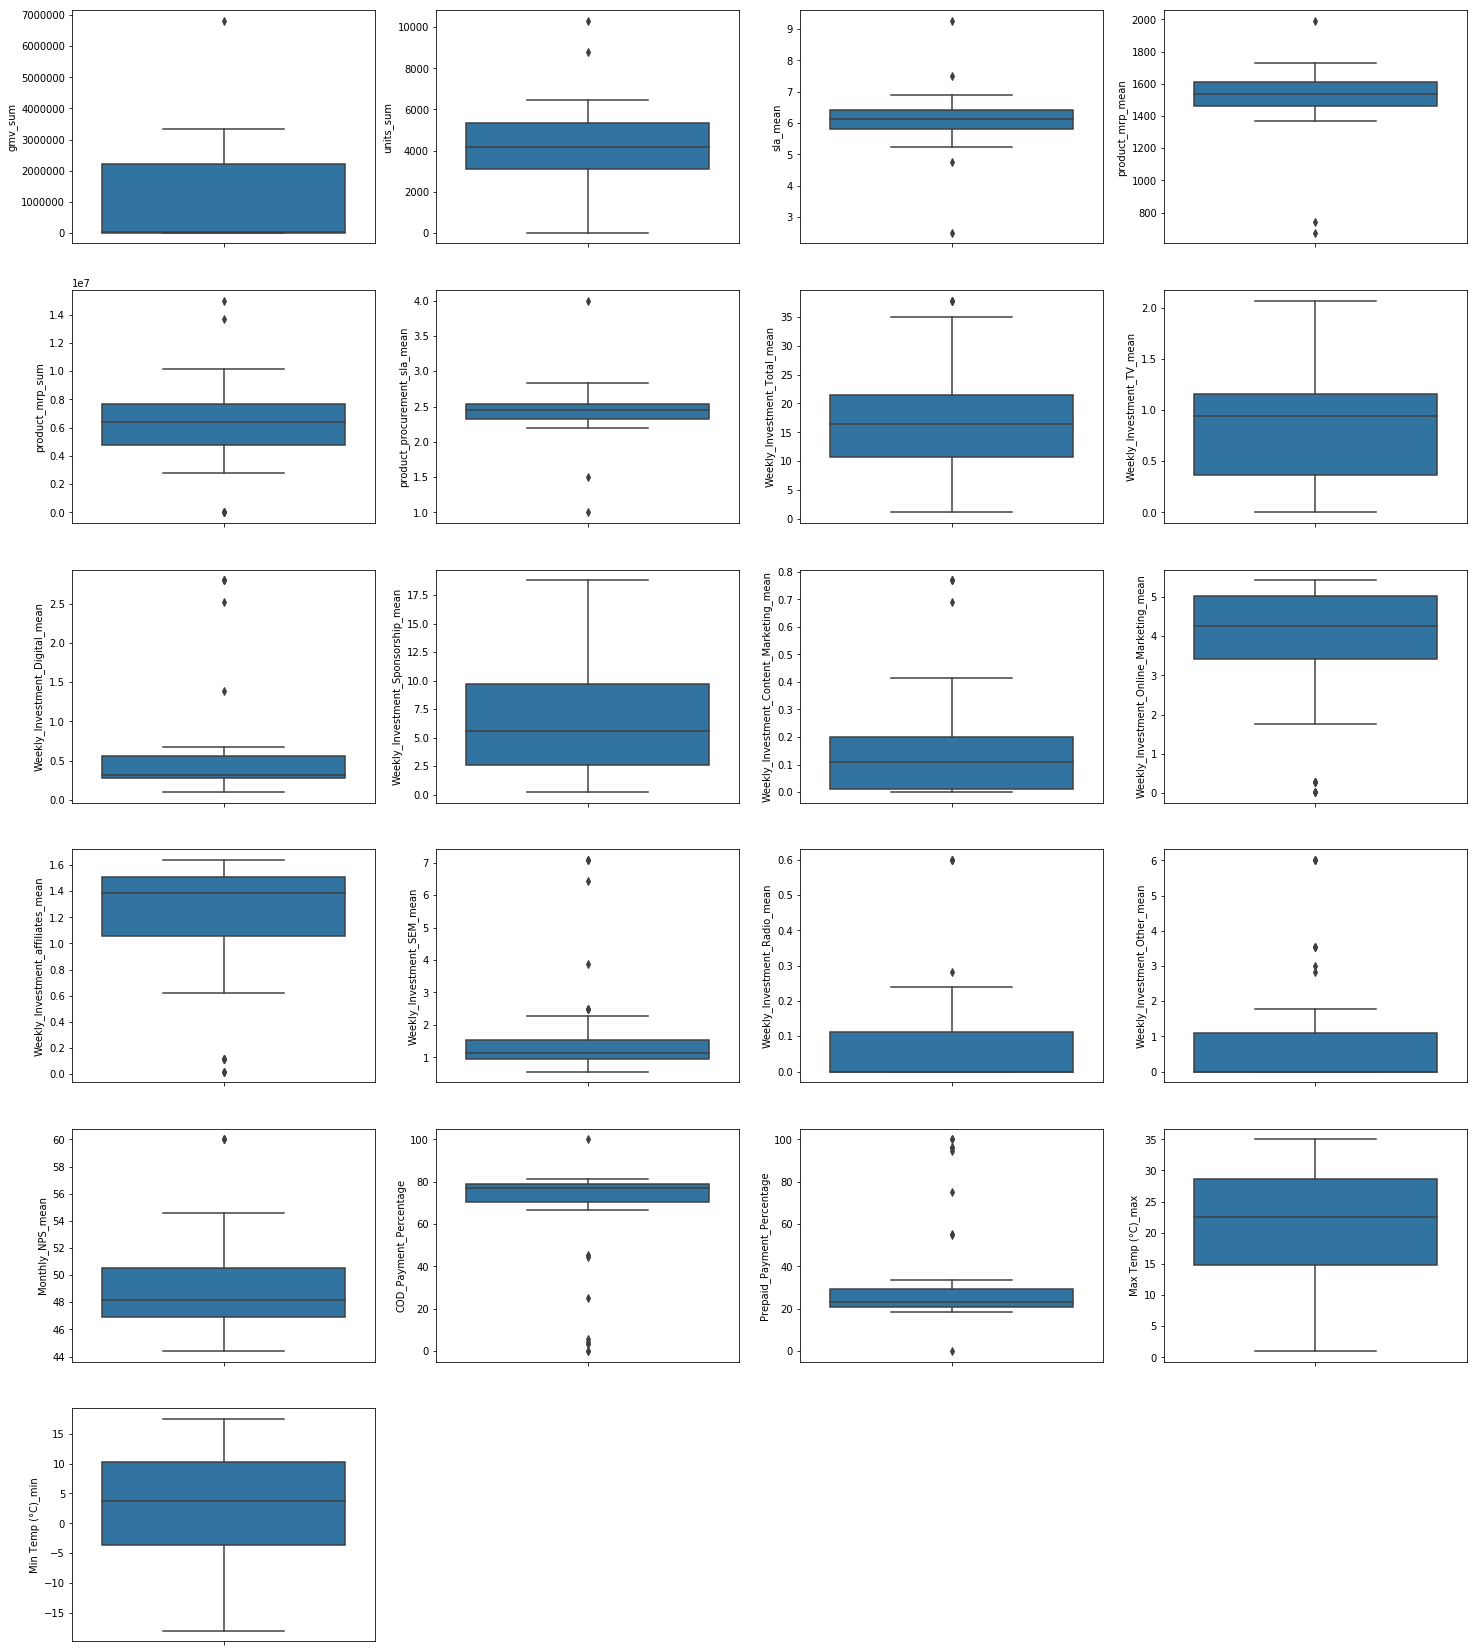

In [822]:
# box plot
plot_box(Consumer_Elec_Climate_CameraAccessory_Master_ML)

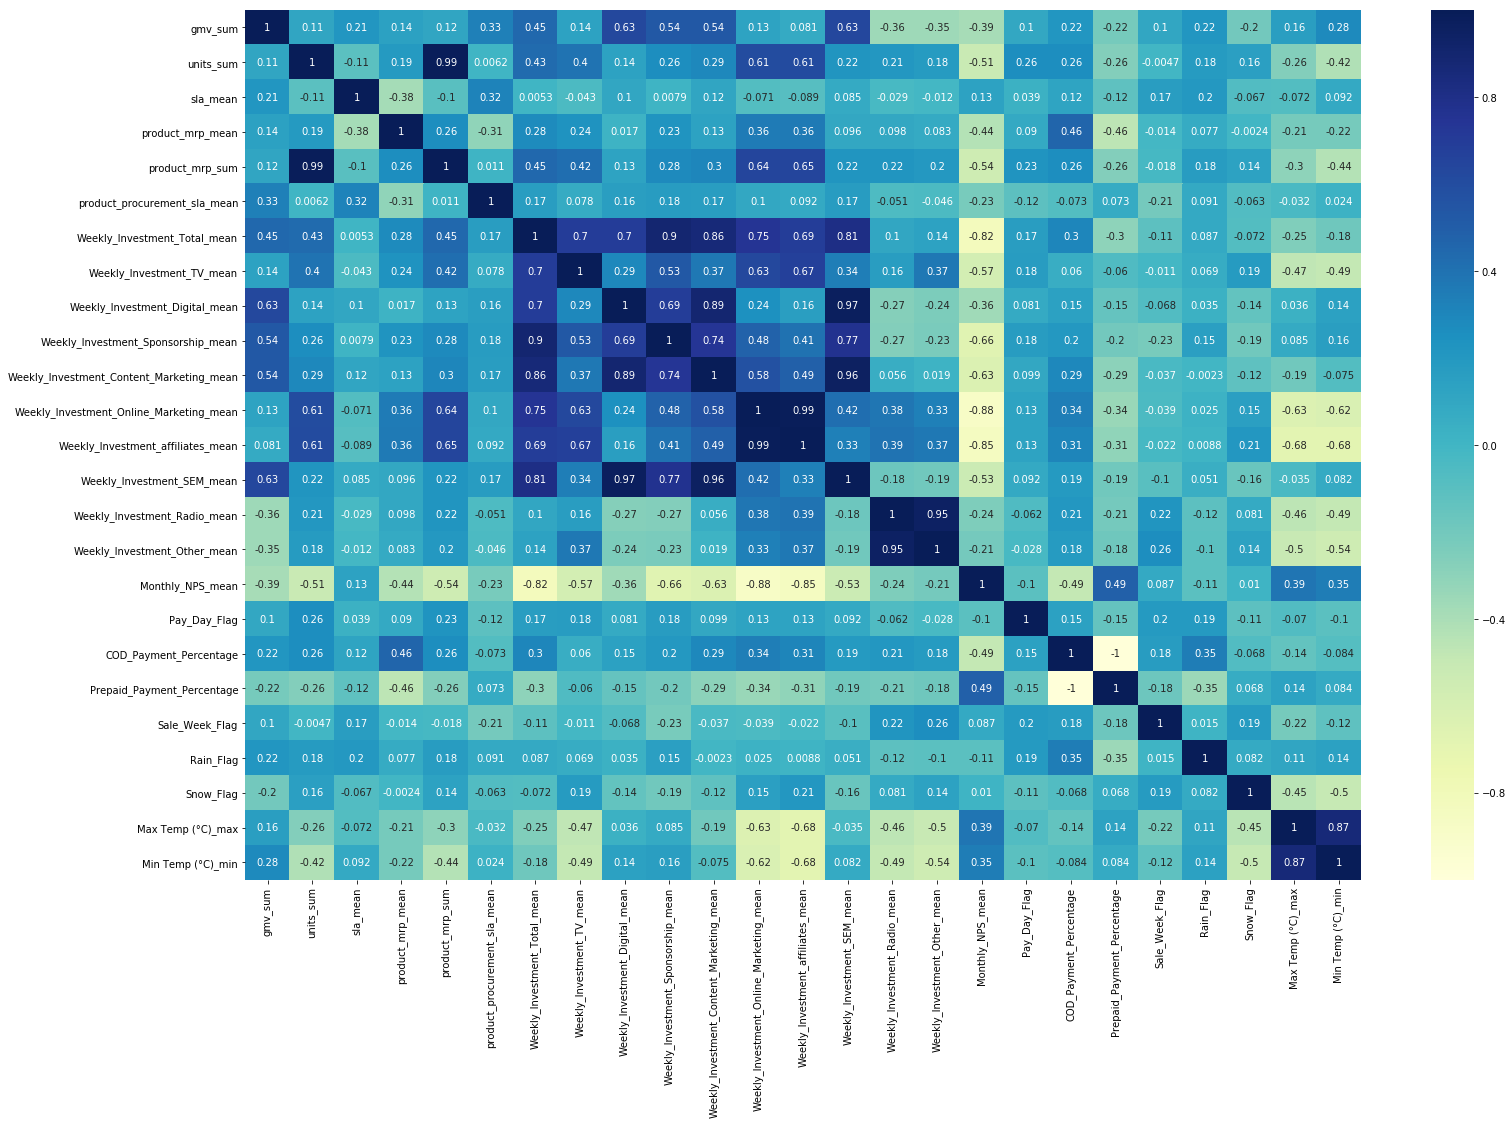

In [823]:
# correlation plot
plot_corr(Consumer_Elec_Climate_CameraAccessory_Master_ML)

In [824]:
Consumer_Elec_Climate_CameraAccessory_Master_ML.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
0  649.0    5317.0     5.825664  1457.315066       7631959.0        2.697537                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           81.076952               18.923048                   1.0             1          1          11.0              -14.0             
1  1078.0   3867.0     6.497114  1597.019675       6087839.0        2.435992                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              1.0           78.462749               21.537251                   1.0             1          0          4.5               -12.0             
2  1208.0   5104.0     6.331543  1617.625497       8133421.0        2.451870                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           75.656325               24.343675                   0.0             0          0          3.0               -10.5             
3  0.0      3558.0     6.561967  1708.277715       6009721.0        2.359579                      16.49                         0.97                       0.10                            0.93                                0.20                                      5.09                                     1.64                               0.93                        0.6                           6.02                          47.1              0.0           79.221148               20.778852                   1.0             0          0          6.0               -9.0              
4  857.0    5584.0     6.266203  1481.028195       8089376.0        2.476565                      10.68                         0.57                       0.43                            2.61                                0.13                                      4.42                                     1.44                               1.08                        0.0                           0.00                          50.3              1.0           79.165141               20.834859                   0.0             1          0          13.0              -5.5

## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [825]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Consumer_Elec_Climate_CameraAccessory_Master_ML_train, Consumer_Elec_Climate_CameraAccessory_Master_ML_test = train_test_split(Consumer_Elec_Climate_CameraAccessory_Master_ML, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
For ease of Model eavaluation and bringing units of all the variables to a comparable Scale,we will use Rescale. We are using the Min-Max scaling of skLearn

In [826]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train, scaler = scale_feature(Consumer_Elec_Climate_CameraAccessory_Master_ML_train)
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
40  1.000000  1.000000   0.743812  0.314747          1.000000         0.892009                      1.000000                      0.653474                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.940794                           1.000000                    0.0                           0.000000                      9.734435e-13      1.0           0.893389                0.106611                    1.0             1          0          0.691176           0.559322         
44  0.398953  0.232823   0.834471  0.486041          0.256127         0.660016                      0.223168                      0.440609                   0.066667                        0.124092                            0.051948                                  0.791434                                 0.888166                           0.052716                    0.0                           0.000000                      2.547596e-01      1.0           0.936795                0.063205                    1.0             1          0          0.470588           0.355932         
37  0.348415  0.144841   0.712223  1.000000          0.211167         1.000000                      0.517383                      0.401006                   0.074074                        0.727781                            0.181818                                  0.653040                                 0.657918                           0.087859                    0.0                           0.000000                      2.449612e-01      0.0           0.891246                0.108754                    0.0             0          0          0.750000           0.898305         
17  0.000000  0.486474   0.459209  0.403372          0.508717         0.035908                      0.398639                      0.123785                   0.025926                        0.341532                            0.233766                                  0.968813                                 0.914480                           0.113419                    0.4                           0.184385                      2.841550e-01      0.0           0.986118                0.013882                    0.0             1          0          0.632353           0.525424         
7   0.000241  0.447331   0.660491  0.449753          0.477745         0.000000                      0.202594                      0.257445                   0.122222                        0.093907                            0.168831                                  0.805079                                 0.868430                           0.039936                    0.0                           0.000000                      5.781084e-01      0.0           0.992589                0.007411                    1.0             1          1          0.000000           0.288136

In [827]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.describe()
Consumer_Elec_Climate_CameraAccessory_Master_ML_train

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
40  1.000000  1.000000   0.743812  0.314747          1.000000         0.892009                      1.000000                      0.653474                   1.000000e+00                    1.000000e+00                        1.000000                                  1.000000                                 0.940794                           1.000000e+00                0.000000                      0.000000                      9.734435e-13      1.0           0.893389                0.106611                    1.0             1          0          0.691176           0.559322         
44  0.398953  0.232823   0.834471  0.486041          0.256127         0.660016                      0.223168                      0.440609                   6.666667e-02                    1.240917e-01                        0.051948                                  0.791434                                 0.888166                           5.271565e-02                0.000000                      0.000000                      2.547596e-01      1.0           0.936795                0.063205                    1.0             1          0          0.470588           0.355932         
37  0.348415  0.144841   0.712223  1.000000          0.211167         1.000000                      0.517383                      0.401006                   7.407407e-02                    7.277809e-01                        0.181818                                  0.653040                                 0.657918                           8.785942e-02                0.000000                      0.000000                      2.449612e-01      0.0           0.891246                0.108754                    0.0             0          0          0.750000           0.898305         
17  0.000000  0.486474   0.459209  0.403372          0.508717         0.035908                      0.398639                      0.123785                   2.592593e-02                    3.415316e-01                        0.233766                                  0.968813                                 0.914480                           1.134185e-01                0.400000                      0.184385                      2.841550e-01      0.0           0.986118                0.013882                    0.0             1          0          0.632353           0.525424         
7   0.000241  0.447331   0.660491  0.449753          0.477745         0.000000                      0.202594                      0.257445                   1.222222e-01                    9.390721e-02                        0.168831                                  0.805079                                 0.868430                           3.993610e-02                0.000000                      0.000000                      5.781084e-01      0.0           0.992589                0.007411                    1.0             1          1          0.000000           0.288136         
49  0.169409  0.176682   0.900949  0.827684          0.232150         0.455133                      0.585866                      0.569318                   2.148148e-01                    6.523197e-01                        0.311688                                  0.918133                                 0.921058                           2.635783e-01                0.000000                      0.000000                      1.371783e-01      1.0           0.

## Splitting the data into Predictor Variable and Outcome Variable and Building a Linear Model
Let's split the data and Fit a regression line through the training data using statsmodels. But first we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [828]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
40  1.000000  1.000000   0.743812  0.314747          1.000000         0.892009                      1.000000                      0.653474                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.940794                           1.000000                    0.0                           0.000000                      9.734435e-13      1.0           0.893389                0.106611                    1.0             1          0          0.691176           0.559322         
44  0.398953  0.232823   0.834471  0.486041          0.256127         0.660016                      0.223168                      0.440609                   0.066667                        0.124092                            0.051948                                  0.791434                                 0.888166                           0.052716                    0.0                           0.000000                      2.547596e-01      1.0           0.936795                0.063205                    1.0             1          0          0.470588           0.355932         
37  0.348415  0.144841   0.712223  1.000000          0.211167         1.000000                      0.517383                      0.401006                   0.074074                        0.727781                            0.181818                                  0.653040                                 0.657918                           0.087859                    0.0                           0.000000                      2.449612e-01      0.0           0.891246                0.108754                    0.0             0          0          0.750000           0.898305         
17  0.000000  0.486474   0.459209  0.403372          0.508717         0.035908                      0.398639                      0.123785                   0.025926                        0.341532                            0.233766                                  0.968813                                 0.914480                           0.113419                    0.4                           0.184385                      2.841550e-01      0.0           0.986118                0.013882                    0.0             1          0          0.632353           0.525424         
7   0.000241  0.447331   0.660491  0.449753          0.477745         0.000000                      0.202594                      0.257445                   0.122222                        0.093907                            0.168831                                  0.805079                                 0.868430                           0.039936                    0.0                           0.000000                      5.781084e-01      0.0           0.992589                0.007411                    1.0             1          1          0.000000           0.288136

In [829]:
X_Consumer_Elec_Climate_CameraAccessory_Master_ML_train, y_Consumer_Elec_Climate_CameraAccessory_Master_ML_train, lr_1, y_train_predict = data_split_and_linear_model(Consumer_Elec_Climate_CameraAccessory_Master_ML_train)

In [830]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     49.88
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.12e-08
Time:                        09:11:44   Log-Likelihood:                 85.765
No. Observations:                  36   AIC:                            -123.5
Df Residuals:                      12   BIC:                            -85.52
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [831]:
vif = find_vif(X_Consumer_Elec_Climate_CameraAccessory_Master_ML_train)
vif

Features           VIF
12  Weekly_Investment_SEM_mean                3.944125e+11
14  Weekly_Investment_Other_mean              2.680395e+11
5   Weekly_Investment_Total_mean              2.012422e+11
11  Weekly_Investment_affiliates_mean         1.447893e+11
8   Weekly_Investment_Sponsorship_mean        1.330438e+11
13  Weekly_Investment_Radio_mean              1.115940e+11
9   Weekly_Investment_Content_Marketing_mean  5.845794e+10
7   Weekly_Investment_Digital_mean            4.872496e+10
17  COD_Payment_Percentage                    4.094330e+10
6   Weekly_Investment_TV_mean                 3.684182e+10
10  Weekly_Investment_Online_Marketing_mean   2.384390e+10
18  Prepaid_Payment_Percentage                5.339865e+09
15  Monthly_NPS_mean                          4.017215e+09
0   units_sum                                 1.304680e+03
3   product_mrp_sum                           1.247770e+03
23  Min Temp (°C)_min                         3.330000e+01
2   product_mrp_mean                          2.909000e+01
22  Max Temp (°C)_max                         2.774000e+01
4   product_procurement_sla_mean              1.288000e+01
21  Snow_Flag                                 9.060000e+00
1   sla_mean                                  6.590000e+00
16  Pay_Day_Flag                              4.740000e+00
20  Rain_Flag                                 4.100000e+00
19  Sale_Week_Flag                            2.760000e+00

### Extremly high VIF Values and high P Values indicate there are insignificant and corelated variables which need to be eliminated first.

In [832]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
40  1.000000   0.743812  0.314747          1.000000         0.892009                      1.000000                      0.653474                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.940794                           1.000000                    0.0                           0.000000                      9.734435e-13      1.0           0.893389                0.106611                    1.0             1          0          0.691176           0.559322         
44  0.232823   0.834471  0.486041          0.256127         0.660016                      0.223168                      0.440609                   0.066667                        0.124092                            0.051948                                  0.791434                                 0.888166                           0.052716                    0.0                           0.000000                      2.547596e-01      1.0           0.936795                0.063205                    1.0             1          0          0.470588           0.355932         
37  0.144841   0.712223  1.000000          0.211167         1.000000                      0.517383                      0.401006                   0.074074                        0.727781                            0.181818                                  0.653040                                 0.657918                           0.087859                    0.0                           0.000000                      2.449612e-01      0.0           0.891246                0.108754                    0.0             0          0          0.750000           0.898305         
17  0.486474   0.459209  0.403372          0.508717         0.035908                      0.398639                      0.123785                   0.025926                        0.341532                            0.233766                                  0.968813                                 0.914480                           0.113419                    0.4                           0.184385                      2.841550e-01      0.0           0.986118                0.013882                    0.0             1          0          0.632353           0.525424         
7   0.447331   0.660491  0.449753          0.477745         0.000000                      0.202594                      0.257445                   0.122222                        0.093907                            0.168831                                  0.805079                                 0.868430                           0.039936                    0.0                           0.000000                      5.781084e-01      0.0           0.992589                0.007411                    1.0             1          1          0.000000           0.288136

In [833]:
X_train = Consumer_Elec_Climate_CameraAccessory_Master_ML_train

In [834]:
y_train = y_Consumer_Elec_Climate_CameraAccessory_Master_ML_train

In [835]:
# Dropping highly correlated variables and insignificant variables

#Iteration 1
X = X_train.drop('Weekly_Investment_SEM_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 2
X = X.drop('Weekly_Investment_Total_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 3
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 4
X = X.drop('Weekly_Investment_TV_mean', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 5
X = X.drop('COD_Payment_Percentage', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 6
X = X.drop('Rain_Flag', 1,)#Removing as high P Value (0.611) indicating insignificance and high VIF (9.15) indicating highly correlated
#Iteration 7
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,) #Removing due to extremly high VIF(6697.23) value indicating high correlation
#Iteration 8
X = X.drop('Max Temp (°C)_max', 1,)#Removing as high P Value (0.922) indicating insignificance and high VIF (14.61) indicating highly correlated
#Iteration 9
X = X.drop('units_sum', 1,)#Removing as high P Value (0.138) indicating insignificance and high VIF (7.37) indicating highly correlated
#Iteration 10
X = X.drop('sla_mean', 1,) #Removing as high P Value indicating insignificance
#Iteration 11
X = X.drop('product_mrp_mean', 1,)#Removing as high VIF (11.48) indicating highly correlated
#Iteration 12
X = X.drop('Min Temp (°C)_min', 1,) #Removing as high P Value (0.98) indicating insignificance and high VIF (67.23) indicating highly correlated
#Iteration 13
X = X.drop('Pay_Day_Flag', 1,)#Removing as high P Value (0.57) indicating insignificance and high VIF (2.24) indicating highly correlated
#Iteration 14
X = X.drop('Snow_Flag', 1,)#Removing as high P Value (0.191) indicating insignificance (0.14)
#Iteration 15
X = X.drop('Weekly_Investment_affiliates_mean', 1,)#Removing as high VIF (21.68) indicating highly correlated
#Iteration 16
X = X.drop('Weekly_Investment_Other_mean', 1,) #Removing as high P Value (0.477) indicating insignificance and high VIF (17.44) indicating highly correlated
#Iteration 17
X = X.drop('Prepaid_Payment_Percentage', 1,)#Removing as high P Value (0.497) indicating insignificance and high VIF (2.38) indicating highly correlated
#Iteration 18
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance and high VIF (3.52) indicating highly correlated
#Iteration 19
X = X.drop('product_mrp_sum', 1,)#Removing as high P Value indicating insignificance and high VIF indicating highly correlated



#Ignoring below iterations as R2 dips below 60

#Iteration 20
#X = X.drop('product_procurement_sla_mean', 1,)#Removing as high VIF (2.61) indicating highly correlated

In [836]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()



In [837]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     37.88
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           4.38e-12
Time:                        09:11:52   Log-Likelihood:                 39.308
No. Observations:                  36   AIC:                            -66.62
Df Residuals:                      30   BIC:                            -57.12
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [838]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  product_procurement_sla_mean    2.90
1  Weekly_Investment_Digital_mean  1.87
3  Monthly_NPS_mean                1.74
4  Sale_Week_Flag                  1.61
2  Weekly_Investment_Radio_mean    1.22

### Residual Analysis of the train data

In [839]:
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

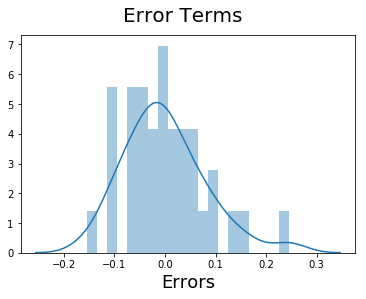

In [840]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions on Test data

In [841]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_test.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
6   3138.0     6403.0     6.040680  1396.348482       8787221.0        2.460988                      10.680000                     0.570000                   0.430000                        2.610000                            0.130000                                  4.420000                                 1.440000                           1.08000                     0.0                           0.0                           50.300000         1.0           78.674718               21.325282                   0.0             0          0          17.5              -12.0             
32  299.0      1.0        6.000000  1990.000000       1990.0           1.000000                      1.130000                      0.000000                   0.280000                        0.240000                            0.000000                                  0.030000                                 0.020000                           0.56000                     0.0                           0.0                           60.000000         1.0           100.000000              0.000000                    1.0             1          0          31.0               14.5             
38  2886536.0  4618.0     5.643202  1708.755702       7791926.0        2.394518                      28.548544                     1.082342                   1.389912                        16.073149                           0.414658                                  4.416018                                 1.307465                           3.86936                     0.0                           0.0                           45.810088         1.0           80.109649               19.890351                   0.0             1          0          26.5               8.0              
35  2700423.0  3402.0     6.381567  1651.740318       5501947.0        2.743320                      21.390000                     0.860000                   0.300000                        13.950000                           0.140000                                  3.640000                                 1.120000                           1.38000                     0.0                           0.0                           46.900000         0.0           70.219153               29.780847                   0.0             1          0          32.5               9.0              
33  905.0      2.0        7.500000  744.500000        1489.0           1.500000                      1.130000                      0.000000                   0.280000                        0.240000                            0.000000                                  0.030000                                 0.020000                           0.56000                     0.0                           0.0                           60.000000         0.0           0.000000                100.000000                  1.0             0          0          29.0               14.0

In [842]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_test[columns] = scaler.transform(Consumer_Elec_Climate_CameraAccessory_Master_ML_test[columns])
X_test = Consumer_Elec_Climate_CameraAccessory_Master_ML_test[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = Consumer_Elec_Climate_CameraAccessory_Master_ML_test['gmv_sum']

In [843]:
X_test_sm.head()

const  product_procurement_sla_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Radio_mean  Monthly_NPS_mean  Sale_Week_Flag
6   1.0    0.415494                      0.122222                        0.0                           0.578108          0.0           
32  1.0   -1.872324                      0.066667                        0.0                           1.528558          1.0           
38  1.0    0.311405                      0.477745                        0.0                           0.138167          0.0           
35  1.0    0.857609                      0.074074                        0.0                           0.244961          0.0           
33  1.0   -1.089355                      0.066667                        0.0                           1.528558          1.0

In [844]:
y_pred = lr_2.predict(X_test_sm)

Text(0,0.5,'y_pred')

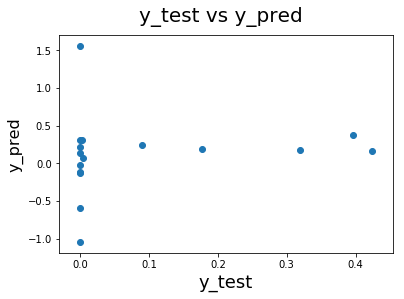

In [845]:
#predicted_train_test_scatter_plot(y_test, y_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [846]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [847]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  0.5152672832202724 
R-Squared Score:  -11.03226238480891


### Linear equation for Camera Accesory category
### GMV_SUM = -0.1571 + 0.2850 * Weekly_Investment_Digital_mean - 0.1109 * Weekly_Investment_Radio_mean - 0.0395 * Monthly_NPS_mean + 0.1127 * Sale_Week_Flag + 0.5766 * product_procurement_sla_mean

## 2) Consumer_Elec_Climate_GamingAccessory_Master

<Figure size 4608x4608 with 0 Axes>

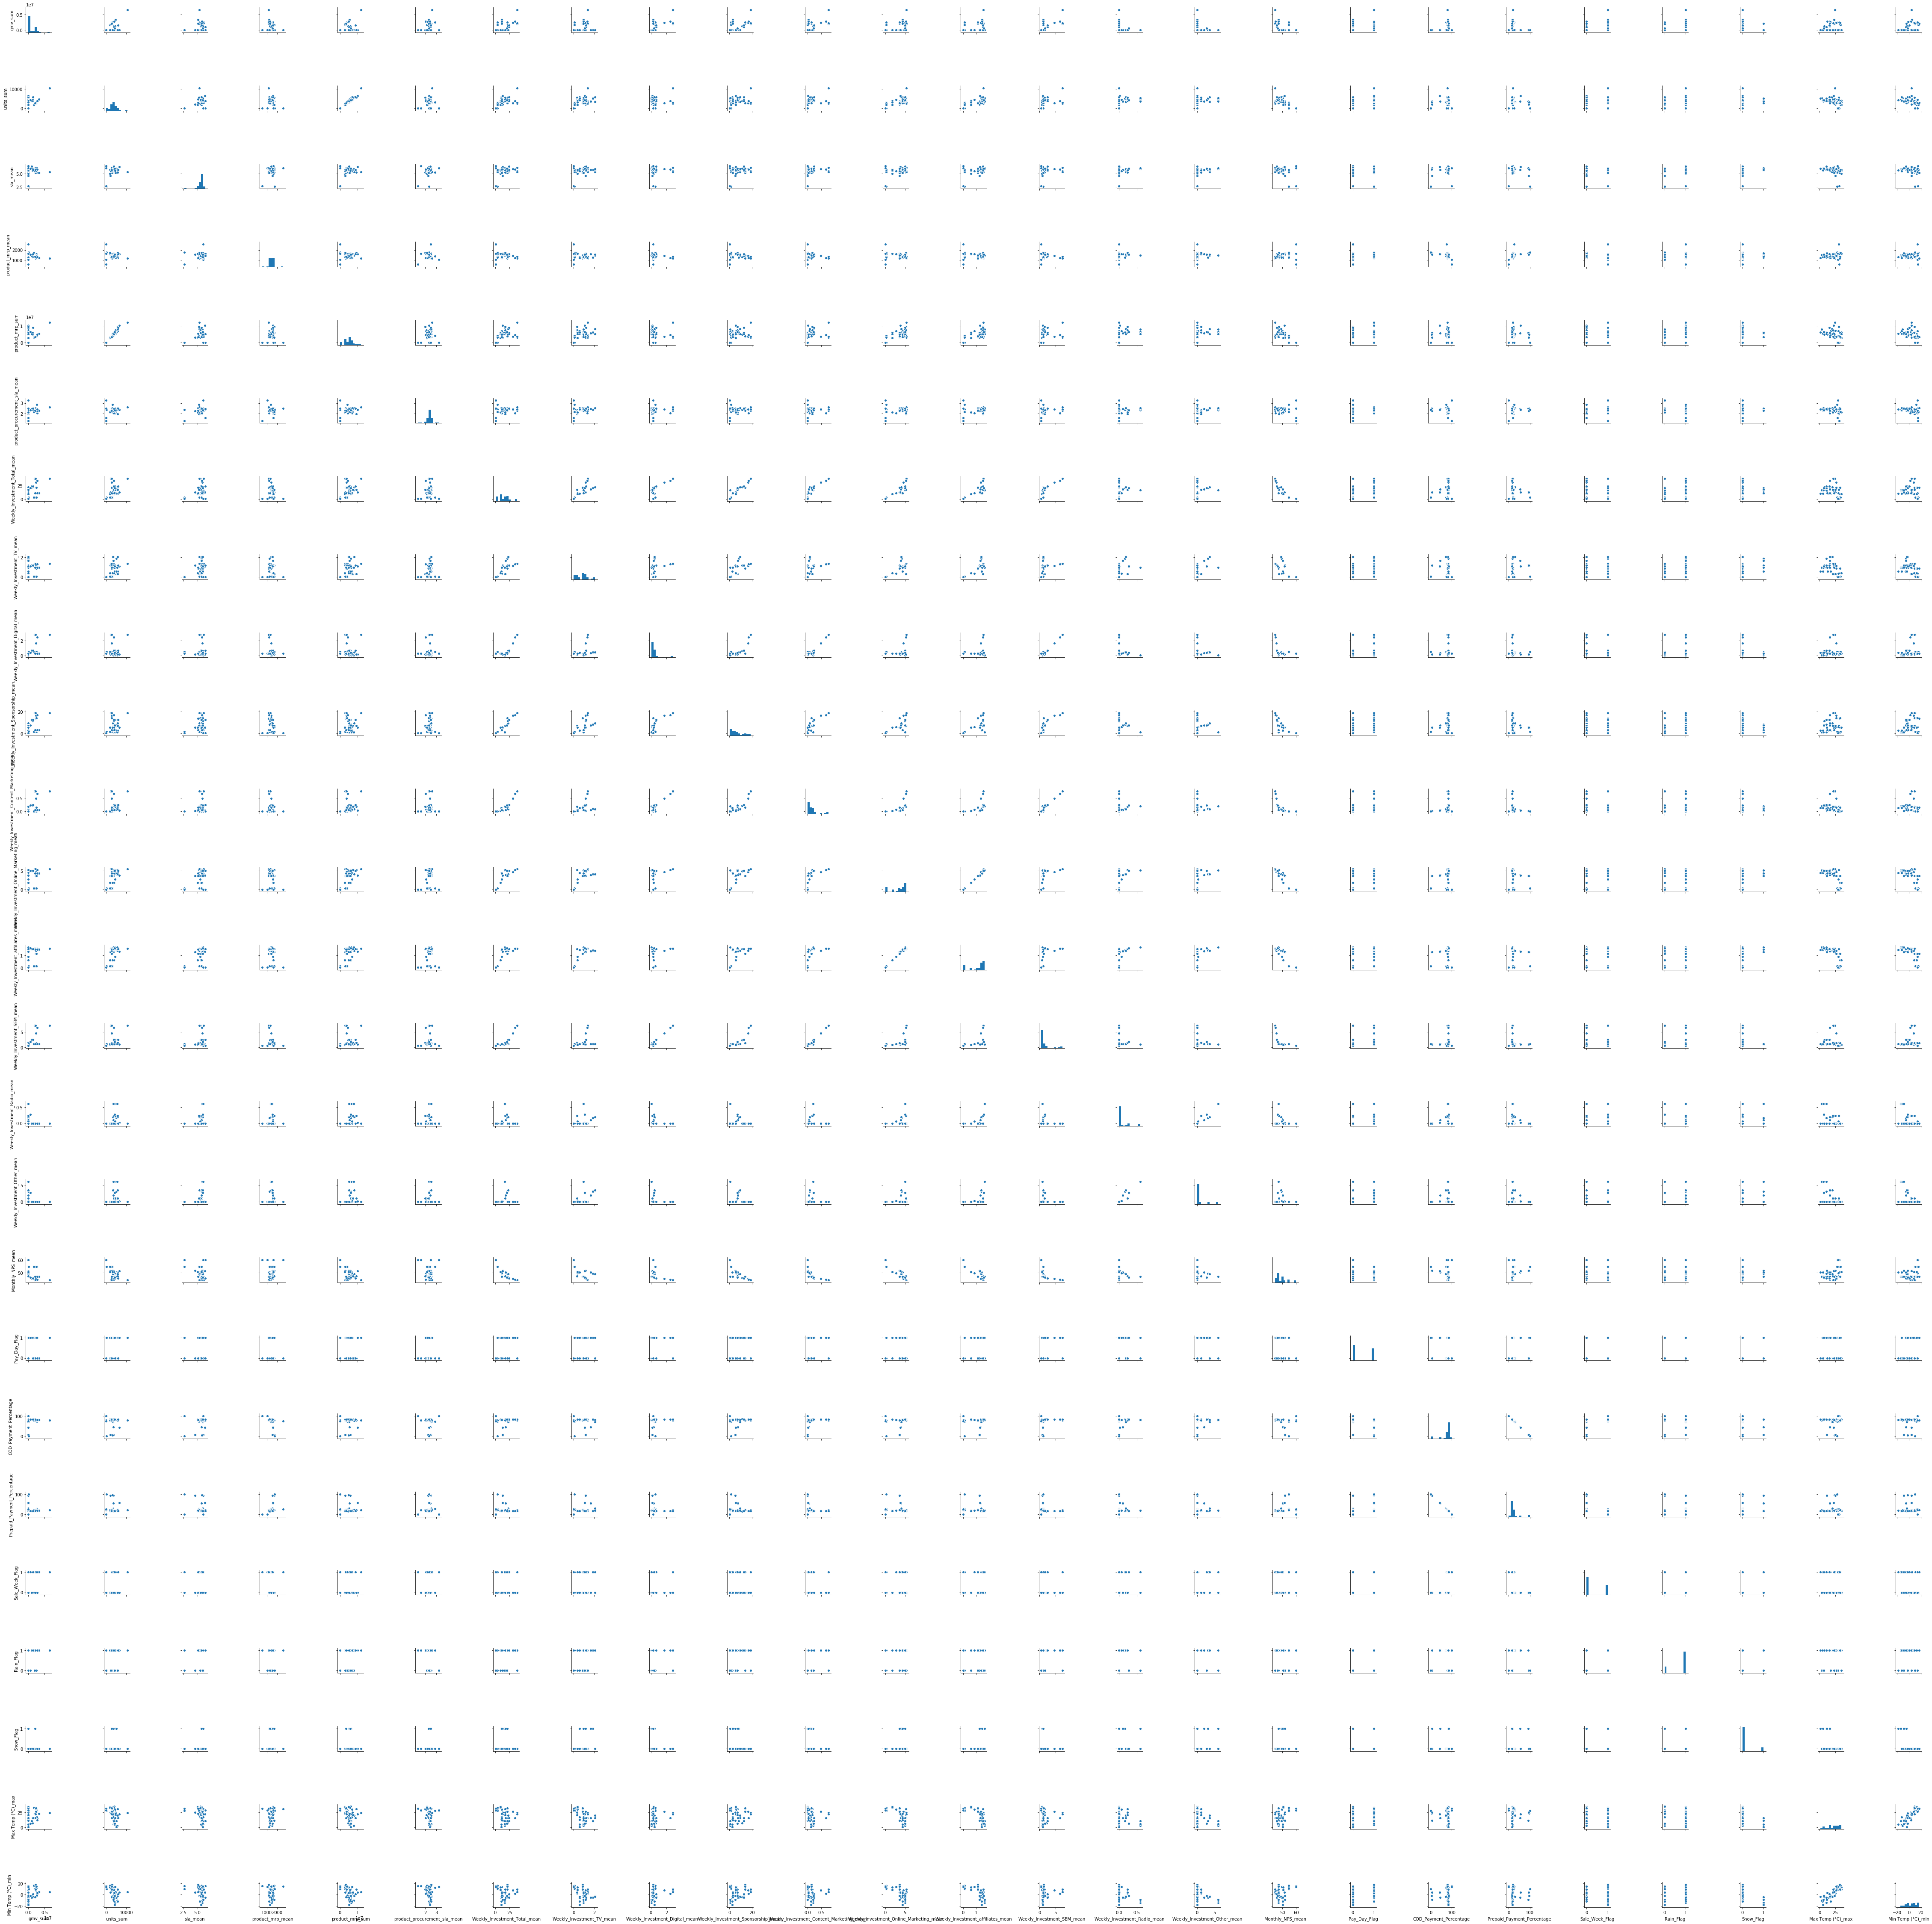

In [308]:
# pair plot
plot_pair(Consumer_Elec_Climate_GamingAccessory_Master_ML)

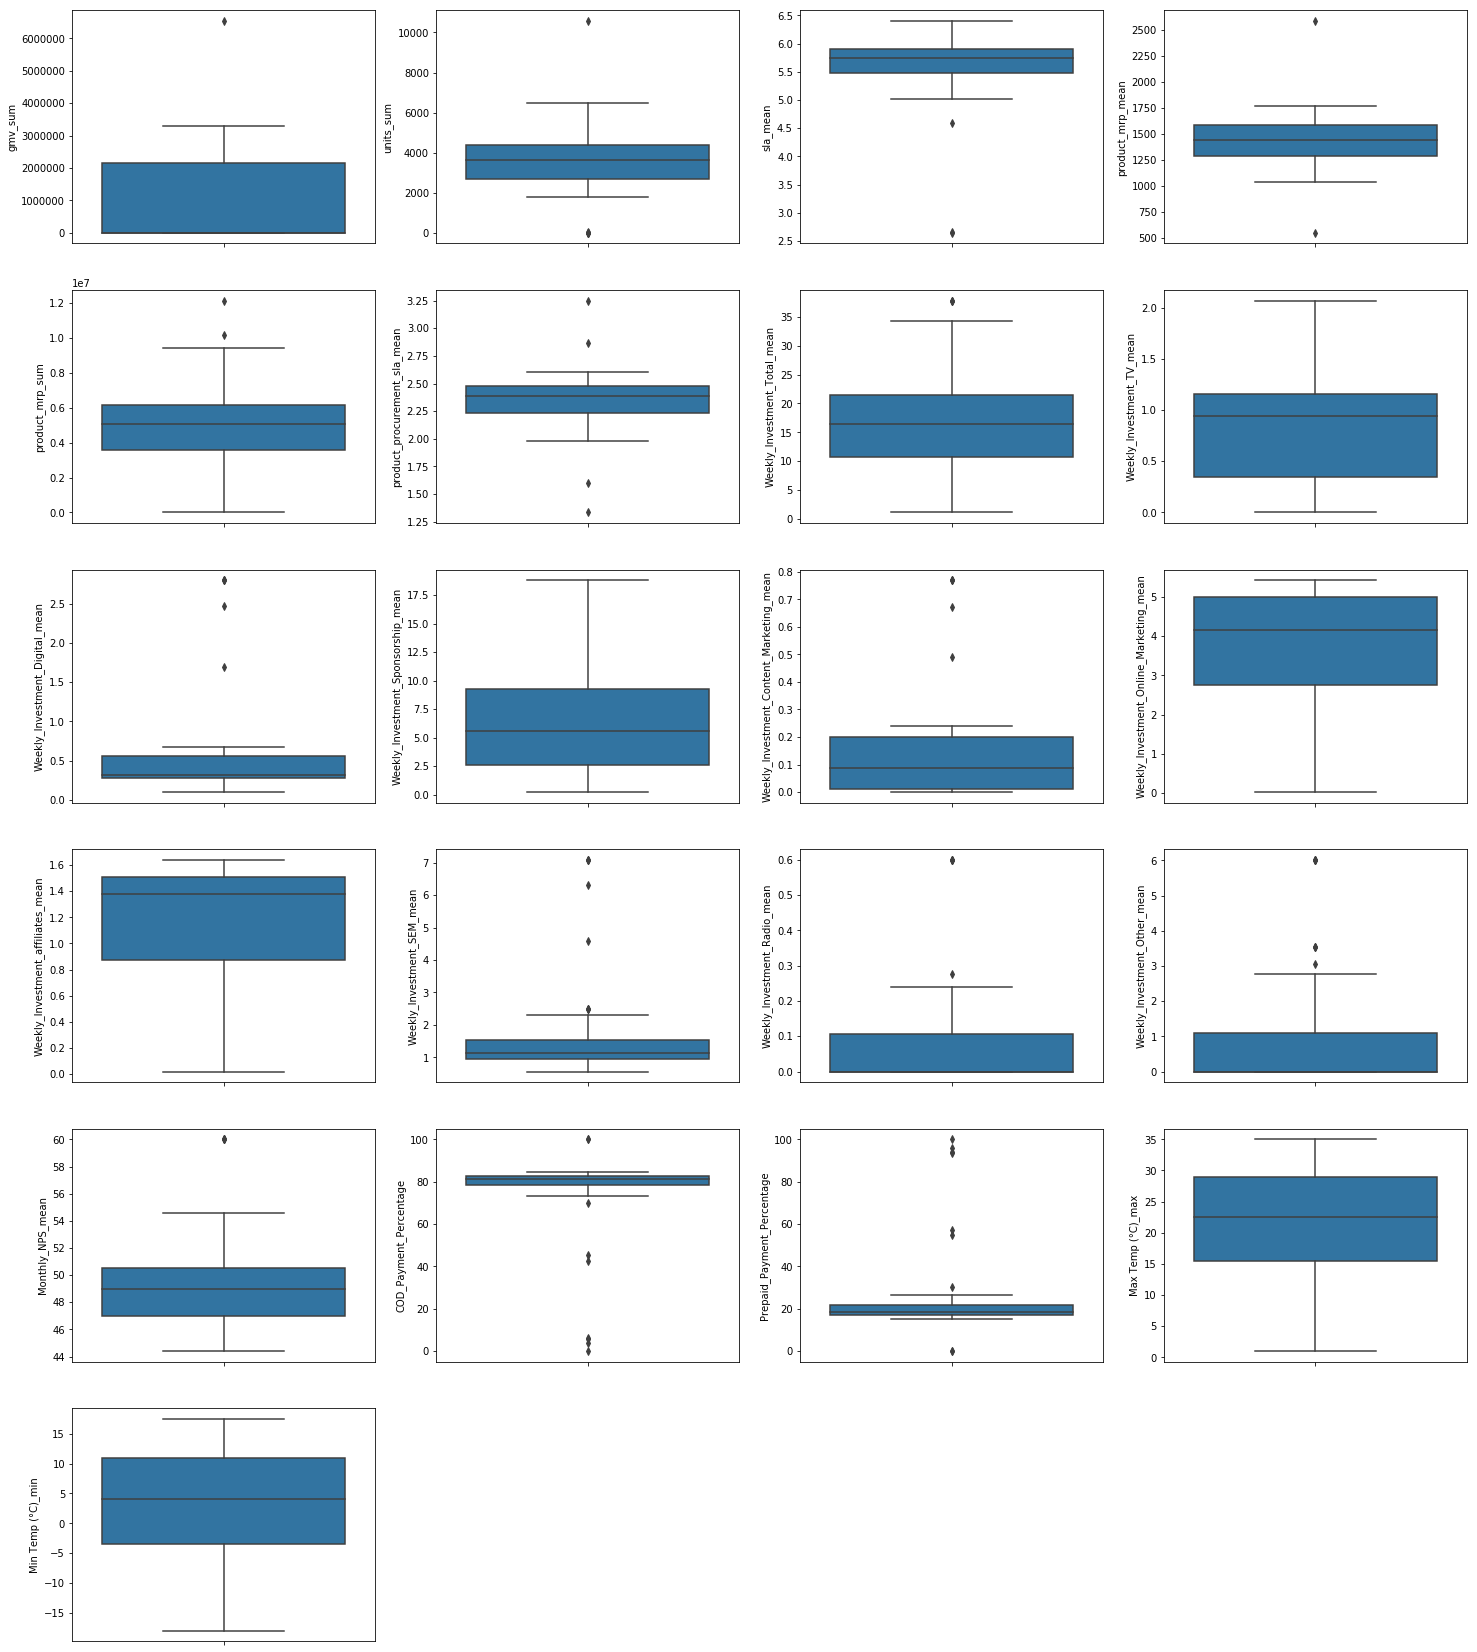

In [309]:
# box plot
plot_box(Consumer_Elec_Climate_GamingAccessory_Master_ML)

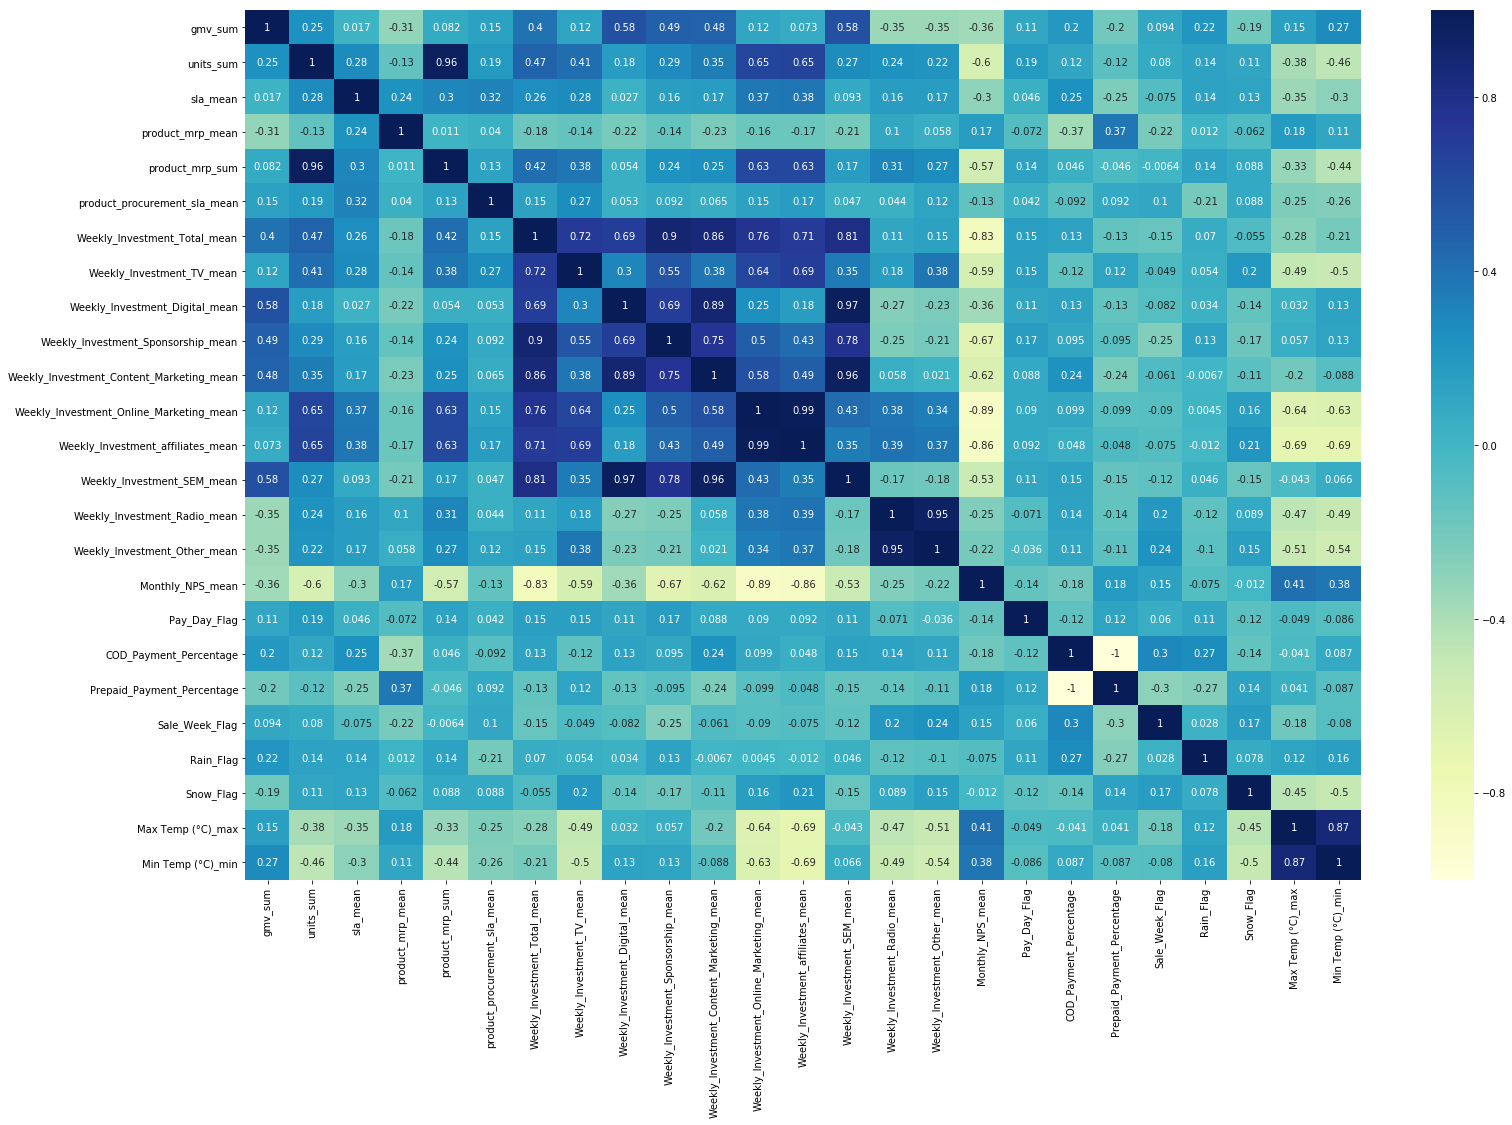

In [310]:
# correlation plot
plot_corr(Consumer_Elec_Climate_GamingAccessory_Master_ML)

## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [312]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Consumer_Elec_Climate_GamingAccessory_Master_ML_train, Consumer_Elec_Climate_GamingAccessory_Master_ML_test = train_test_split(Consumer_Elec_Climate_GamingAccessory_Master_ML, train_size = 0.7, test_size = 0.3, random_state = 100)

Consumer_Elec_Climate_GamingAccessory_Master_ML_train1 = Consumer_Elec_Climate_GamingAccessory_Master_ML_train
Consumer_Elec_Climate_GamingAccessory_Master_ML_test1 = Consumer_Elec_Climate_GamingAccessory_Master_ML_test

Consumer_Elec_Climate_GamingAccessory_Master_ML_train_Kyock = Consumer_Elec_Climate_GamingAccessory_Master_ML_train
Consumer_Elec_Climate_GamingAccessory_Master_ML_test_Kyock = Consumer_Elec_Climate_GamingAccessory_Master_ML_test

Consumer_Elec_Climate_GamingAccessory_Master_ML_train_Lag = Consumer_Elec_Climate_GamingAccessory_Master_ML_train
Consumer_Elec_Climate_GamingAccessory_Master_ML_test_Lag = Consumer_Elec_Climate_GamingAccessory_Master_ML_test

### Rescaling the Features
For ease of Model eavaluation and bringing units of all the variables to a comparable Scale,we will use Rescale. We are using the Min-Max scaling of skLearn

In [316]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_train, scaler = scale_feature(Consumer_Elec_Climate_GamingAccessory_Master_ML_train)
Consumer_Elec_Climate_GamingAccessory_Master_ML_train.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
26  0.005896  0.002652   0.000000  1.000000          0.004177         0.265635                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      6.538462e-01      1             0.000000                1.000000                    0.0             0          0          0.794118           0.785714         
41  1.000000  1.000000   0.719443  0.189240          1.000000         0.471793                      1.000000                      0.661836                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.944444                           1.000000                    0.0                           0.000000                      6.239453e-13      1             0.798180                0.201820                    1.0             1          0          0.691176           0.589286         
28  0.337094  0.267045   0.703997  0.291255          0.282361         0.311052                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      6.538462e-01      1             0.763570                0.236430                    1.0             1          0          0.941176           0.821429         
38  0.379807  0.261648   0.875774  0.555952          0.319565         0.220433                      0.552345                      0.415459                   0.074074                        0.737890                            0.181818                                  0.669759                                 0.679012                           0.125574                    0.0                           0.000000                      1.602564e-01      0             0.797694                0.202306                    0.0             0          0          0.750000           0.946429         
17  0.000000  0.360322   0.844898  0.834845          0.508117         0.241419                      0.442203                      0.144928                   0.025926                        0.365985                            0.233766                                  0.970315                                 0.919753                           0.150077                    0.4                           0.184385                      1.858974e-01      0             0.821314                0.178686                    0.0             1          0          0.632353           0.553571

In [317]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_train.describe()

gmv_sum  units_sum   sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
count  37.000000  37.000000  37.000000  37.000000         37.000000        37.000000                     37.000000                     37.000000                  37.000000                       37.000000                           37.000000                                 37.000000                                37.000000                          37.000000                   37.000000                     37.000000                     37.000000         37.000000     37.000000               37.000000                   37.000000       37.000000  37.000000  37.000000          37.000000        
mean   0.164097   0.356393   0.793153   0.563455          0.435980         0.296053                      0.422404                      0.422787                   0.204175                        0.381752                            0.218164                                  0.658349                                 0.689071                           0.206859                    0.136038                      0.147406                      0.312985          0.432432      0.711326                0.288674                    0.324324        0.756757   0.108108   0.590620           0.555502         
std    0.225611   0.169750   0.161307   0.237340          0.194148         0.180364                      0.271101                      0.281040                   0.289187                        0.309627                            0.297813                                  0.329519                                 0.328471                           0.290492                    0.286604                      0.304071                      0.232675          0.502247      0.254873                0.254873                    0.474579        0.434959   0.314800   0.278475           0.285149         
min    0.000000   0.000000   0.000000   0.000000          0.000000         0.000000                      0.000000                      0.000000                   0.000000                        0.000000                            0.000000                                  0.000000                                 0.000000                           0.000000                    0.000000                      0.000000                      0.000000          0.000000      0.000000                0.000000                    0.000000        0.000000   0.000000   0.000000           0.000000         
25%    0.000044   0.262500   0.760346   0.375705          0.319565         0.220433                      0.260360                      0.178744                   0.065702                        0.127557                            0.012987                                  0.506726                                 0.526410                           0.058193                    0.000000                      0.000000                      0.160256          0.000000      0.773338                0.176708                    0.000000        1.000000   0.000000   0.426471           0.339286         
50%    0.000574   0.351231   0.828846   0.557994          0.429136         0.306736                      0.418757                      0.468599                   0.091790                        0.286868                            0.103896                                  0.755102                                 0.839506                           0.085758                    0.000000                      0.000000                      0.2

## Splitting the data into Predictor Variable and Outcome Variable and Building a Linear Model
Let's split the data and Fit a regression line through the training data using statsmodels. But first we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [318]:
X_Consumer_Elec_Climate_GamingAccessory_Master_ML_train, y_Consumer_Elec_Climate_GamingAccessory_Master_ML_train, lr_1, y_train_predict = data_split_and_linear_model(Consumer_Elec_Climate_GamingAccessory_Master_ML_train)

In [319]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     32.19
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           4.73e-08
Time:                        08:25:54   Log-Likelihood:                 78.201
No. Observations:                  37   AIC:                            -108.4
Df Residuals:                      13   BIC:                            -69.74
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [320]:
vif = find_vif(X_Consumer_Elec_Climate_GamingAccessory_Master_ML_train)
vif

Features          VIF
5   Weekly_Investment_Total_mean              42654717.14
12  Weekly_Investment_SEM_mean                37256407.72
14  Weekly_Investment_Other_mean              24852846.38
8   Weekly_Investment_Sponsorship_mean        21484932.23
11  Weekly_Investment_affiliates_mean         15800946.16
13  Weekly_Investment_Radio_mean              8843904.47 
9   Weekly_Investment_Content_Marketing_mean  4952708.31 
17  COD_Payment_Percentage                    3684642.57 
7   Weekly_Investment_Digital_mean            3498498.46 
6   Weekly_Investment_TV_mean                 3149367.43 
10  Weekly_Investment_Online_Marketing_mean   1796354.56 
18  Prepaid_Payment_Percentage                941092.01  
15  Monthly_NPS_mean                          468387.04  
3   product_mrp_sum                           135.72     
0   units_sum                                 125.77     
23  Min Temp (°C)_min                         26.40      
22  Max Temp (°C)_max                         26.06      
1   sla_mean                                  21.14      
2   product_mrp_mean                          20.13      
4   product_procurement_sla_mean              6.28       
21  Snow_Flag                                 3.94       
20  Rain_Flag                                 3.09       
19  Sale_Week_Flag                            2.50       
16  Pay_Day_Flag                              2.24

### Extremly high VIF Values and high P Values indicate there are insignificant and corelated variables which need to be eliminated first.

In [321]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_train.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
26  0.002652   0.000000  1.000000          0.004177         0.265635                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      6.538462e-01      1             0.000000                1.000000                    0.0             0          0          0.794118           0.785714         
41  1.000000   0.719443  0.189240          1.000000         0.471793                      1.000000                      0.661836                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.944444                           1.000000                    0.0                           0.000000                      6.239453e-13      1             0.798180                0.201820                    1.0             1          0          0.691176           0.589286         
28  0.267045   0.703997  0.291255          0.282361         0.311052                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      6.538462e-01      1             0.763570                0.236430                    1.0             1          0          0.941176           0.821429         
38  0.261648   0.875774  0.555952          0.319565         0.220433                      0.552345                      0.415459                   0.074074                        0.737890                            0.181818                                  0.669759                                 0.679012                           0.125574                    0.0                           0.000000                      1.602564e-01      0             0.797694                0.202306                    0.0             0          0          0.750000           0.946429         
17  0.360322   0.844898  0.834845          0.508117         0.241419                      0.442203                      0.144928                   0.025926                        0.365985                            0.233766                                  0.970315                                 0.919753                           0.150077                    0.4                           0.184385                      1.858974e-01      0             0.821314                0.178686                    0.0             1          0          0.632353           0.553571

In [322]:
X_train = Consumer_Elec_Climate_GamingAccessory_Master_ML_train

In [323]:
y_train = y_Consumer_Elec_Climate_GamingAccessory_Master_ML_train

In [324]:
# Dropping highly correlated variables and insignificant variables

#Iteration 1
X = X_train.drop('Weekly_Investment_Radio_mean', 1,) # Removing due to high VIF (7636409.64) indicating highly correlated & high P Value (0.661) indicating insignificance
#Iteration 2
X = X.drop('Weekly_Investment_Total_mean', 1,) #Removing due to extremly high VIF (4633218.68) indicating highly correlated
#Iteration 3
X = X.drop('Weekly_Investment_SEM_mean', 1,) #Removing due to high VIF (2.84) indicating highly correlated & high P Value (0.314) indicating insignificance
#Iteration 4
X = X.drop('Snow_Flag', 1,) #Removing due to high P Value (0.544) indicating insignificance
#Iteration 5
X = X.drop('product_procurement_sla_mean', 1,) #Removing due to high VIF (5.67) indicating highly correlated
#Iteration 6
X = X.drop('Weekly_Investment_affiliates_mean', 1,) #Removing due to high VIF (6017.39) indicating highly correlated & high P Value (0.911) indicating insignificance
#Iteration 7
X = X.drop('Max Temp (°C)_max', 1,) #Removing due to high VIF (44.23) indicating highly correlated & high P Value (0.722) indicating insignificance
#Iteration 4
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,)#Removing due to high VIF (554.06) indicating highly correlated & high P Value (0.671) indicating insignificance
#Iteration 6
X = X.drop('COD_Payment_Percentage', 1,) #Removing due to high VIF (225.43) indicating highly correlated 
#Iteration 7
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,) #Removing due to high VIF (23.3) indicating highly correlated
#Iteration 8
X = X.drop('product_mrp_sum', 1,) #Removing due to high VIF (10.64) indicating highly correlated & high P Value (0.693) indicating insignificance
#Iteration 9
X = X.drop('Weekly_Investment_TV_mean', 1,) #Removing due to high VIF (7.67) indicating highly correlated & high P Value (0.462) indicating insignificance
#Iteration 10
X = X.drop('sla_mean', 1,) #Removing due to high VIF (55.47) indicating highly correlated & high P Value (0.347) indicating insignificance
#Iteration 11
X = X.drop('Min Temp (°C)_min', 1,) #Removing due to high P Value (0.788) indicating insignificance
#Iteration 12
X = X.drop('Rain_Flag', 1,) #Removing due to high VIF (5.04) indicating highly correlated & high P Value (0.381) indicating insignificance
#Iteration 13
X = X.drop('Prepaid_Payment_Percentage', 1,) #Removing due to high VIF (5.45) indicating highly correlated & high P Value (0.904) indicating insignificance
#Iteration 14
X = X.drop('product_mrp_mean', 1,) #Removing due to high VIF (6017.39) indicating highly correlated & high P Value (0.911) indicating insignificance
#Iteration 15
X = X.drop('Pay_Day_Flag', 1,)  #Removing due to  high P Value (0.419) indicating insignificance


#Bypassing below Iteration as this results in R2 value dipping below 60
#Iteration 16
#X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,) #Removing due to high VIF (188.82) indicating highly correlated & high P Value (0.523) indicating insignificance

#Iteration 17
#X = X.drop('units_sum', 1,) #Removing due to high VIF (41.13) indicating highly correlated

#Iteration 18
# X = X.drop('Weekly_Investment_affiliates_mean', 1,) #Removing due to high VIF (2.91) indicating highly correlated


In [325]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()



In [326]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     8.373
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           2.24e-05
Time:                        08:26:01   Log-Likelihood:                 21.298
No. Observations:                  37   AIC:                            -28.60
Df Residuals:                      30   BIC:                            -17.32
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [327]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  units_sum                                8.12
2  Weekly_Investment_Online_Marketing_mean  8.04
1  Weekly_Investment_Digital_mean           2.06
5  Sale_Week_Flag                           1.86
3  Weekly_Investment_Other_mean             1.83
4  Monthly_NPS_mean                         1.77

### Making Predictions on Train data

In [328]:
y_train_pred.head()

40    0.754878
44    0.365208
37    0.450256
17   -0.162148
7     0.013265
dtype: float64

### Residual Analysis of the train data

In [329]:
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

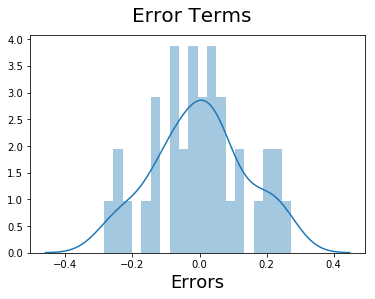

In [330]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions on Test data

In [331]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_test.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
25  0.000000e+00  1781       5.011534  1631.151096       2828416          2.141292                      9.520000                      0.370000                   0.320000                        5.570000                            0.010000                                  1.770000                                 0.620000                           0.830000                    0.000000                      0.000000                      50.500000         0             82.756632               17.243368                   0.0             1          0          34.5               13.0             
48  1.285356e+06  3780       5.973812  1293.873380       4792507          2.353942                      21.947624                     1.162657                   0.622549                        11.242711                           0.211274                                  4.906641                                 1.512819                           2.290410                    0.000000                      0.000000                      45.972354         1             84.719222               15.280778                   0.0             1          0          7.5               -4.0              
52  6.245920e+05  4131       5.917984  1553.059536       6286785          2.341897                      20.405059                     1.094545                   0.414071                        7.249328                            0.221660                                  5.041265                                 1.575020                           1.769328                    0.275099                      2.760158                      46.396047         1             83.992095               16.007905                   1.0             0          0          6.5               -2.0              
37  2.400039e+06  2651       5.791183  1402.766821       3627555          2.417633                      21.390000                     0.860000                   0.300000                        13.950000                           0.140000                                  3.640000                                 1.120000                           1.380000                    0.000000                      0.000000                      46.900000         1             77.571539               22.428461                   0.0             1          0          27.5               13.0             
6   5.048000e+03  5733       5.448716  1211.431178       6838529          2.554119                      10.680000                     0.570000                   0.430000                        2.610000                            0.130000                                  4.420000                                 1.440000                           1.080000                    0.000000                      0.000000                      50.300000         1             82.249779               17.750221                   0.0             0          0          17.5              -12.0

In [332]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_test[columns] = scaler.transform(Consumer_Elec_Climate_GamingAccessory_Master_ML_test[columns])
X_test = Consumer_Elec_Climate_GamingAccessory_Master_ML_test[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = Consumer_Elec_Climate_CameraAccessory_Master_ML_test['gmv_sum']

In [333]:
X_test_sm.head()

const  units_sum  Weekly_Investment_Digital_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Sale_Week_Flag
25  1.0    0.168277   0.081481                        0.322820                                 0.000000                      0.391026          0.0           
48  1.0    0.357576   0.193537                        0.904757                                 0.000000                      0.100792          0.0           
52  1.0    0.390814   0.116323                        0.929734                                 0.458498                      0.127952          1.0           
37  1.0    0.250663   0.074074                        0.669759                                 0.000000                      0.160256          0.0           
6   1.0    0.542519   0.122222                        0.814471                                 0.000000                      0.378205          0.0

In [334]:
y_pred = lr_2.predict(X_test_sm)

Text(0,0.5,'y_pred')

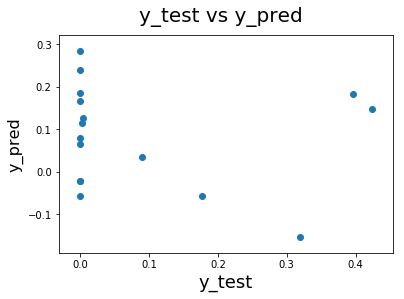

In [335]:
#predicted_train_test_scatter_plot(y_test, y_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [336]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [337]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  0.20064455408051876 
R-Squared Score:  -0.8244707755484335


### Linear Equation for Gaming accessory category
### GMV_SUM = 0.5035 + 0.3339 * units_sum + 0.3188 * Weekly_Investment_Digital_mean - 0.4765 * Weekly_Investment_Online_Marketing_mean - 0.1942 * Weekly_Investment_Other_mean - 0.6780 * Monthly_NPS_mean + 0.0957 * Sale_Week_Flag

## 3) Consumer_Elec_Climate_HomeAudio_Master

<Figure size 4608x4608 with 0 Axes>

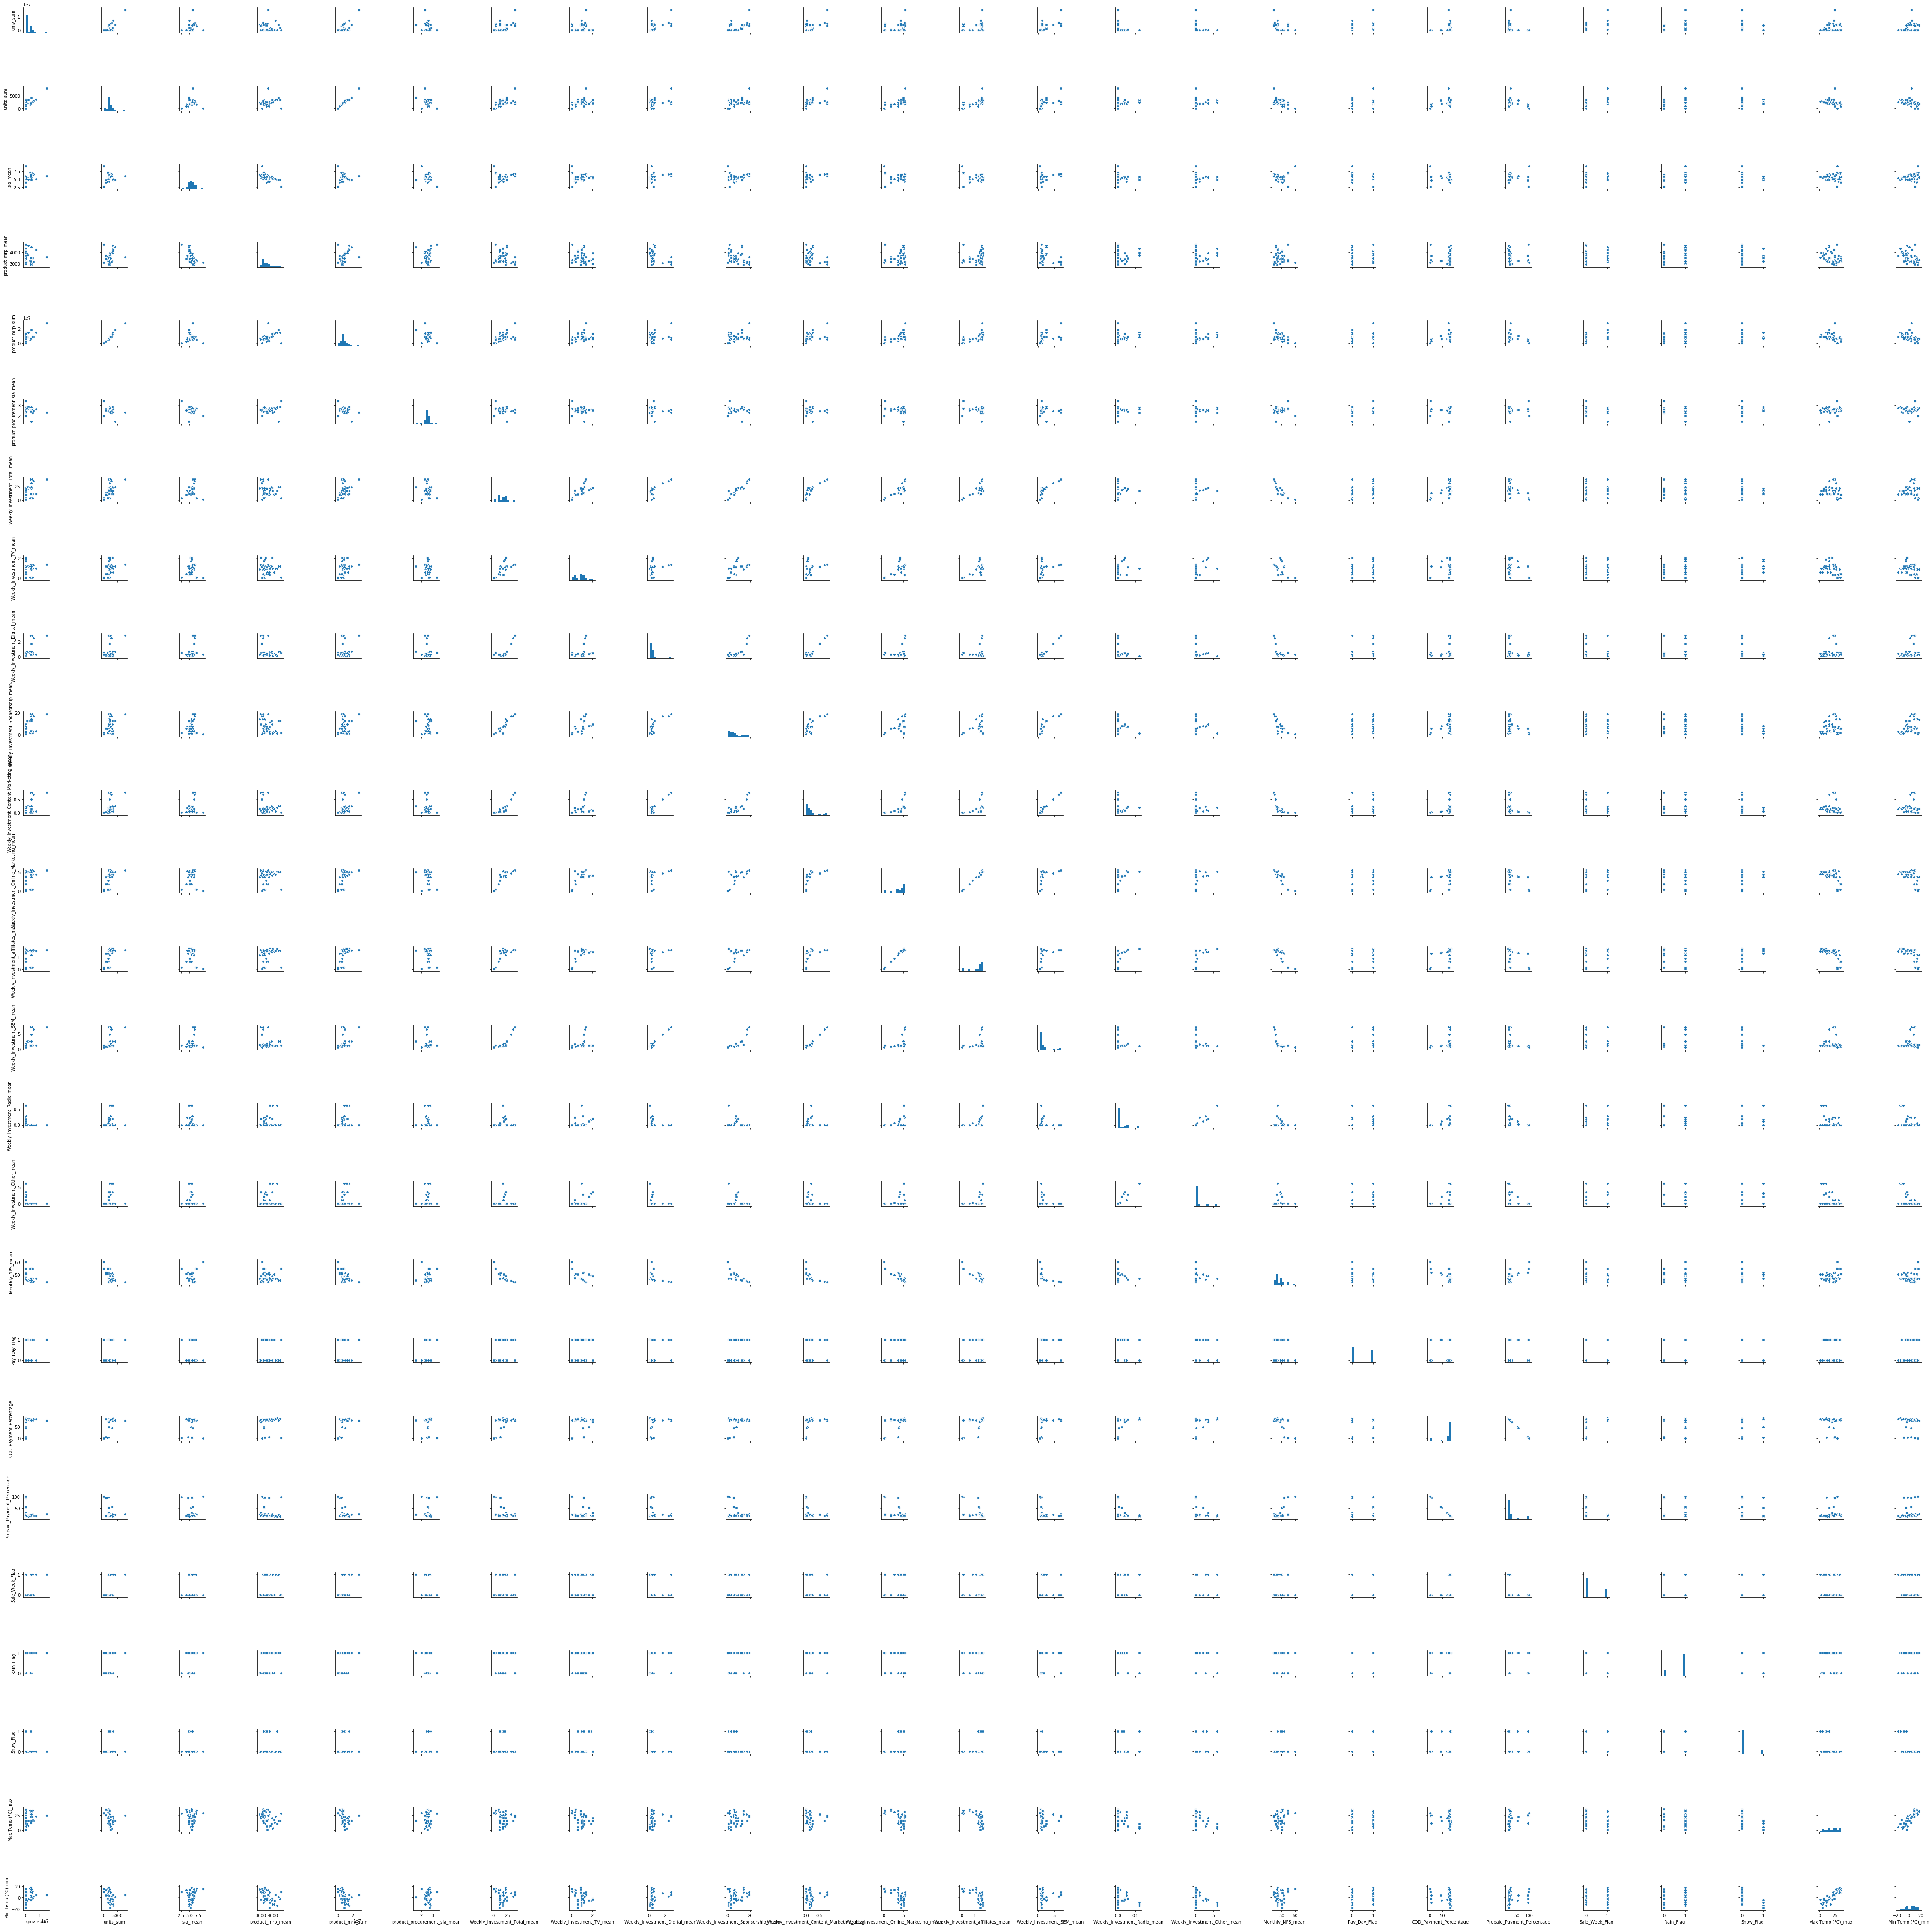

In [338]:
# pair plot
plot_pair(Consumer_Elec_Climate_HomeAudio_Master_ML)

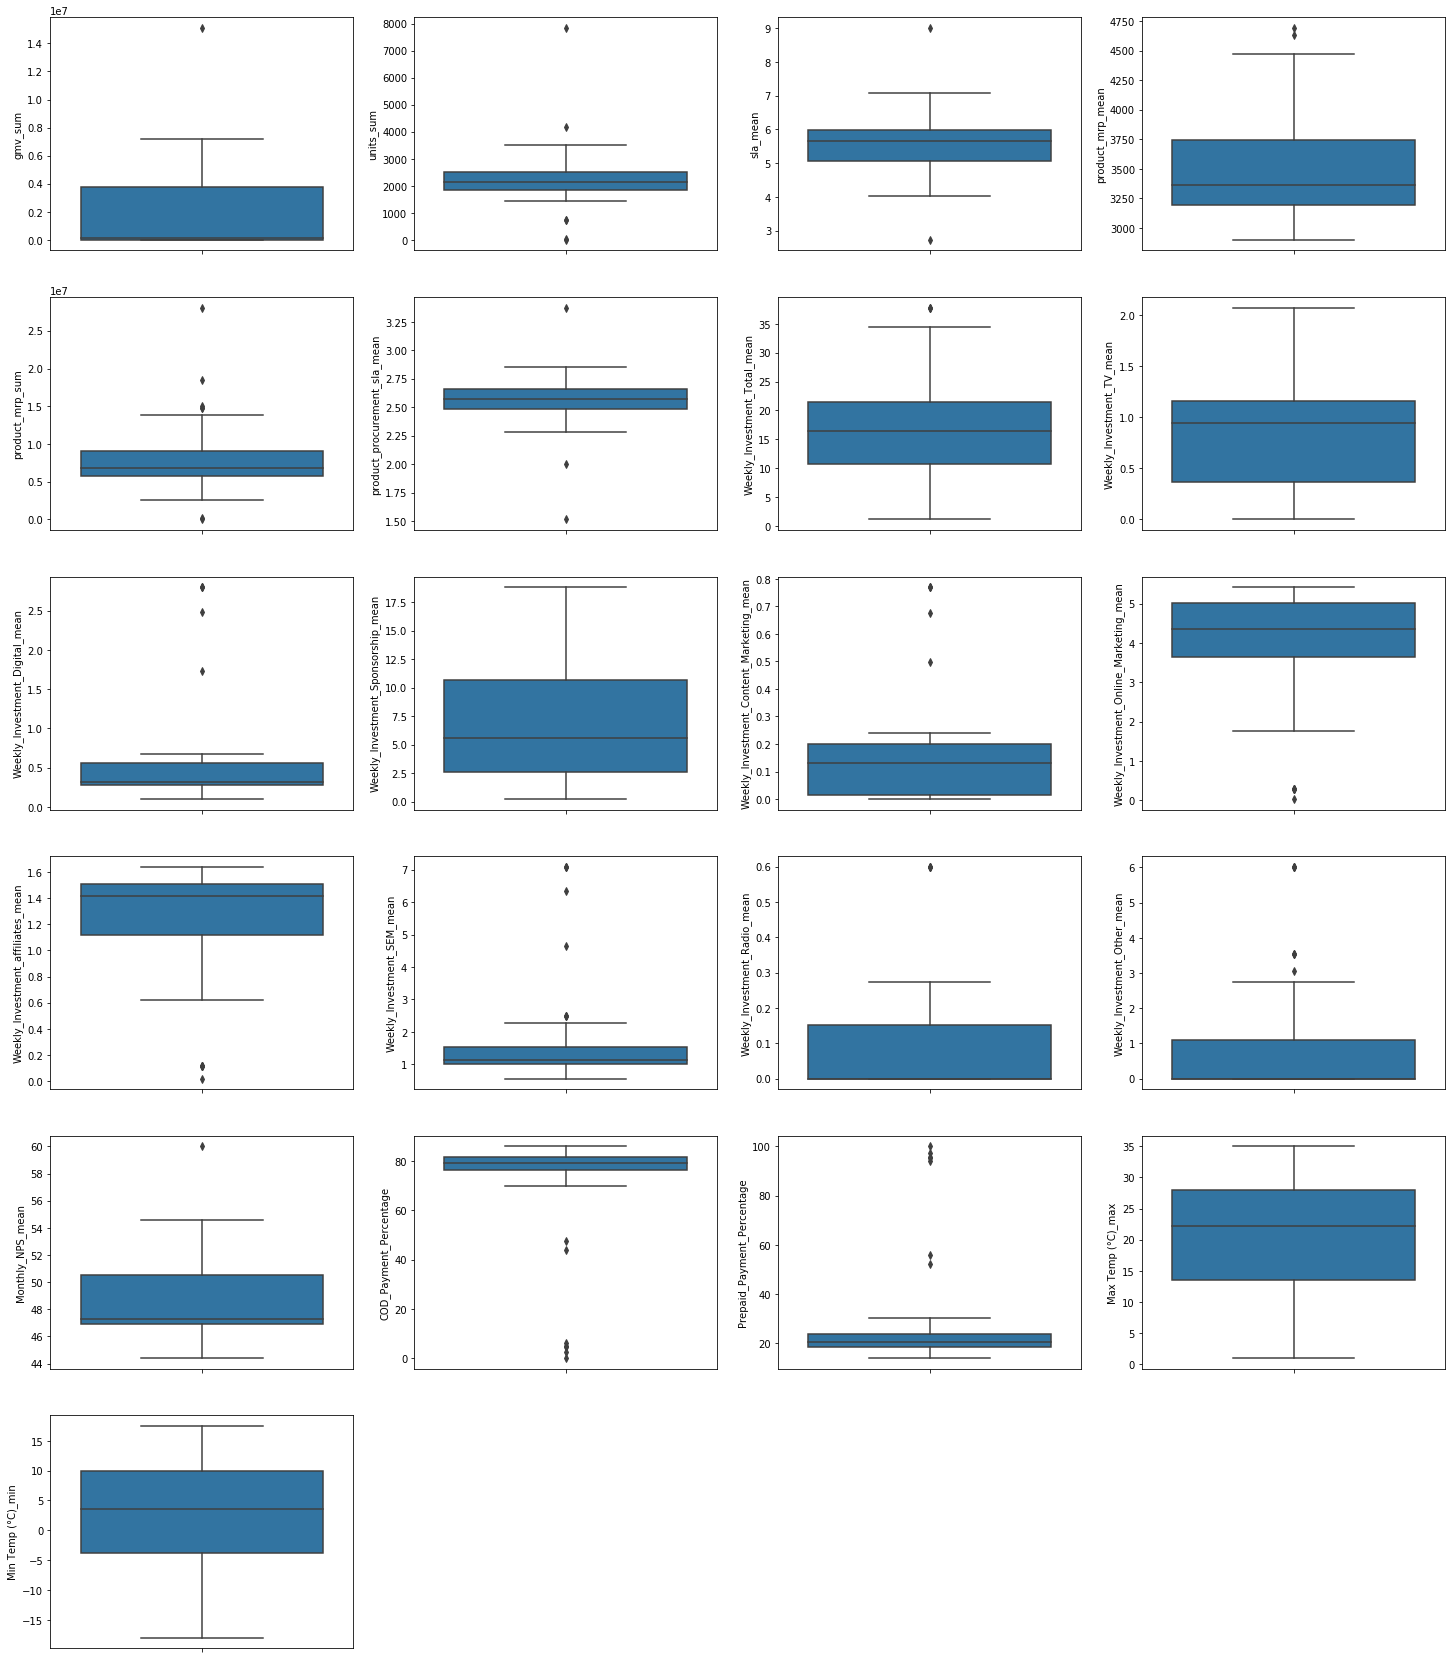

In [339]:
# box plot
plot_box(Consumer_Elec_Climate_HomeAudio_Master_ML)

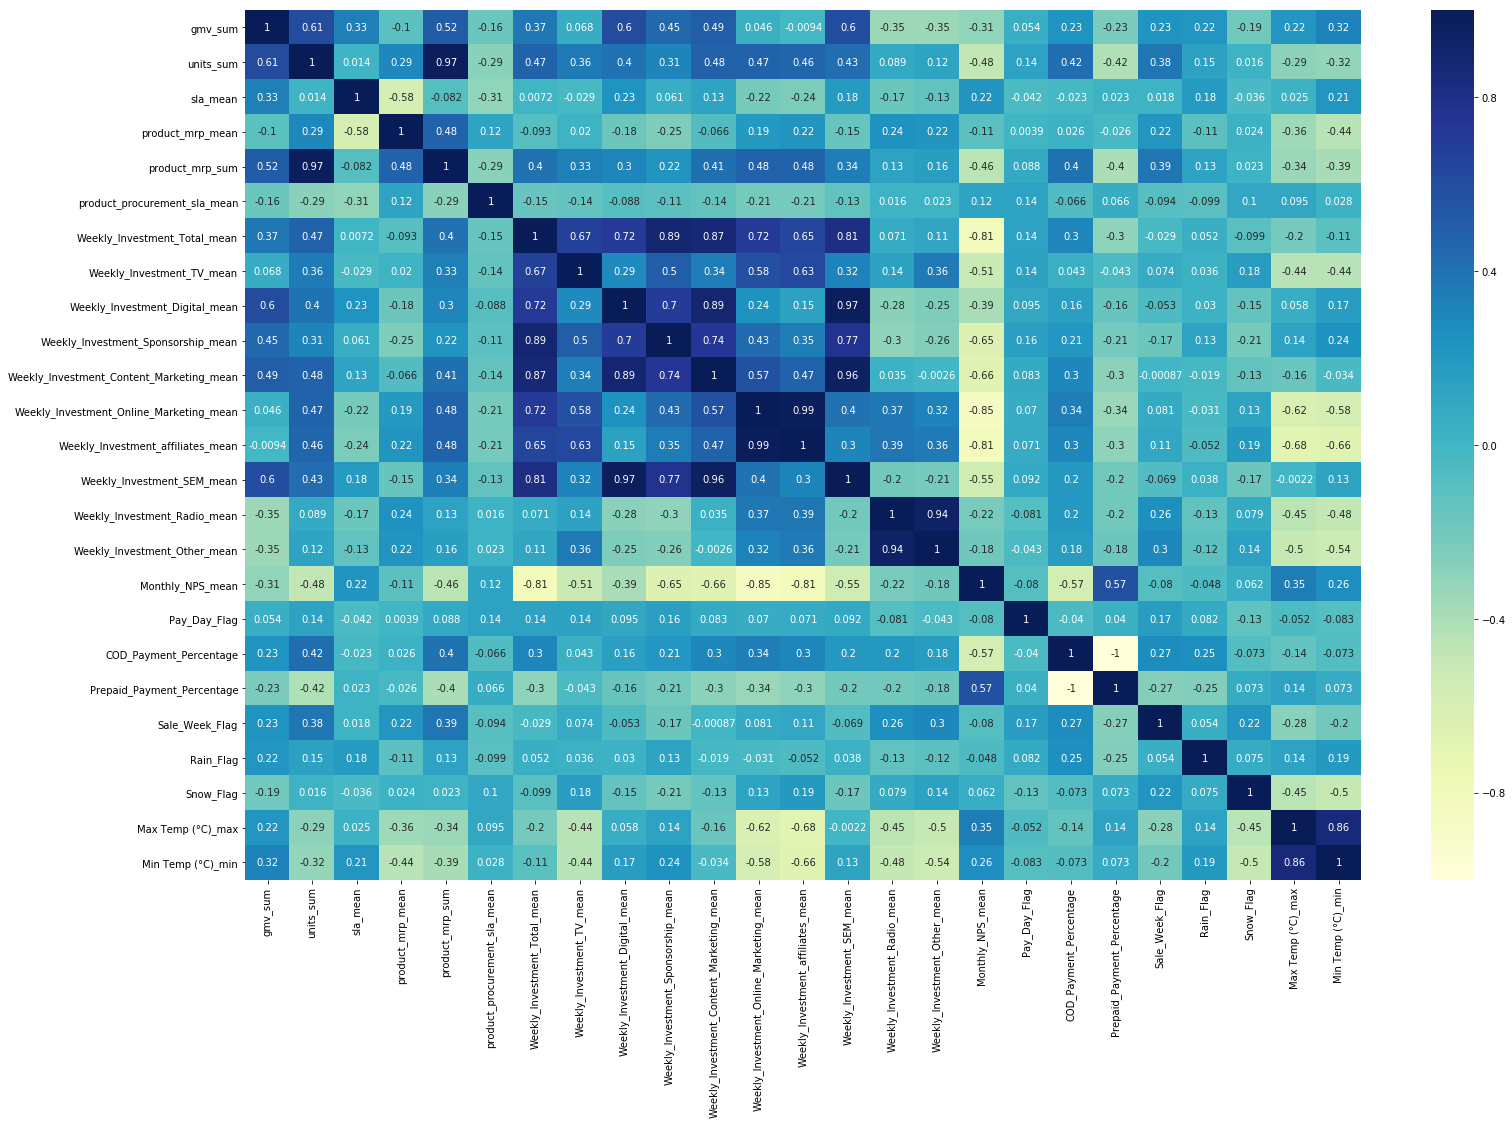

In [340]:
# correlation plot
plot_corr(Consumer_Elec_Climate_HomeAudio_Master_ML)

## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [344]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Consumer_Elec_Climate_HomeAudio_Master_ML_train, Consumer_Elec_Climate_HomeAudio_Master_ML_test = train_test_split(Consumer_Elec_Climate_HomeAudio_Master_ML, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
For ease of Model eavaluation and bringing units of all the variables to a comparable Scale,we will use Rescale. We are using the Min-Max scaling of skLearn

In [348]:
Consumer_Elec_Climate_HomeAudio_Master_ML_train, scaler = scale_feature(Consumer_Elec_Climate_HomeAudio_Master_ML_train)
Consumer_Elec_Climate_HomeAudio_Master_ML_train.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
25  0.009540  0.175221   0.209041  0.309221          0.137609         0.545644                      0.228735                      0.178744                   0.081481                        0.286868                            0.012987                                  0.322820                                 0.370370                           0.041348                    0.0                           0.000000                      0.391026          0.0           0.978383                0.021617                    0.0             1          0          0.985294           0.847458         
26  0.015592  0.009310   0.000000  1.000000          0.010016         1.000000                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      0.653846          1.0           0.029666                0.970334                    0.0             0          0          0.794118           0.745763         
35  0.543370  0.532347   0.574507  0.000000          0.349404         0.583023                      0.552345                      0.415459                   0.074074                        0.737890                            0.181818                                  0.669759                                 0.679012                           0.125574                    0.0                           0.000000                      0.160256          0.0           0.923783                0.076217                    0.0             0          0          0.750000           0.898305         
17  0.000284  0.455240   0.391280  0.213190          0.337721         0.513928                      0.442203                      0.144928                   0.025926                        0.365985                            0.233766                                  0.970315                                 0.919753                           0.150077                    0.4                           0.184385                      0.185897          0.0           0.944568                0.055432                    0.0             1          0          0.632353           0.525424         
7   0.000685  0.615421   0.476167  0.359006          0.492868         0.544805                      0.260360                      0.275362                   0.122222                        0.127557                            0.168831                                  0.814471                                 0.876543                           0.079632                    0.0                           0.000000                      0.378205          0.0           0.972370                0.027630                    1.0             1          1          0.000000           0.288136

In [349]:
Consumer_Elec_Climate_HomeAudio_Master_ML_train.describe()

gmv_sum  units_sum   sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
count  35.000000  35.000000  35.000000  35.000000         35.000000        35.000000                     35.000000                     35.000000                  35.000000                       35.000000                           35.000000                                 35.000000                                35.000000                          35.000000                   35.000000                     35.000000                     35.000000         35.00000      35.000000               35.000000                   35.000000       35.00000   35.000000  35.000000          35.000000        
mean   0.204487   0.503305   0.461389   0.352406          0.408811         0.566838                      0.386672                      0.409764                   0.141590                        0.348288                            0.160776                                  0.640887                                 0.678597                           0.146330                    0.143622                      0.155929                      0.326074          0.40000       0.794714                0.205286                    0.285714        0.80000    0.114286   0.587395           0.536077         
std    0.291813   0.217631   0.168665   0.260105          0.216795         0.145526                      0.225285                      0.277059                   0.209518                        0.267853                            0.222336                                  0.314977                                 0.318283                           0.210824                    0.293001                      0.310864                      0.216977          0.49705       0.326842                0.326842                    0.458349        0.40584    0.322803   0.287223           0.292994         
min    0.000000   0.000000   0.000000   0.000000          0.000000         0.000000                      0.000000                      0.000000                   0.000000                        0.000000                            0.000000                                  0.000000                                 0.000000                           0.000000                    0.000000                      0.000000                      0.000000          0.00000       0.000000                0.000000                    0.000000        0.00000    0.000000   0.000000           0.000000         
25%    0.000281   0.406780   0.368894   0.162319          0.299622         0.543583                      0.244547                      0.178744                   0.050000                        0.127557                            0.012987                                  0.406109                                 0.441039                           0.058193                    0.000000                      0.000000                      0.166667          0.00000       0.897975                0.031080                    0.000000        1.00000    0.000000   0.389706           0.305085         
50%    0.015592   0.479112   0.458047   0.233528          0.345736         0.583023                      0.324044                      0.454106                   0.081481                        0.286868                            0.103896                                  0.721976                                 0.811311                           0.085758                    0.000000                      0.000000                      0.3

## Splitting the data into Predictor Variable and Outcome Variable and Building a Linear Model
Let's split the data and Fit a regression line through the training data using statsmodels. But first we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [350]:
X_Consumer_Elec_Climate_HomeAudio_Master_ML_train, y_Consumer_Elec_Climate_HomeAudio_Master_ML_train, lr_1, y_train_predict = data_split_and_linear_model(Consumer_Elec_Climate_HomeAudio_Master_ML_train)

In [351]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     41.48
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.13e-07
Time:                        08:28:18   Log-Likelihood:                 72.250
No. Observations:                  35   AIC:                            -96.50
Df Residuals:                      11   BIC:                            -59.17
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [352]:
vif = find_vif(X_Consumer_Elec_Climate_HomeAudio_Master_ML_train)
vif

Features           VIF
5   Weekly_Investment_Total_mean              1.103890e+08
14  Weekly_Investment_Other_mean              9.124843e+07
12  Weekly_Investment_SEM_mean                6.921419e+07
8   Weekly_Investment_Sponsorship_mean        6.062098e+07
11  Weekly_Investment_affiliates_mean         5.263025e+07
13  Weekly_Investment_Radio_mean              3.021988e+07
17  COD_Payment_Percentage                    1.666086e+07
6   Weekly_Investment_TV_mean                 9.816891e+06
9   Weekly_Investment_Content_Marketing_mean  9.379802e+06
7   Weekly_Investment_Digital_mean            5.618960e+06
10  Weekly_Investment_Online_Marketing_mean   4.591401e+06
18  Prepaid_Payment_Percentage                3.338462e+06
15  Monthly_NPS_mean                          1.419055e+06
3   product_mrp_sum                           6.436900e+02
0   units_sum                                 4.134000e+02
2   product_mrp_mean                          1.231500e+02
22  Max Temp (°C)_max                         6.747000e+01
23  Min Temp (°C)_min                         5.438000e+01
1   sla_mean                                  3.629000e+01
4   product_procurement_sla_mean              6.970000e+00
20  Rain_Flag                                 4.700000e+00
21  Snow_Flag                                 4.520000e+00
16  Pay_Day_Flag                              2.950000e+00
19  Sale_Week_Flag                            2.390000e+00

### Extremly high VIF Values and high P Values indicate there are insignificant and corelated variables which need to be eliminated first.

In [353]:
Consumer_Elec_Climate_HomeAudio_Master_ML_train.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
25  0.175221   0.209041  0.309221          0.137609         0.545644                      0.228735                      0.178744                   0.081481                        0.286868                            0.012987                                  0.322820                                 0.370370                           0.041348                    0.0                           0.000000                      0.391026          0.0           0.978383                0.021617                    0.0             1          0          0.985294           0.847458         
26  0.009310   0.000000  1.000000          0.010016         1.000000                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      0.653846          1.0           0.029666                0.970334                    0.0             0          0          0.794118           0.745763         
35  0.532347   0.574507  0.000000          0.349404         0.583023                      0.552345                      0.415459                   0.074074                        0.737890                            0.181818                                  0.669759                                 0.679012                           0.125574                    0.0                           0.000000                      0.160256          0.0           0.923783                0.076217                    0.0             0          0          0.750000           0.898305         
17  0.455240   0.391280  0.213190          0.337721         0.513928                      0.442203                      0.144928                   0.025926                        0.365985                            0.233766                                  0.970315                                 0.919753                           0.150077                    0.4                           0.184385                      0.185897          0.0           0.944568                0.055432                    0.0             1          0          0.632353           0.525424         
7   0.615421   0.476167  0.359006          0.492868         0.544805                      0.260360                      0.275362                   0.122222                        0.127557                            0.168831                                  0.814471                                 0.876543                           0.079632                    0.0                           0.000000                      0.378205          0.0           0.972370                0.027630                    1.0             1          1          0.000000           0.288136

In [354]:
X_train = Consumer_Elec_Climate_HomeAudio_Master_ML_train

In [355]:
y_train = y_Consumer_Elec_Climate_HomeAudio_Master_ML_train

In [356]:
# Dropping highly correlated variables and insignificant variables

#Iteration 1
X = X_train.drop('Weekly_Investment_Online_Marketing_mean', 1,) #Removing due to high VIF (3398636.27) indicating highly correlated & high P Value (0.991) indicating insignificance
#Iteration 2
X = X.drop('Weekly_Investment_Total_mean', 1,) #Removing due to highest VIF (21774393.24) indicating highly correlated
#Iteration 3
X = X.drop('Pay_Day_Flag', 1,) #Removing due to P Value (0.631) indicating insignificance
#Iteration 4
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,) #Removing due to high VIF (160.41) indicating highly correlated & high P Value (0.991) indicating insignificance
#Iteration 5
X = X.drop('Rain_Flag', 1,) #Removing due to high VIF (2.42) indicating highly correlated & high P Value (0.986) indicating insignificance
#Iteration 20
X = X.drop('product_mrp_mean', 1,) #Removing due to high VIF (3.07) indicating highly correlated & high P Value (0.417) indicating insignificance
#Iteration 6
X = X.drop('Weekly_Investment_Other_mean', 1,)  #Removing due to highest VIF (376.78) indicating highly correlated
#Iteration 14
X = X.drop('Weekly_Investment_affiliates_mean', 1,) #Removing due to high VIF (21.02) indicating highly correlated & high P Value (0.906) indicating insignificance
#Iteration 4
X = X.drop('Weekly_Investment_SEM_mean', 1,)#Removing due to high VIF (1999.01) indicating highly correlated & high P Value (0.592) indicating insignificance
#Iteration 9
X = X.drop('Snow_Flag', 1,)#Removing due to P Value (0.666) indicating insignificance
#Iteration 10
X = X.drop('product_mrp_sum', 1,)#Removing due to high VIF (674.05) indicating highly correlated
#Iteration 13
X = X.drop('Max Temp (°C)_max', 1,) #Removing due to high VIF (42.73) indicating highly correlated & high P Value (0.962) indicating insignificance
#Iteration 12
X = X.drop('product_procurement_sla_mean', 1,) #Removing due to high VIF (18.14) indicating highly correlated & high P Value (0.925) indicating insignificance
#Iteration 7
X = X.drop('COD_Payment_Percentage', 1,) #Removing due to high VIF (337.65) indicating highly correlated & high P Value (0.261) indicating insignificance
#Iteration 15
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,) #Removing due to high VIF (80.17) indicating highly correlated & high P Value (0.156) indicating insignificance
#Iteration 19
X = X.drop('sla_mean', 1,)#Removing due to high VIF (5.43) indicating highly correlated
#Iteration 16
X = X.drop('Weekly_Investment_Radio_mean', 1,) #Removing due to high VIF (4.02) indicating highly correlated & high P Value (0.808) indicating insignificance
#Iteration 11
X = X.drop('Weekly_Investment_TV_mean', 1,)#Removing due to high VIF (600.72) indicating highly correlated
#Iteration 18
#X = X.drop('Monthly_NPS_mean', 1,) #Removing due to high VIF (7.71) indicating highly correlated & high P Value (0.074) indicating insignificance
#Iteration 17
#X = X.drop('units_sum', 1,)#Removing due to high VIF (3.34) indicating highly correlated & high P Value (0.506) indicating insignificance
#Iteration 17
#X = X.drop('Prepaid_Payment_Percentage', 1,)#Removing due to high VIF (3.34) indicating highly correlated & high P Value (0.506) indicating insignificance




In [357]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [358]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     7.927
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           4.73e-05
Time:                        08:28:23   Log-Likelihood:                 11.325
No. Observations:                  35   AIC:                            -8.649
Df Residuals:                      28   BIC:                             2.238
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [359]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2  Monthly_NPS_mean                6.92
5  Min Temp (°C)_min               4.95
0  units_sum                       3.35
3  Prepaid_Payment_Percentage      2.63
1  Weekly_Investment_Digital_mean  1.86
4  Sale_Week_Flag                  1.67

### Making Predictions on Train data

In [360]:
y_train_pred.head()

26    0.092450
41    0.775345
28    0.276373
38    0.186701
17    0.007882
dtype: float64

### Residual Analysis of the train data

In [361]:
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

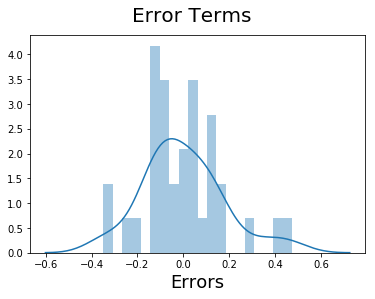

In [362]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions on Test data

In [363]:
Consumer_Elec_Climate_HomeAudio_Master_ML_test.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
6   2268.0     3392.0     5.026535  4102.114490       13758492.0       2.355397                      10.680000                     0.570000                   0.430000                        2.61000                             0.130000                                  4.420000                                 1.440000                           1.080000                    0.0                           0.0                           50.300000         1.0           80.381634               19.618366                   0.0             0          0          17.5              -12.0             
36  3918162.0  2121.0     6.380795  3045.946547       6439131.0        2.459792                      30.757323                     1.150946                   1.726206                        16.72825                            0.499404                                  4.655459                                 1.365307                           4.637455                    0.0                           0.0                           45.473794         1.0           77.814570               22.185430                   0.0             1          0          26.5               8.0              
37  3310758.0  1863.0     5.967532  2960.149892       5470357.0        2.564935                      37.810000                     1.370000                   2.800000                        18.82000                            0.770000                                  5.420000                                 1.550000                           7.090000                    0.0                           0.0                           44.400000         0.0           79.816017               20.183983                   0.0             0          0          23.0               10.0             
28  4949069.0  2401.0     6.822250  3336.889168       7978502.0        2.628189                      3.790000                      0.050000                   0.560000                        1.65000                             0.000000                                  0.290000                                 0.120000                           1.120000                    0.0                           0.0                           54.600000         1.0           75.993308               24.006692                   1.0             1          0          33.0               11.0             
43  3716317.0  1854.0     5.881971  3502.038982       6468266.0        2.479155                      11.380000                     0.940000                   0.280000                        3.15000                             0.040000                                  4.350000                                 1.470000                           1.160000                    0.0                           0.0                           47.000000         0.0           81.645912               18.354088                   0.0             1          1          16.0              -4.0

In [364]:
Consumer_Elec_Climate_HomeAudio_Master_ML_test[columns] = scaler.transform(Consumer_Elec_Climate_HomeAudio_Master_ML_test[columns])
X_test = Consumer_Elec_Climate_HomeAudio_Master_ML_test[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = Consumer_Elec_Climate_HomeAudio_Master_ML_test['gmv_sum']

In [365]:
X_test_sm.head()

const  units_sum  Weekly_Investment_Digital_mean  Monthly_NPS_mean  Prepaid_Payment_Percentage  Sale_Week_Flag  Min Temp (°C)_min
6   1.0    0.809501   0.122222                        3.782051e-01      0.046149                    0.0             0.000000         
36  1.0    0.506087   0.602299                        6.883293e-02      0.076612                    0.0             0.677966         
37  1.0    0.444497   1.000000                        8.792966e-14      0.052861                    0.0             0.745763         
28  1.0    0.572929   0.170370                        6.538462e-01      0.098224                    1.0             0.779661         
43  1.0    0.442349   0.066667                        1.666667e-01      0.031147                    0.0             0.271186

In [366]:
y_pred = lr_2.predict(X_test_sm)

Text(0,0.5,'y_pred')

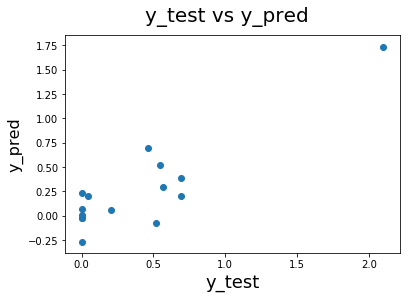

In [367]:
#predicted_train_test_scatter_plot(y_test, y_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [368]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [369]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  0.27292081279733466 
R-Squared Score:  0.7368733512837338


### Equation of line for Home Audio Category
### gmv_sum = - 0.5815 + 0.7505 * units_sum + 0.4098 * Weekly_Investment_Digital_mean  - 0.2952 * Monthly_NPS_mean + 0.1999 * Prepaid_Payment_Percentage + 0.0892 * Sale_Week_Flag + 0.7088 * Min Temp (°C)_min

# Multiplicative Models

## 1) Camera Accessory Category

In [370]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train_Log = (np.log(Consumer_Elec_Climate_CameraAccessory_Master_ML_train1)).replace(-np.inf, 0)

Consumer_Elec_Climate_CameraAccessory_Master_ML_train_Log.head(100)

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
40  0.000000  -0.295967 -1.155985          0.000000        -1.142793e-01                 -1.665335e-14                 -4.254519e-01              -2.090550e-13                   -1.110223e-16                        0.000000e+00                             -2.408074e-13                            -6.103152e-02                      -3.133049e-13                0.000000e+00                  0.000000e+00                 -27.657937         0.0          -0.112733               -2.238567                    0.0             0.0        0.0       -3.693601e-01      -0.581030         
44 -1.457478  -0.180957 -0.721463         -1.362083        -4.154919e-01                 -1.499830e+00                 -8.195982e-01              -2.708050e+00                   -2.086735e+00                       -2.957511e+00                             -2.339086e-01                            -1.185970e-01                      -2.942843e+00                0.000000e+00                  0.000000e+00                 -1.367435          0.0          -0.065291               -2.761372                    0.0             0.0        0.0       -7.537718e-01      -1.033015         
37 -1.932120  -0.339365  0.000000         -1.555106        -4.440892e-16                 -6.589727e-01                 -9.137795e-01              -2.602690e+00                   -3.177553e-01                       -1.704748e+00                             -4.261169e-01                            -4.186742e-01                      -2.432017e+00                0.000000e+00                  0.000000e+00                 -1.406656          0.0          -0.115135               -2.218663                    0.0             0.0        0.0       -2.876821e-01      -0.107246         
17 -0.720573  -0.778249 -0.907897         -0.675863        -3.326799e+00                 -9.196998e-01                 -2.089207e+00              -3.652512e+00                   -1.074315e+00                       -1.453434e+00                             -3.168410e-02                            -8.940009e-02                      -2.176670e+00               -9.162907e-01                 -1.690727e+00                 -1.258236          0.0          -0.013979               -4.277155                    0.0             0.0        0.0       -4.583076e-01      -0.643550         
7  -0.804457  -0.414772 -0.799056         -0.738678         0.000000e+00                 -1.596553e+00                 -1.356949e+00              -2.101914e+00                   -2.365448e+00                       -1.778856e+00                             -2.168153e-01                            -1.410681e-01                      -3.220475e+00                0.000000e+00                  0.000000e+00                 -0.547994          0.0          -0.007439               -4.904762                    0.0             0.0        0.0        0.000000e+00      -1.244324         
49 -1.733405  -0.104306 -0.189124         -1.460372        -7.871660e-01                 -5.346641e-01                 -5.633158e-01              -1.537979e+00                   -4.272205e-01                       -1.165752e+00                             -8.541298e-02                            -8.223215e-02                      -1.333405e+00                0.000000e+00                  0.000000e+00                 -1.986474          0.0          -0.062496               -2.803737                    0.0             0.0

In [371]:
X_train_log = Consumer_Elec_Climate_CameraAccessory_Master_ML_train_Log

In [372]:
y_train_log = y_Consumer_Elec_Climate_CameraAccessory_Master_ML_train

In [373]:
y_Consumer_Elec_Climate_CameraAccessory_Master_ML_train.head()

40    1.000000
44    0.398953
37    0.348415
17    0.000000
7     0.000241
Name: gmv_sum, dtype: float64

In [374]:
# Build first fitted model

X = X_train_log
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()



In [375]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     6.402
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           0.000319
Time:                        08:28:42   Log-Likelihood:                 44.086
No. Observations:                  36   AIC:                            -46.17
Df Residuals:                      15   BIC:                            -12.92
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [376]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
10  Weekly_Investment_Online_Marketing_mean   453707.46
11  Weekly_Investment_affiliates_mean         426056.37
5   Weekly_Investment_Total_mean              5070.39  
6   Weekly_Investment_TV_mean                 2686.35  
3   product_mrp_sum                           387.23   
0   units_sum                                 380.75   
14  Weekly_Investment_Other_mean              171.50   
13  Weekly_Investment_Radio_mean              158.12   
9   Weekly_Investment_Content_Marketing_mean  123.55   
23  Min Temp (°C)_min                         29.64    
18  Prepaid_Payment_Percentage                17.45    
22  Max Temp (°C)_max                         17.26    
1   sla_mean                                  16.60    
4   product_procurement_sla_mean              13.07    
8   Weekly_Investment_Sponsorship_mean        8.14     
2   product_mrp_mean                          7.56     
12  Weekly_Investment_SEM_mean                6.62     
7   Weekly_Investment_Digital_mean            4.34     
17  COD_Payment_Percentage                    2.84     
15  Monthly_NPS_mean                          2.14     
16  Pay_Day_Flag                             NaN       
19  Sale_Week_Flag                           NaN       
20  Rain_Flag                                NaN       
21  Snow_Flag                                NaN

### Extremly high VIF Values and high P Values indicate there are insignificant and corelated variables which need to be eliminated first.

In [377]:
# Dropping highly correlated variables and insignificant variables

#Iteration 1
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,) # Removing due to high VIF(54199.13) indicating highly correlated & high P Value (0.512) indicating insignificance
#Iteration 2
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 3
X = X.drop('product_mrp_sum', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 4
X = X.drop('units_sum', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 5
X = X.drop('sla_mean', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 6
X = X.drop('Weekly_Investment_affiliates_mean', 1,)#Removing as high P Value (0.611) indicating insignificance and high VIF (9.15) indicating highly correlated
#Iteration 7
X = X.drop('Prepaid_Payment_Percentage', 1,) #Removing due to extremly high VIF(6697.23) value indicating high correlation
#Iteration 8
X = X.drop('Weekly_Investment_Total_mean', 1,)#Removing as high P Value (0.922) indicating insignificance and high VIF (14.61) indicating highly correlated
#Iteration 9
X = X.drop('Weekly_Investment_SEM_mean', 1,)#Removing as high P Value (0.719) indicating insignificance and high VIF (19.37) indicating highly correlated
#Iteration 10
X = X.drop('Weekly_Investment_Radio_mean', 1,) #Removing as high P Value indicating insignificance
#Iteration 11
X = X.drop('Rain_Flag', 1,)#Removing as high VIF (11.48) indicating highly correlated
#Iteration 12
X = X.drop('Snow_Flag', 1,) #Removing as high P Value (0.98) indicating insignificance and high VIF (67.23) indicating highly correlated
#Iteration 13
X = X.drop('Sale_Week_Flag', 1,)#Removing as high P Value (0.57) indicating insignificance and high VIF (2.24) indicating highly correlated
#Iteration 14
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance (0.14)
#Iteration 15
X = X.drop('Pay_Day_Flag', 1,)#Removing as high VIF (21.68) indicating highly correlated
#Iteration 16
X = X.drop('Max Temp (°C)_max', 1,) #Removing as high P Value (0.477) indicating insignificance and high VIF (17.44) indicating highly correlated
#Iteration 17
X = X.drop('Weekly_Investment_Other_mean', 1,)#Removing as high P Value (0.497) indicating insignificance and high VIF (2.38) indicating highly correlated


#Ignoring below iterations as R2 dips below 60

#Iteration 18
#X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance and high VIF (3.52) indicating highly correlated
#Iteration 19
#X = X.drop('product_mrp_sum', 1,)#Removing as high P Value indicating insignificance and high VIF indicating highly correlated

#Iteration 20
#X = X.drop('product_procurement_sla_mean', 1,)#Removing as high VIF (2.61) indicating highly correlated

In [378]:
# second iteration for fitted model

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()



In [379]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     8.448
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.52e-05
Time:                        08:28:44   Log-Likelihood:                 23.930
No. Observations:                  36   AIC:                            -31.86
Df Residuals:                      28   BIC:                            -19.19
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [380]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1  product_procurement_sla_mean    3.50
0  product_mrp_mean                2.73
6  Min Temp (°C)_min               2.22
3  Weekly_Investment_Digital_mean  1.33
2  Weekly_Investment_TV_mean       1.29
5  COD_Payment_Percentage          1.26
4  Monthly_NPS_mean                1.13

### Residual Analysis of the train data

In [381]:
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

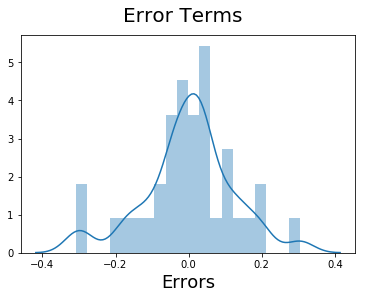

In [382]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_log - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions on Test data

In [383]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log = (np.log(Consumer_Elec_Climate_CameraAccessory_Master_ML_test1)).replace(-np.inf, 0)

Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
6  -7.682510  -0.627143  -0.515110 -2.611101         -0.708337        -0.878286                     -1.596553                     -1.356949                  -2.101914                       -2.365448                           -1.778856                                 -0.216815                                -0.141068                          -3.220475                    0.0                           0.0                          -0.547994          0.0          -0.034461               -3.385102                    0.0             0.0        0.0       -0.723000           0.000000         
32 -10.033408 NaN        -0.547684  0.539933         NaN              NaN                           NaN                           NaN                        -2.708050                       NaN                                  0.000000                                 NaN                                      NaN                                NaN                          0.0                           0.0                           0.424325          0.0           0.214920               NaN                          0.0             0.0        0.0       -0.125163          -0.107246         
38 -0.858283  -1.138044  -0.890742 -0.064239         -0.889013        -1.166661                     -0.317747                     -0.671242                  -0.738678                       -0.166694                           -0.618937                                 -0.217780                                -0.246870                          -0.722533                    0.0                           0.0                          -1.979294          0.0          -0.015583               -4.169387                    0.0             0.0        0.0       -0.287682          -0.388658         
35 -0.924932  -1.743619  -0.277227 -0.248412         -1.497123        -0.153607                     -0.658973                     -0.913780                  -2.602690                       -0.317755                           -1.704748                                 -0.426117                                -0.418674                          -2.432017                    0.0                           0.0                          -1.406656          0.0          -0.153585               -1.949308                    0.0             0.0        0.0       -0.076373          -0.339868         
33 -8.925916  NaN         0.250216 NaN               NaN              NaN                           NaN                           NaN                        -2.708050                       NaN                                  0.000000                                 NaN                                      NaN                                NaN                          0.0                           0.0                           0.424325          0.0          NaN                      0.042481                    0.0             0.0        0.0       -0.194156          -0.126294

In [384]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log = Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log.fillna(0)

In [385]:
#Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log[columns] = scaler.transform(Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log[columns])
X_test = Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = Consumer_Elec_Climate_CameraAccessory_Master_ML_test1['gmv_sum']

In [386]:
X_test_sm.head()

const  product_mrp_mean  product_procurement_sla_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Monthly_NPS_mean  COD_Payment_Percentage  Min Temp (°C)_min
6   1.0   -2.611101         -0.878286                     -1.356949                  -2.101914                       -0.547994         -0.034461                0.000000         
32  1.0    0.539933          0.000000                      0.000000                  -2.708050                        0.424325          0.214920               -0.107246         
38  1.0   -0.064239         -1.166661                     -0.671242                  -0.738678                       -1.979294         -0.015583               -0.388658         
35  1.0   -0.248412         -0.153607                     -0.913780                  -2.602690                       -1.406656         -0.153585               -0.339868         
33  1.0    0.000000          0.000000                      0.000000                  -2.708050                        0.424325          0.000000               -0.126294

In [387]:
y_pred = lr_2.predict(X_test_sm)

Text(0,0.5,'y_pred')

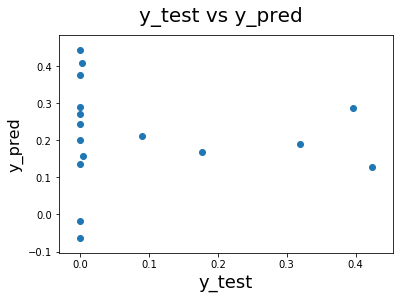

In [388]:
#predicted_train_test_scatter_plot(y_test, y_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [389]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [390]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  0.24182174588733304 
R-Squared Score:  -1.650164686900439


### Multiplicative equation for Camera Accesory category
### GMV_SUM = 0.2911 - 0.0492 * product_mrp_mean + 0.1610 * product_procurement_sla_mean - 0.0103 * Weekly_Investment_TV_mean + 0.0044 * Weekly_Investment_Digital_mean - 0.0136 * Monthly_NPS_mean - 0.0026 * COD_Payment_Percentage + 0.0274 * Min Temp (°C)_min

# Multiplicative Models

## 1) Gaming Accessory Category

In [391]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_train_log = (np.log(Consumer_Elec_Climate_GamingAccessory_Master_ML_train1)).replace(-np.inf, 0)

Consumer_Elec_Climate_GamingAccessory_Master_ML_train_log.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
26 -5.932624   0.000000  0.000000         -5.478047        -1.325633                     -2.623906e+00                 -3.723281                  -1.769781e+00                   -2.578496e+00                        0.000000                                 -3.031619e+00                            -2.785011                          -2.456225e+00                0.000000                      0.000000                     -0.424883          0.0           0.000000                0.000000                    0.0             0.0        0.0       -0.230524          -0.241162         
41  0.000000  -0.329278 -1.664737          0.000000        -0.751216                     -2.309264e-14                 -0.412738                  -2.257083e-13                   -1.110223e-16                        0.000000                                 -2.378098e-13                            -0.057158                          -3.056444e-13                0.000000                      0.000000                     -28.102714         0.0          -0.225421               -1.600380                    0.0             0.0        0.0       -0.369360          -0.528844         
28 -1.320336  -0.350981 -1.233557         -1.264570        -1.167796                     -2.623906e+00                 -3.723281                  -1.769781e+00                   -2.578496e+00                        0.000000                                 -3.031619e+00                            -2.785011                          -2.456225e+00                0.000000                      0.000000                     -0.424883          0.0          -0.269750               -1.442104                    0.0             0.0        0.0       -0.060625          -0.196710         
38 -1.340756  -0.132647 -0.587072         -1.140794        -1.512162                     -5.935831e-01                 -0.878371                  -2.602690e+00                   -3.039602e-01                       -1.704748                                 -4.008376e-01                            -0.387116                          -2.074858e+00                0.000000                      0.000000                     -1.830980          0.0          -0.226030               -1.597975                    0.0             0.0        0.0       -0.287682          -0.055060         
17 -1.020757  -0.168539 -0.180509         -0.677043        -1.421222                     -8.159866e-01                 -1.931521                  -3.652512e+00                   -1.005163e+00                       -1.453434                                 -3.013411e-02                            -0.083650                          -1.896610e+00               -0.916291                     -1.690727                     -1.682560          0.0          -0.196850               -1.722126                    0.0             0.0        0.0       -0.458308          -0.591364

In [392]:
X_train_log = Consumer_Elec_Climate_GamingAccessory_Master_ML_train_log

In [393]:
y_train_log = y_Consumer_Elec_Climate_GamingAccessory_Master_ML_train

In [394]:
# Build first fitted model

X = X_train_log
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()



In [395]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     5.118
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           0.000864
Time:                        08:28:52   Log-Likelihood:                 40.119
No. Observations:                  37   AIC:                            -38.24
Df Residuals:                      16   BIC:                            -4.409
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [396]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
10  Weekly_Investment_Online_Marketing_mean   85146.93
11  Weekly_Investment_affiliates_mean         80648.28
0   units_sum                                 3926.11 
3   product_mrp_sum                           3322.10 
5   Weekly_Investment_Total_mean              1289.98 
6   Weekly_Investment_TV_mean                 646.27  
13  Weekly_Investment_Radio_mean              201.69  
14  Weekly_Investment_Other_mean              176.66  
12  Weekly_Investment_SEM_mean                166.11  
9   Weekly_Investment_Content_Marketing_mean  108.91  
18  Prepaid_Payment_Percentage                107.36  
8   Weekly_Investment_Sponsorship_mean        95.17   
2   product_mrp_mean                          82.68   
4   product_procurement_sla_mean              28.73   
22  Max Temp (°C)_max                         20.11   
17  COD_Payment_Percentage                    12.20   
23  Min Temp (°C)_min                         10.37   
1   sla_mean                                  6.88    
7   Weekly_Investment_Digital_mean            5.42    
15  Monthly_NPS_mean                          3.07    
16  Pay_Day_Flag                             NaN      
19  Sale_Week_Flag                           NaN      
20  Rain_Flag                                NaN      
21  Snow_Flag                                NaN

### Extremly high VIF Values and high P Values indicate there are insignificant and corelated variables which need to be eliminated first.

In [397]:
# Dropping highly correlated variables and insignificant variables
#X = X.drop('gmv_sum', 1,) # Removing due to high VIF(54199.13) indicating highly correlated & high P Value (0.512) indicating insignificance

#Iteration 1
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,) # Removing due to high VIF(54199.13) indicating highly correlated & high P Value (0.512) indicating insignificance
#Iteration 2
X = X.drop('Rain_Flag', 1,)#Removing as NAN for log values
#Iteration 12
X = X.drop('Snow_Flag', 1,) #Removing as NAN for log values
#Iteration 13
X = X.drop('Sale_Week_Flag', 1,)#Removing as NAN for log values
#Iteration 3
X = X.drop('Weekly_Investment_Total_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 4
X = X.drop('Weekly_Investment_TV_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 4
X = X.drop('Weekly_Investment_SEM_mean', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 5
X = X.drop('units_sum', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 7
X = X.drop('Prepaid_Payment_Percentage', 1,) #Removing due to extremly high VIF(6697.23) value indicating high correlation
#Iteration 20
X = X.drop('product_procurement_sla_mean', 1,)#Removing as high VIF (2.61) indicating highly correlated
#Iteration 15
X = X.drop('Pay_Day_Flag', 1,)#Removing as high VIF (21.68) indicating highly correlated
#Iteration 6
X = X.drop('sla_mean', 1,)#Removing as high P Value (0.611) indicating insignificance and high VIF (9.15) indicating highly correlated
#Iteration 8
X = X.drop('Weekly_Investment_Radio_mean', 1,)#Removing as high P Value (0.922) indicating insignificance and high VIF (14.61) indicating highly correlated
#Iteration 16
X = X.drop('Max Temp (°C)_max', 1,) #Removing as high P Value (0.477) indicating insignificance and high VIF (17.44) indicating highly correlated
#Iteration 9
X = X.drop('Weekly_Investment_Digital_mean', 1,)#Removing as high P Value (0.719) indicating insignificance and high VIF (19.37) indicating highly correlated
#Iteration 19
X = X.drop('product_mrp_sum', 1,)#Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 14
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance (0.14)

#Iteration 10
#X = X.drop('Weekly_Investment_Radio_mean', 1,) #Removing as high P Value indicating insignificance
#Iteration 11
#Iteration 14
#X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance (0.14)
#Iteration 17
#X = X.drop('Weekly_Investment_Other_mean', 1,)#Removing as high P Value (0.497) indicating insignificance and high VIF (2.38) indicating highly correlated


#Ignoring below iterations as R2 dips below 60

#Iteration 18
#X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance and high VIF (3.52) indicating highly correlated


In [398]:
# second iteration for fitted model

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()



In [399]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     7.266
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           4.74e-05
Time:                        08:28:54   Log-Likelihood:                 21.838
No. Observations:                  37   AIC:                            -27.68
Df Residuals:                      29   BIC:                            -14.79
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [400]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1  Weekly_Investment_Content_Marketing_mean  3.37
0  product_mrp_mean                          2.90
5  COD_Payment_Percentage                    2.24
6  Min Temp (°C)_min                         2.23
4  Monthly_NPS_mean                          1.63
3  Weekly_Investment_Other_mean              1.25
2  Weekly_Investment_affiliates_mean         1.20

### Residual Analysis of the train data

In [401]:
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

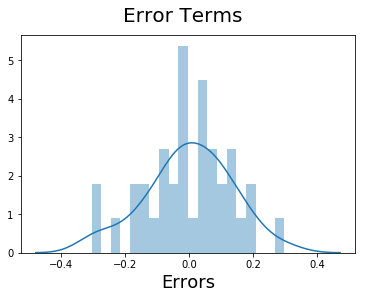

In [402]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_log - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions on Test data

In [403]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_test_log = (np.log(Consumer_Elec_Climate_GamingAccessory_Master_ML_test1)).replace(-np.inf, 0)

Consumer_Elec_Climate_GamingAccessory_Master_ML_test_log.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
25  0.000000 -1.782147  -0.457117 -0.206799         -1.457236        -2.402994                     -1.475191                     -1.721801                  -2.507380                       -1.248734                           -4.343805                                 -1.130660                                -0.993252                          -3.185740                    0.000000                      0.000000                     -0.938982          0.0          -0.189266               -1.757743                    0.0             0.0        0.0       -0.014815          -0.113329         
48 -1.625950 -1.028408  -0.115908 -1.042596         -0.929299        -1.328408                     -0.566432                     -0.576841                  -1.642289                       -0.523944                           -1.293233                                 -0.100089                                -0.081760                          -1.328048                    0.000000                      0.000000                     -2.294697          0.0          -0.165828               -1.878575                    0.0             0.0        0.0       -1.654558          -1.252763         
52 -2.347642 -0.939523  -0.132822 -0.347392         -0.657697        -1.366422                     -0.643420                     -0.637209                  -2.151388                       -0.974844                           -1.245245                                 -0.072857                                -0.040938                          -1.686342                   -0.779799                     -0.779799                     -2.056102          0.0          -0.174448               -1.832088                    0.0             0.0        0.0       -1.821612          -1.029619         
37 -1.001500 -1.383646  -0.172336 -0.690626         -1.208071        -1.148381                     -0.593583                     -0.878371                  -2.602690                       -0.303960                           -1.704748                                 -0.400838                                -0.387116                          -2.074858                    0.000000                      0.000000                     -1.830980          0.0          -0.253970               -1.494839                    0.0             0.0        0.0       -0.249216          -0.113329         
6  -7.165748 -0.611532  -0.287587 -1.427363         -0.573521        -0.846022                     -1.345690                     -1.289668                  -2.101914                       -2.059196                           -1.778856                                 -0.205216                                -0.131769                          -2.530333                    0.000000                      0.000000                     -0.972319          0.0          -0.195409               -1.728772                    0.0             0.0        0.0       -0.723000           0.000000

In [404]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_test_log = Consumer_Elec_Climate_GamingAccessory_Master_ML_test_log.fillna(0)

In [405]:
#Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log[columns] = scaler.transform(Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log[columns])
X_test = Consumer_Elec_Climate_GamingAccessory_Master_ML_test_log[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = Consumer_Elec_Climate_GamingAccessory_Master_ML_test1['gmv_sum']

In [406]:
X_test_sm.head()

const  product_mrp_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  COD_Payment_Percentage  Min Temp (°C)_min
25  1.0   -0.206799         -4.343805                                 -0.993252                           0.000000                     -0.938982         -0.189266               -0.113329         
48  1.0   -1.042596         -1.293233                                 -0.081760                           0.000000                     -2.294697         -0.165828               -1.252763         
52  1.0   -0.347392         -1.245245                                 -0.040938                          -0.779799                     -2.056102         -0.174448               -1.029619         
37  1.0   -0.690626         -1.704748                                 -0.387116                           0.000000                     -1.830980         -0.253970               -0.113329         
6   1.0   -1.427363         -1.778856                                 -0.131769                           0.000000                     -0.972319         -0.195409                0.000000

In [407]:
y_pred = lr_2.predict(X_test_sm)

Text(0,0.5,'y_pred')

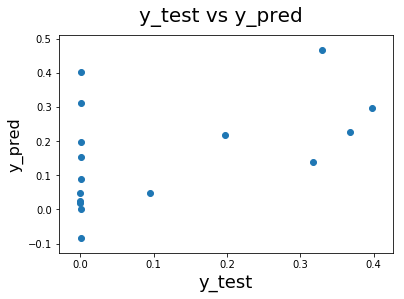

In [408]:
#predicted_train_test_scatter_plot(y_test, y_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [409]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [410]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  0.162165876613186 
R-Squared Score:  -0.14349414238965008


### Multiplicative equation for GamingAccesory category
### GMV_SUM = 0.0932 - 0.2469 * product_mrp_mean + 0.0361 * Weekly_Investment_Content_Marketing_mean - 0.0246 * Weekly_Investment_affiliates_mean + 0.0250 * Weekly_Investment_Other_mean - 0.0083 * Monthly_NPS_mean - 0.0422 * COD_Payment_Percentage + 0.0903 * Min Temp (°C)_min

# Multiplicative Models

## 3) HomeAudio Category

In [411]:
Consumer_Elec_Climate_HomeAudio_Master_ML_train_log = (np.log(Consumer_Elec_Climate_HomeAudio_Master_ML_train1)).replace(-np.inf, 0)

Consumer_Elec_Climate_HomeAudio_Master_ML_train_log.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
25 -1.741708  -1.565223 -1.173700e+00     -1.983338        -0.605789                     -1.475191                     -1.721801                  -2.507380                       -1.248734                           -4.343805                                 -1.130660                                -0.993252                          -3.185740                    0.000000                      0.000000                     -0.938982          0.0          -0.021854               -3.834265                    0.0             0.0        0.0       -0.014815          -0.165514         
26 -4.676656   0.000000 -2.220446e-16     -4.603593         0.000000                     -2.623906                     -3.723281                  -1.769781                       -2.578496                            0.000000                                 -3.031619                                -2.785011                          -2.456225                    0.000000                      0.000000                     -0.424883          0.0          -3.517743               -0.030115                    0.0             0.0        0.0       -0.230524          -0.293348         
35 -0.630460  -0.554243  0.000000e+00     -1.051526        -0.539529                     -0.593583                     -0.878371                  -2.602690                       -0.303960                           -1.704748                                 -0.400838                                -0.387116                          -2.074858                    0.000000                      0.000000                     -1.830980          0.0          -0.079278               -2.574170                    0.0             0.0        0.0       -0.287682          -0.107246         
17 -0.786931  -0.938331 -1.545574e+00     -1.085537        -0.665671                     -0.815987                     -1.931521                  -3.652512                       -1.005163                           -1.453434                                 -0.030134                                -0.083650                          -1.896610                   -0.916291                     -1.690727                     -1.682560          0.0          -0.057028               -2.892595                    0.0             0.0        0.0       -0.458308          -0.643550         
7  -0.485448  -0.741986 -1.024415e+00     -0.707514        -0.607327                     -1.345690                     -1.289668                  -2.101914                       -2.059196                           -1.778856                                 -0.205216                                -0.131769                          -2.530333                    0.000000                      0.000000                     -0.972319          0.0          -0.028019               -3.588853                    0.0             0.0        0.0        0.000000          -1.244324

In [412]:
X_train_log = Consumer_Elec_Climate_HomeAudio_Master_ML_train_log

In [413]:
y_train_log = y_Consumer_Elec_Climate_HomeAudio_Master_ML_train

In [414]:
# Build first fitted model

X = X_train_log
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()



In [415]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     3.790
Date:                Sun, 15 Sep 2019   Prob (F-statistic):            0.00695
Time:                        08:29:03   Log-Likelihood:                 26.475
No. Observations:                  35   AIC:                            -10.95
Df Residuals:                      14   BIC:                             21.71
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [416]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
10  Weekly_Investment_Online_Marketing_mean   42441.28
11  Weekly_Investment_affiliates_mean         40598.65
5   Weekly_Investment_Total_mean              666.81  
6   Weekly_Investment_TV_mean                 475.79  
3   product_mrp_sum                           370.62  
13  Weekly_Investment_Radio_mean              268.41  
14  Weekly_Investment_Other_mean              250.19  
0   units_sum                                 237.28  
12  Weekly_Investment_SEM_mean                179.52  
8   Weekly_Investment_Sponsorship_mean        147.16  
9   Weekly_Investment_Content_Marketing_mean  124.17  
1   sla_mean                                  32.07   
23  Min Temp (°C)_min                         31.49   
22  Max Temp (°C)_max                         22.94   
2   product_mrp_mean                          15.46   
18  Prepaid_Payment_Percentage                15.06   
7   Weekly_Investment_Digital_mean            14.43   
17  COD_Payment_Percentage                    12.66   
4   product_procurement_sla_mean              11.43   
15  Monthly_NPS_mean                          9.85    
16  Pay_Day_Flag                             NaN      
19  Sale_Week_Flag                           NaN      
20  Rain_Flag                                NaN      
21  Snow_Flag                                NaN

### Extremly high VIF Values and high P Values indicate there are insignificant and corelated variables which need to be eliminated first.

In [417]:
# Dropping highly correlated variables and insignificant variables
#X = X.drop('gmv_sum', 1,) # Removing due to high VIF(54199.13) indicating highly correlated & high P Value (0.512) indicating insignificance

#Iteration 1
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,) # Removing due to high VIF(54199.13) indicating highly correlated & high P Value (0.512) indicating insignificance
#Iteration 2
X = X.drop('Rain_Flag', 1,)#Removing as NAN for log values
#Iteration 12
X = X.drop('Snow_Flag', 1,) #Removing as NAN for log values
#Iteration 13
X = X.drop('Sale_Week_Flag', 1,)#Removing as NAN for log values
#Iteration 4
X = X.drop('Weekly_Investment_TV_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 3
X = X.drop('product_mrp_sum', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 6
X = X.drop('sla_mean', 1,)#Removing as high P Value (0.611) indicating insignificance and high VIF (9.15) indicating highly correlated
#Iteration 4
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 5
X = X.drop('Weekly_Investment_Total_mean', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 16
X = X.drop('Max Temp (°C)_max', 1,) #Removing as high P Value (0.477) indicating insignificance and high VIF (17.44) indicating highly correlated
#Iteration 7
X = X.drop('Prepaid_Payment_Percentage', 1,) #Removing due to extremly high VIF(6697.23) value indicating high correlation
#Iteration 8
X = X.drop('Weekly_Investment_Radio_mean', 1,)#Removing as high P Value (0.922) indicating insignificance and high VIF (14.61) indicating highly correlated
#Iteration 15
X = X.drop('Pay_Day_Flag', 1,)#Removing as high VIF (21.68) indicating highly correlated

#Iteration 20
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high VIF (2.61) indicating highly correlated
#Iteration 6
X = X.drop('product_mrp_mean', 1,)#Removing as high P Value (0.611) indicating insignificance and high VIF (9.15) indicating highly correlated

#Ignoring below iterations as R2 dips below 60

#Iteration 9
#X = X.drop('Weekly_Investment_Digital_mean', 1,)#Removing as high P Value (0.719) indicating insignificance and high VIF (19.37) indicating highly correlated
#Iteration 14
#X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance (0.14)

#Iteration 10
#X = X.drop('Weekly_Investment_Radio_mean', 1,) #Removing as high P Value indicating insignificance
#Iteration 11
#Iteration 14
#X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance (0.14)
#Iteration 17
#X = X.drop('Weekly_Investment_Other_mean', 1,)#Removing as high P Value (0.497) indicating insignificance and high VIF (2.38) indicating highly correlated




#Iteration 18
#X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance and high VIF (3.52) indicating highly correlated
#Iteration 19
#X = X.drop('product_mrp_sum', 1,)#Removing as high P Value indicating insignificance and high VIF indicating highly correlated

In [418]:
# second iteration for fitted model

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()



In [419]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     4.365
Date:                Sun, 15 Sep 2019   Prob (F-statistic):            0.00166
Time:                        08:29:05   Log-Likelihood:                 10.480
No. Observations:                  35   AIC:                           -0.9596
Df Residuals:                      25   BIC:                             14.59
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [420]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4  Weekly_Investment_SEM_mean         8.22
0  units_sum                          6.01
8  Min Temp (°C)_min                  5.51
1  product_procurement_sla_mean       4.40
6  Monthly_NPS_mean                   3.67
7  COD_Payment_Percentage             3.20
3  Weekly_Investment_affiliates_mean  2.78
2  Weekly_Investment_Digital_mean     2.48
5  Weekly_Investment_Other_mean       1.27

### Residual Analysis of the train data

In [421]:
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

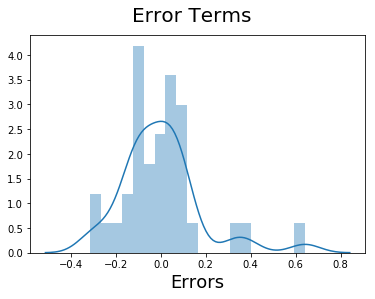

In [422]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_log - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions on Test data

In [423]:
Consumer_Elec_Climate_HomeAudio_Master_ML_test_log = (np.log(Consumer_Elec_Climate_HomeAudio_Master_ML_test1)).replace(-np.inf, 0)

Consumer_Elec_Climate_HomeAudio_Master_ML_test_log.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
6  -8.060968 -0.211337  -1.002997 -0.398178         -0.292126        -0.793532                     -1.345690e+00                 -1.289668                  -2.101914e+00                   -2.059196e+00                       -1.778856e+00                             -2.052162e-01                            -0.131769                          -2.530333e+00                0.0                           0.0                          -0.972319          0.0          -0.047248               -3.075871                    0.0             0.0        0.0       -0.723000           0.000000         
36 -0.606489 -0.681046  -0.540260 -2.504061         -1.051645        -0.676628                     -2.135347e-01                 -0.586964                  -5.070019e-01                   -1.194377e-01                       -4.329752e-01                             -1.529698e-01                            -0.185804                          -4.709339e-01                0.0                           0.0                          -2.676073          0.0          -0.079705               -2.569007                    0.0             0.0        0.0       -0.287682          -0.388658         
37 -0.774934 -0.810811  -0.660219 -3.386071         -1.214780        -0.571259                      9.325873e-15                 -0.412738                  -7.882583e-15                    4.440892e-16                        1.554312e-15                             -6.661338e-16                            -0.057158                          -1.110223e-15                0.0                           0.0                          -30.062239         0.0          -0.054310               -2.940083                    0.0             0.0        0.0       -0.435318          -0.293348         
28 -0.372912 -0.556993  -0.426257 -1.409678         -0.837195        -0.512836                     -2.623906e+00                 -3.723281                  -1.769781e+00                   -2.578496e+00                        0.000000e+00                             -3.031619e+00                            -2.785011                          -2.456225e+00                0.0                           0.0                          -0.424883          0.0          -0.103389               -2.320509                    0.0             0.0        0.0       -0.060625          -0.248896         
43 -0.659378 -0.815656  -0.686961 -1.089319         -1.047129        -0.656370                     -1.274954e+00                 -0.789424                  -2.708050e+00                   -1.853933e+00                       -2.957511e+00                             -2.212900e-01                            -0.110863                          -2.387233e+00                0.0                           0.0                          -1.791759          0.0          -0.031642               -3.469043                    0.0             0.0        0.0       -0.818310          -1.304949

In [424]:
Consumer_Elec_Climate_HomeAudio_Master_ML_test_log = Consumer_Elec_Climate_HomeAudio_Master_ML_test_log.fillna(0)

In [425]:
#Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log[columns] = scaler.transform(Consumer_Elec_Climate_CameraAccessory_Master_ML_test_Log[columns])
X_test = Consumer_Elec_Climate_HomeAudio_Master_ML_test_log[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = Consumer_Elec_Climate_HomeAudio_Master_ML_test1['gmv_sum']

In [426]:
X_test_sm.head()

const  units_sum  product_procurement_sla_mean  Weekly_Investment_Digital_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  COD_Payment_Percentage  Min Temp (°C)_min
6   1.0   -0.211337  -0.793532                     -2.101914e+00                   -0.131769                          -2.530333e+00                0.0                          -0.972319         -0.047248                0.000000         
36  1.0   -0.681046  -0.676628                     -5.070019e-01                   -0.185804                          -4.709339e-01                0.0                          -2.676073         -0.079705               -0.388658         
37  1.0   -0.810811  -0.571259                     -7.882583e-15                   -0.057158                          -1.110223e-15                0.0                          -30.062239        -0.054310               -0.293348         
28  1.0   -0.556993  -0.512836                     -1.769781e+00                   -2.785011                          -2.456225e+00                0.0                          -0.424883         -0.103389               -0.248896         
43  1.0   -0.815656  -0.656370                     -2.708050e+00                   -0.110863                          -2.387233e+00                0.0                          -1.791759         -0.031642               -1.304949

In [427]:
y_pred = lr_2.predict(X_test_sm)

Text(0,0.5,'y_pred')

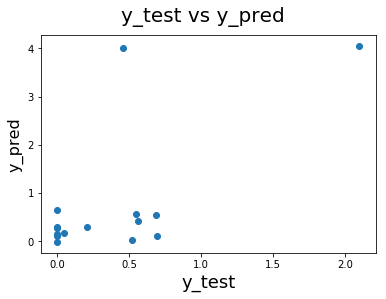

In [428]:
#predicted_train_test_scatter_plot(y_test, y_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [429]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [430]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  1.0829926050486431 
R-Squared Score:  -3.1432630291481995


### Multiplicative equation for GamingAccesory category
### GMV_SUM = 0.6581 + 0.2226 * units_sum + 0.2742 * product_procurement_sla_mean - 0.0072 * Weekly_Investment_Digital_mean - 0.1403 * Weekly_Investment_affiliates_mean + 0.1123 * Weekly_Investment_SEM_mean + 0.0669 * Weekly_Investment_Other_mean - 0.1239 * Monthly_NPS_mean - 0.0732 * COD_Payment_Percentage + 0.199 * Min Temp (°C)_min

# Kyock Model

## 1) Camera Accessory

In [440]:
#df['lagprice'] = df['price'].shift(1)


## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [1054]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Consumer_Elec_Climate_CameraAccessory_Master_ML_train, Consumer_Elec_Climate_CameraAccessory_Master_ML_test = train_test_split(Consumer_Elec_Climate_CameraAccessory_Master_ML, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
For ease of Model eavaluation and bringing units of all the variables to a comparable Scale,we will use Rescale. We are using the Min-Max scaling of skLearn

In [1055]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train, scaler = scale_feature(Consumer_Elec_Climate_CameraAccessory_Master_ML_train)
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
40  1.000000  1.000000   0.743812  0.314747          1.000000         0.892009                      1.000000                      0.653474                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.940794                           1.000000                    0.0                           0.000000                      9.734435e-13      1.0           0.893389                0.106611                    1.0             1          0          0.691176           0.559322         
44  0.398953  0.232823   0.834471  0.486041          0.256127         0.660016                      0.223168                      0.440609                   0.066667                        0.124092                            0.051948                                  0.791434                                 0.888166                           0.052716                    0.0                           0.000000                      2.547596e-01      1.0           0.936795                0.063205                    1.0             1          0          0.470588           0.355932         
37  0.348415  0.144841   0.712223  1.000000          0.211167         1.000000                      0.517383                      0.401006                   0.074074                        0.727781                            0.181818                                  0.653040                                 0.657918                           0.087859                    0.0                           0.000000                      2.449612e-01      0.0           0.891246                0.108754                    0.0             0          0          0.750000           0.898305         
17  0.000000  0.486474   0.459209  0.403372          0.508717         0.035908                      0.398639                      0.123785                   0.025926                        0.341532                            0.233766                                  0.968813                                 0.914480                           0.113419                    0.4                           0.184385                      2.841550e-01      0.0           0.986118                0.013882                    0.0             1          0          0.632353           0.525424         
7   0.000241  0.447331   0.660491  0.449753          0.477745         0.000000                      0.202594                      0.257445                   0.122222                        0.093907                            0.168831                                  0.805079                                 0.868430                           0.039936                    0.0                           0.000000                      5.781084e-01      0.0           0.992589                0.007411                    1.0             1          1          0.000000           0.288136

In [1056]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.describe()


gmv_sum  units_sum   sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
count  36.000000  36.000000  36.000000  36.000000         36.000000        36.000000                     36.000000                     36.000000                  36.000000                       36.000000                           36.000000                                 36.000000                                36.000000                          36.000000                   36.000000                     36.000000                     36.000000         36.000000     36.000000               36.000000                   36.000000       36.000000  36.000000  36.000000          36.000000        
mean   0.174516   0.301010   0.661338   0.475398          0.323504         0.407490                      0.386837                      0.427256                   0.190452                        0.364683                            0.212258                                  0.676243                                 0.709015                           0.164229                    0.139048                      0.150123                      0.433423          0.472222      0.832444                0.167556                    0.361111        0.805556   0.111111   0.568627           0.517891         
std    0.222702   0.200345   0.200960   0.247997          0.201841         0.251773                      0.272128                      0.270577                   0.287712                        0.309769                            0.291316                                  0.309538                                 0.311229                           0.297857                    0.289610                      0.306417                      0.296136          0.506309      0.271460                0.271460                    0.487136        0.401386   0.318728   0.284398           0.281972         
min    0.000000   0.000000   0.000000   0.000000          0.000000         0.000000                      0.000000                      0.000000                   0.000000                        0.000000                            0.000000                                  0.000000                                 0.000000                           0.000000                    0.000000                      0.000000                      0.000000          0.000000      0.000000                0.000000                    0.000000        0.000000   0.000000   0.000000           0.000000         
25%    0.000144   0.147714   0.547959   0.312994          0.172632         0.212976                      0.218025                      0.158438                   0.057614                        0.116546                            0.012987                                  0.652484                                 0.657347                           0.023337                    0.000000                      0.000000                      0.248004          0.000000      0.868619                0.029498                    0.000000        1.000000   0.000000   0.345588           0.283898         
50%    0.013265   0.293153   0.699533   0.467897          0.298788         0.420551                      0.373362                      0.448034                   0.081481                        0.259363                            0.108829                                  0.747442                                 0.831958                           0.047873                    0.000000                      0.000000                      0.3

### Add lag variable on Dependent variable for Kyock Model

In [1057]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train['gmv_sum_Lag'] = Consumer_Elec_Climate_CameraAccessory_Master_ML_train['gmv_sum'].shift(1)
Consumer_Elec_Climate_CameraAccessory_Master_ML_test['gmv_sum_Lag'] = Consumer_Elec_Climate_CameraAccessory_Master_ML_test['gmv_sum'].shift(1)

Consumer_Elec_Climate_CameraAccessory_Master_ML_train['gmv_sum_Lag'].fillna(0, inplace=True)
Consumer_Elec_Climate_CameraAccessory_Master_ML_test['gmv_sum_Lag'].fillna(0, inplace=True)

In [1058]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min  gmv_sum_Lag
40  1.000000  1.000000   0.743812  0.314747          1.000000         0.892009                      1.000000                      0.653474                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.940794                           1.000000                    0.0                           0.000000                      9.734435e-13      1.0           0.893389                0.106611                    1.0             1          0          0.691176           0.559322           0.000000   
44  0.398953  0.232823   0.834471  0.486041          0.256127         0.660016                      0.223168                      0.440609                   0.066667                        0.124092                            0.051948                                  0.791434                                 0.888166                           0.052716                    0.0                           0.000000                      2.547596e-01      1.0           0.936795                0.063205                    1.0             1          0          0.470588           0.355932           1.000000   
37  0.348415  0.144841   0.712223  1.000000          0.211167         1.000000                      0.517383                      0.401006                   0.074074                        0.727781                            0.181818                                  0.653040                                 0.657918                           0.087859                    0.0                           0.000000                      2.449612e-01      0.0           0.891246                0.108754                    0.0             0          0          0.750000           0.898305           0.398953   
17  0.000000  0.486474   0.459209  0.403372          0.508717         0.035908                      0.398639                      0.123785                   0.025926                        0.341532                            0.233766                                  0.968813                                 0.914480                           0.113419                    0.4                           0.184385                      2.841550e-01      0.0           0.986118                0.013882                    0.0             1          0          0.632353           0.525424           0.348415   
7   0.000241  0.447331   0.660491  0.449753          0.477745         0.000000                      0.202594                      0.257445                   0.122222                        0.093907                            0.168831                                  0.805079                                 0.868430                           0.039936                    0.0                           0.000000                      5.781084e-01      0.0           0.992589                0.007411                    1.0             1          1          0.000000           0.288136           0.000000

## Splitting the data into Predictor Variable and Outcome Variable and Building a Linear Model
Let's split the data and Fit a regression line through the training data using statsmodels. But first we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [1059]:
X_Consumer_Elec_Climate_CameraAccessory_Master_ML_train, y_Consumer_Elec_Climate_CameraAccessory_Master_ML_train, lr_1, y_train_predict = data_split_and_linear_model(Consumer_Elec_Climate_CameraAccessory_Master_ML_train)

In [1060]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     44.60
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           7.44e-08
Time:                        14:39:39   Log-Likelihood:                 86.082
No. Observations:                  36   AIC:                            -122.2
Df Residuals:                      11   BIC:                            -82.58
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [1061]:
vif = find_vif(X_Consumer_Elec_Climate_CameraAccessory_Master_ML_train)
vif

Features           VIF
12  Weekly_Investment_SEM_mean                4.064621e+11
14  Weekly_Investment_Other_mean              2.762182e+11
5   Weekly_Investment_Total_mean              2.073480e+11
11  Weekly_Investment_affiliates_mean         1.492123e+11
8   Weekly_Investment_Sponsorship_mean        1.370896e+11
13  Weekly_Investment_Radio_mean              1.150051e+11
9   Weekly_Investment_Content_Marketing_mean  6.024802e+10
7   Weekly_Investment_Digital_mean            5.021407e+10
17  COD_Payment_Percentage                    4.219224e+10
6   Weekly_Investment_TV_mean                 3.796965e+10
10  Weekly_Investment_Online_Marketing_mean   2.457485e+10
18  Prepaid_Payment_Percentage                5.502754e+09
15  Monthly_NPS_mean                          4.140000e+09
0   units_sum                                 1.628080e+03
3   product_mrp_sum                           1.551670e+03
23  Min Temp (°C)_min                         3.755000e+01
2   product_mrp_mean                          3.600000e+01
22  Max Temp (°C)_max                         2.779000e+01
4   product_procurement_sla_mean              1.447000e+01
21  Snow_Flag                                 9.070000e+00
1   sla_mean                                  7.560000e+00
20  Rain_Flag                                 7.020000e+00
16  Pay_Day_Flag                              4.740000e+00
24  gmv_sum_Lag                               3.020000e+00
19  Sale_Week_Flag                            2.930000e+00

### Extremly high VIF Values and high P Values indicate there are insignificant and corelated variables which need to be eliminated first.

In [1062]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min  gmv_sum_Lag
40  1.000000   0.743812  0.314747          1.000000         0.892009                      1.000000                      0.653474                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.940794                           1.000000                    0.0                           0.000000                      9.734435e-13      1.0           0.893389                0.106611                    1.0             1          0          0.691176           0.559322           0.000000   
44  0.232823   0.834471  0.486041          0.256127         0.660016                      0.223168                      0.440609                   0.066667                        0.124092                            0.051948                                  0.791434                                 0.888166                           0.052716                    0.0                           0.000000                      2.547596e-01      1.0           0.936795                0.063205                    1.0             1          0          0.470588           0.355932           1.000000   
37  0.144841   0.712223  1.000000          0.211167         1.000000                      0.517383                      0.401006                   0.074074                        0.727781                            0.181818                                  0.653040                                 0.657918                           0.087859                    0.0                           0.000000                      2.449612e-01      0.0           0.891246                0.108754                    0.0             0          0          0.750000           0.898305           0.398953   
17  0.486474   0.459209  0.403372          0.508717         0.035908                      0.398639                      0.123785                   0.025926                        0.341532                            0.233766                                  0.968813                                 0.914480                           0.113419                    0.4                           0.184385                      2.841550e-01      0.0           0.986118                0.013882                    0.0             1          0          0.632353           0.525424           0.348415   
7   0.447331   0.660491  0.449753          0.477745         0.000000                      0.202594                      0.257445                   0.122222                        0.093907                            0.168831                                  0.805079                                 0.868430                           0.039936                    0.0                           0.000000                      5.781084e-01      0.0           0.992589                0.007411                    1.0             1          1          0.000000           0.288136           0.000000

In [1063]:
X_train = Consumer_Elec_Climate_CameraAccessory_Master_ML_train

In [1064]:
y_train = y_Consumer_Elec_Climate_CameraAccessory_Master_ML_train

In [1065]:
# Dropping highly correlated variables and insignificant variables

#Iteration 1
X = X_train.drop('Weekly_Investment_SEM_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 2
X = X.drop('Weekly_Investment_Other_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 3
X = X.drop('Weekly_Investment_Total_mean', 1,) # Removing due to high VIF indicating highly correlated & high P Value
#Iteration 4
X = X.drop('Max Temp (°C)_max', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 5
X = X.drop('Rain_Flag', 1,) #Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 6
X = X.drop('Weekly_Investment_Digital_mean', 1,)#Removing as high P Value (0.611) indicating insignificance and high VIF (9.15) indicating highly correlated
#Iteration 7
X = X.drop('Pay_Day_Flag', 1,) #Removing due to extremly high VIF(6697.23) value indicating high correlation
#Iteration 8
X = X.drop('COD_Payment_Percentage', 1,)#Removing as high P Value (0.922) indicating insignificance and high VIF (14.61) indicating highly correlated
#Iteration 9
X = X.drop('Weekly_Investment_affiliates_mean', 1,)#Removing as high P Value (0.138) indicating insignificance and high VIF (7.37) indicating highly correlated
#Iteration 10
X = X.drop('product_mrp_sum', 1,) #Removing as high P Value indicating insignificance
#Iteration 11
X = X.drop('Snow_Flag', 1,)#Removing as high VIF (11.48) indicating highly correlated
#Iteration 12
X = X.drop('sla_mean', 1,) #Removing as high P Value (0.98) indicating insignificance and high VIF (67.23) indicating highly correlated
#Iteration 13
X = X.drop('product_mrp_mean', 1,)#Removing as high P Value (0.57) indicating insignificance and high VIF (2.24) indicating highly correlated
#Iteration 14
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)#Removing as high P Value (0.191) indicating insignificance (0.14)
#Iteration 15
#X = X.drop('Min Temp (°C)_min', 1,)#Removing as high VIF (21.68) indicating highly correlated
#Iteration 16
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,) #Removing as high P Value (0.477) indicating insignificance and high VIF (17.44) indicating highly correlated
#Iteration 17
X = X.drop('Weekly_Investment_TV_mean', 1,)#Removing as high P Value (0.497) indicating insignificance and high VIF (2.38) indicating highly correlated
#Iteration 18
X = X.drop('Min Temp (°C)_min', 1,)#Removing as high P Value (0.191) indicating insignificance and high VIF (3.52) indicating highly correlated
#Iteration 19
X = X.drop('Prepaid_Payment_Percentage', 1,)#Removing as high P Value indicating insignificance and high VIF indicating highly correlated
#Iteration 20
X = X.drop('gmv_sum_Lag', 1,)#Removing as high VIF (2.61) indicating highly correlated


In [1066]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()



In [1067]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     33.11
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.05e-11
Time:                        14:39:44   Log-Likelihood:                 40.583
No. Observations:                  36   AIC:                            -67.17
Df Residuals:                      29   BIC:                            -56.08
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [1068]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1  product_procurement_sla_mean              3.38
0  units_sum                                 3.05
2  Weekly_Investment_Content_Marketing_mean  2.84
4  Monthly_NPS_mean                          2.75
5  Sale_Week_Flag                            1.66
3  Weekly_Investment_Radio_mean              1.28

### Residual Analysis of the train data

In [1069]:
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

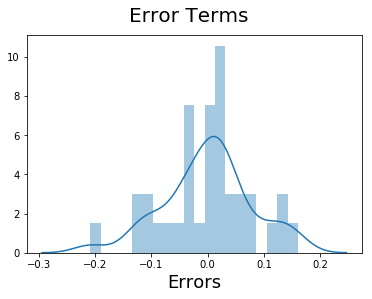

In [1070]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions on Test data

In [1071]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_test.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min  gmv_sum_Lag
6   3138.0     6403.0     6.040680  1396.348482       8787221.0        2.460988                      10.680000                     0.570000                   0.430000                        2.610000                            0.130000                                  4.420000                                 1.440000                           1.08000                     0.0                           0.0                           50.300000         1.0           78.674718               21.325282                   0.0             0          0          17.5              -12.0               0.0        
32  299.0      1.0        6.000000  1990.000000       1990.0           1.000000                      1.130000                      0.000000                   0.280000                        0.240000                            0.000000                                  0.030000                                 0.020000                           0.56000                     0.0                           0.0                           60.000000         1.0           100.000000              0.000000                    1.0             1          0          31.0               14.5               3138.0     
38  2886536.0  4618.0     5.643202  1708.755702       7791926.0        2.394518                      28.548544                     1.082342                   1.389912                        16.073149                           0.414658                                  4.416018                                 1.307465                           3.86936                     0.0                           0.0                           45.810088         1.0           80.109649               19.890351                   0.0             1          0          26.5               8.0                299.0      
35  2700423.0  3402.0     6.381567  1651.740318       5501947.0        2.743320                      21.390000                     0.860000                   0.300000                        13.950000                           0.140000                                  3.640000                                 1.120000                           1.38000                     0.0                           0.0                           46.900000         0.0           70.219153               29.780847                   0.0             1          0          32.5               9.0                2886536.0  
33  905.0      2.0        7.500000  744.500000        1489.0           1.500000                      1.130000                      0.000000                   0.280000                        0.240000                            0.000000                                  0.030000                                 0.020000                           0.56000                     0.0                           0.0                           60.000000         0.0           0.000000                100.000000                  1.0             0          0          29.0               14.0               2700423.0

In [1072]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_test[columns] = scaler.transform(Consumer_Elec_Climate_CameraAccessory_Master_ML_test[columns])
X_test = Consumer_Elec_Climate_CameraAccessory_Master_ML_test[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = Consumer_Elec_Climate_CameraAccessory_Master_ML_test['gmv_sum']

In [1073]:
X_test_sm.head()

const  units_sum  product_procurement_sla_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Radio_mean  Monthly_NPS_mean  Sale_Week_Flag
6   1.0    0.534115   0.415494                      0.168831                                  0.0                           0.578108          0.0           
32  1.0   -0.232224  -1.872324                      0.000000                                  0.0                           1.528558          1.0           
38  1.0    0.320445   0.311405                      0.538517                                  0.0                           0.138167          0.0           
35  1.0    0.174886   0.857609                      0.181818                                  0.0                           0.244961          0.0           
33  1.0   -0.232104  -1.089355                      0.000000                                  0.0                           1.528558          1.0

In [1074]:
y_pred = lr_2.predict(X_test_sm)

Text(0,0.5,'y_pred')

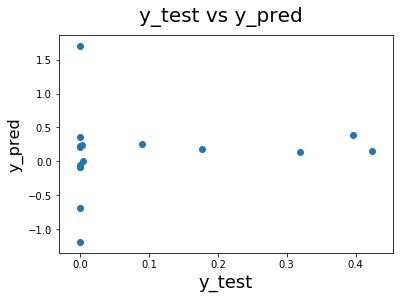

In [1075]:
#predicted_train_test_scatter_plot(y_test, y_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [1076]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [1077]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  0.5699782783868376 
R-Squared Score:  -13.7230832764866


### Linear equation for Camera Accesory category based on Kyock Model
### GMV_SUM = -0.2713 + 0.1686 * units_sum + 0.6382 * product_procurement_sla_mean + 0.2807 * Weekly_Investment_Content_Marketing_mean - 0.1637 * Weekly_Investment_Radio_mean + 0.1344 * Monthly_NPS_mean + 0.1106 * Sale_Week_Flag

# Kyock Model

## 2) Gaming Accessory

## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [1348]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Consumer_Elec_Climate_GamingAccessory_Master_ML_train, Consumer_Elec_Climate_GamingAccessory_Master_ML_test = train_test_split(Consumer_Elec_Climate_GamingAccessory_Master_ML, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
For ease of Model eavaluation and bringing units of all the variables to a comparable Scale,we will use Rescale. We are using the Min-Max scaling of skLearn

In [1349]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_train, scaler = scale_feature(Consumer_Elec_Climate_GamingAccessory_Master_ML_train)
Consumer_Elec_Climate_GamingAccessory_Master_ML_train.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
26  0.005896  0.002652   0.000000  1.000000          0.004177         0.265635                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      6.538462e-01      1             0.000000                1.000000                    0.0             0          0          0.794118           0.785714         
41  1.000000  1.000000   0.719443  0.189240          1.000000         0.471793                      1.000000                      0.661836                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.944444                           1.000000                    0.0                           0.000000                      6.239453e-13      1             0.798180                0.201820                    1.0             1          0          0.691176           0.589286         
28  0.337094  0.267045   0.703997  0.291255          0.282361         0.311052                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      6.538462e-01      1             0.763570                0.236430                    1.0             1          0          0.941176           0.821429         
38  0.379807  0.261648   0.875774  0.555952          0.319565         0.220433                      0.552345                      0.415459                   0.074074                        0.737890                            0.181818                                  0.669759                                 0.679012                           0.125574                    0.0                           0.000000                      1.602564e-01      0             0.797694                0.202306                    0.0             0          0          0.750000           0.946429         
17  0.000000  0.360322   0.844898  0.834845          0.508117         0.241419                      0.442203                      0.144928                   0.025926                        0.365985                            0.233766                                  0.970315                                 0.919753                           0.150077                    0.4                           0.184385                      1.858974e-01      0             0.821314                0.178686                    0.0             1          0          0.632353           0.553571

In [1350]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_train.describe()

gmv_sum  units_sum   sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
count  37.000000  37.000000  37.000000  37.000000         37.000000        37.000000                     37.000000                     37.000000                  37.000000                       37.000000                           37.000000                                 37.000000                                37.000000                          37.000000                   37.000000                     37.000000                     37.000000         37.000000     37.000000               37.000000                   37.000000       37.000000  37.000000  37.000000          37.000000        
mean   0.164097   0.356393   0.793153   0.563455          0.435980         0.296053                      0.422404                      0.422787                   0.204175                        0.381752                            0.218164                                  0.658349                                 0.689071                           0.206859                    0.136038                      0.147406                      0.312985          0.432432      0.711326                0.288674                    0.324324        0.756757   0.108108   0.590620           0.555502         
std    0.225611   0.169750   0.161307   0.237340          0.194148         0.180364                      0.271101                      0.281040                   0.289187                        0.309627                            0.297813                                  0.329519                                 0.328471                           0.290492                    0.286604                      0.304071                      0.232675          0.502247      0.254873                0.254873                    0.474579        0.434959   0.314800   0.278475           0.285149         
min    0.000000   0.000000   0.000000   0.000000          0.000000         0.000000                      0.000000                      0.000000                   0.000000                        0.000000                            0.000000                                  0.000000                                 0.000000                           0.000000                    0.000000                      0.000000                      0.000000          0.000000      0.000000                0.000000                    0.000000        0.000000   0.000000   0.000000           0.000000         
25%    0.000044   0.262500   0.760346   0.375705          0.319565         0.220433                      0.260360                      0.178744                   0.065702                        0.127557                            0.012987                                  0.506726                                 0.526410                           0.058193                    0.000000                      0.000000                      0.160256          0.000000      0.773338                0.176708                    0.000000        1.000000   0.000000   0.426471           0.339286         
50%    0.000574   0.351231   0.828846   0.557994          0.429136         0.306736                      0.418757                      0.468599                   0.091790                        0.286868                            0.103896                                  0.755102                                 0.839506                           0.085758                    0.000000                      0.000000                      0.2

### Add lag variable on Dependent variable for Kyock Model

In [1351]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_train['gmv_sum_Lag'] = Consumer_Elec_Climate_GamingAccessory_Master_ML_train['gmv_sum'].shift(1)
Consumer_Elec_Climate_GamingAccessory_Master_ML_test['gmv_sum_Lag'] = Consumer_Elec_Climate_GamingAccessory_Master_ML_test['gmv_sum'].shift(1)

Consumer_Elec_Climate_GamingAccessory_Master_ML_train['gmv_sum_Lag'].fillna(0, inplace=True)
Consumer_Elec_Climate_GamingAccessory_Master_ML_test['gmv_sum_Lag'].fillna(0, inplace=True)

In [1352]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min  gmv_sum_Lag
40  1.000000   0.743812  0.314747          1.000000         0.892009                      1.000000                      0.653474                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.940794                           1.000000                    0.0                           0.000000                      9.734435e-13      1.0           0.893389                0.106611                    1.0             1          0          0.691176           0.559322           0.000000   
44  0.232823   0.834471  0.486041          0.256127         0.660016                      0.223168                      0.440609                   0.066667                        0.124092                            0.051948                                  0.791434                                 0.888166                           0.052716                    0.0                           0.000000                      2.547596e-01      1.0           0.936795                0.063205                    1.0             1          0          0.470588           0.355932           1.000000   
37  0.144841   0.712223  1.000000          0.211167         1.000000                      0.517383                      0.401006                   0.074074                        0.727781                            0.181818                                  0.653040                                 0.657918                           0.087859                    0.0                           0.000000                      2.449612e-01      0.0           0.891246                0.108754                    0.0             0          0          0.750000           0.898305           0.398953   
17  0.486474   0.459209  0.403372          0.508717         0.035908                      0.398639                      0.123785                   0.025926                        0.341532                            0.233766                                  0.968813                                 0.914480                           0.113419                    0.4                           0.184385                      2.841550e-01      0.0           0.986118                0.013882                    0.0             1          0          0.632353           0.525424           0.348415   
7   0.447331   0.660491  0.449753          0.477745         0.000000                      0.202594                      0.257445                   0.122222                        0.093907                            0.168831                                  0.805079                                 0.868430                           0.039936                    0.0                           0.000000                      5.781084e-01      0.0           0.992589                0.007411                    1.0             1          1          0.000000           0.288136           0.000000

## Splitting the data into Predictor Variable and Outcome Variable and Building a Linear Model
Let's split the data and Fit a regression line through the training data using statsmodels. But first we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [1353]:
X_Consumer_Elec_Climate_GamingAccessory_Master_ML_train, y_Consumer_Elec_Climate_GamingAccessory_Master_ML_train, lr_1, y_train_predict = data_split_and_linear_model(Consumer_Elec_Climate_GamingAccessory_Master_ML_train)

In [1354]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     28.68
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           2.66e-07
Time:                        15:27:19   Log-Likelihood:                 78.331
No. Observations:                  37   AIC:                            -106.7
Df Residuals:                      12   BIC:                            -66.39
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [1355]:
vif = find_vif(X_Consumer_Elec_Climate_GamingAccessory_Master_ML_train)
vif

Features          VIF
5   Weekly_Investment_Total_mean              44163261.77
12  Weekly_Investment_SEM_mean                38314124.02
14  Weekly_Investment_Other_mean              25601708.21
8   Weekly_Investment_Sponsorship_mean        22208850.17
11  Weekly_Investment_affiliates_mean         16164257.51
13  Weekly_Investment_Radio_mean              9085492.87 
9   Weekly_Investment_Content_Marketing_mean  5078996.26 
17  COD_Payment_Percentage                    3774305.59 
7   Weekly_Investment_Digital_mean            3574475.42 
6   Weekly_Investment_TV_mean                 3222573.94 
10  Weekly_Investment_Online_Marketing_mean   1807729.55 
18  Prepaid_Payment_Percentage                961824.80  
15  Monthly_NPS_mean                          479130.70  
3   product_mrp_sum                           192.90     
0   units_sum                                 171.50     
2   product_mrp_mean                          32.27      
22  Max Temp (°C)_max                         28.34      
23  Min Temp (°C)_min                         27.34      
1   sla_mean                                  27.27      
4   product_procurement_sla_mean              7.45       
21  Snow_Flag                                 4.11       
20  Rain_Flag                                 4.02       
24  gmv_sum_Lag                               3.00       
19  Sale_Week_Flag                            2.55       
16  Pay_Day_Flag                              2.48

### Extremly high VIF Values and high P Values indicate there are insignificant and corelated variables which need to be eliminated first.

In [1356]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_train.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min  gmv_sum_Lag
26  0.002652   0.000000  1.000000          0.004177         0.265635                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      6.538462e-01      1             0.000000                1.000000                    0.0             0          0          0.794118           0.785714           0.000000   
41  1.000000   0.719443  0.189240          1.000000         0.471793                      1.000000                      0.661836                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.944444                           1.000000                    0.0                           0.000000                      6.239453e-13      1             0.798180                0.201820                    1.0             1          0          0.691176           0.589286           0.005896   
28  0.267045   0.703997  0.291255          0.282361         0.311052                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      6.538462e-01      1             0.763570                0.236430                    1.0             1          0          0.941176           0.821429           1.000000   
38  0.261648   0.875774  0.555952          0.319565         0.220433                      0.552345                      0.415459                   0.074074                        0.737890                            0.181818                                  0.669759                                 0.679012                           0.125574                    0.0                           0.000000                      1.602564e-01      0             0.797694                0.202306                    0.0             0          0          0.750000           0.946429           0.337094   
17  0.360322   0.844898  0.834845          0.508117         0.241419                      0.442203                      0.144928                   0.025926                        0.365985                            0.233766                                  0.970315                                 0.919753                           0.150077                    0.4                           0.184385                      1.858974e-01      0             0.821314                0.178686                    0.0             1          0          0.632353           0.553571           0.379807

In [1357]:
X_train = Consumer_Elec_Climate_GamingAccessory_Master_ML_train

In [1358]:
y_train = y_Consumer_Elec_Climate_GamingAccessory_Master_ML_train

In [1359]:
# Dropping highly correlated variables and insignificant variables

#Iteration 1
X = X_train.drop('Rain_Flag', 1,) # Removing due to high VIF (7636409.64) indicating highly correlated & high P Value (0.661) indicating insignificance
#Iteration 2
X = X.drop('Max Temp (°C)_max', 1,) #Removing due to extremly high VIF (4633218.68) indicating highly correlated
#Iteration 3
X = X.drop('Weekly_Investment_Digital_mean', 1,) #Removing due to high VIF (2.84) indicating highly correlated & high P Value (0.314) indicating insignificance
#Iteration 4
X = X.drop('Weekly_Investment_Total_mean', 1,) #Removing due to high P Value (0.544) indicating insignificance
#Iteration 5
X = X.drop('product_mrp_mean', 1,) #Removing due to high VIF (5.67) indicating highly correlated
#Iteration 6
X = X.drop('Weekly_Investment_affiliates_mean', 1,) #Removing due to high VIF (6017.39) indicating highly correlated & high P Value (0.911) indicating insignificance
#Iteration 7
X = X.drop('Weekly_Investment_TV_mean', 1,) #Removing due to high VIF (44.23) indicating highly correlated & high P Value (0.722) indicating insignificance
#Iteration 4
X = X.drop('COD_Payment_Percentage', 1,)#Removing due to high VIF (554.06) indicating highly correlated & high P Value (0.671) indicating insignificance
#Iteration 6
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,) #Removing due to high VIF (225.43) indicating highly correlated 
#Iteration 7
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,) #Removing due to high VIF (23.3) indicating highly correlated
#Iteration 8
X = X.drop('product_mrp_sum', 1,) #Removing due to high VIF (10.64) indicating highly correlated & high P Value (0.693) indicating insignificance
#Iteration 9
X = X.drop('Pay_Day_Flag', 1,) #Removing due to high VIF (7.67) indicating highly correlated & high P Value (0.462) indicating insignificance
#Iteration 10
X = X.drop('sla_mean', 1,) #Removing due to high VIF (55.47) indicating highly correlated & high P Value (0.347) indicating insignificance
#Iteration 11
X = X.drop('Snow_Flag', 1,) #Removing due to high P Value (0.788) indicating insignificance
#Iteration 12
X = X.drop('Weekly_Investment_Radio_mean', 1,) #Removing due to high VIF (5.04) indicating highly correlated & high P Value (0.381) indicating insignificance
#Iteration 13
X = X.drop('Min Temp (°C)_min', 1,) #Removing due to high VIF (5.45) indicating highly correlated & high P Value (0.904) indicating insignificance
#Iteration 14
X = X.drop('gmv_sum_Lag', 1,) #Removing due to high VIF (6017.39) indicating highly correlated & high P Value (0.911) indicating insignificance
#Iteration 15
X = X.drop('Prepaid_Payment_Percentage', 1,)  #Removing due to  high P Value (0.419) indicating insignificance

#Iteration 16
#X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,) #Removing due to high VIF (188.82) indicating highly correlated & high P Value (0.523) indicating insignificance

#Bypassing below Iteration as this results in R2 value dipping below 60
#Iteration 17
#X = X.drop('units_sum', 1,) #Removing due to high VIF (41.13) indicating highly correlated

#Iteration 18
# X = X.drop('Weekly_Investment_affiliates_mean', 1,) #Removing due to high VIF (2.91) indicating highly correlated


In [1360]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()



In [1361]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     9.449
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           4.56e-06
Time:                        15:27:23   Log-Likelihood:                 25.076
No. Observations:                  37   AIC:                            -34.15
Df Residuals:                      29   BIC:                            -21.27
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [1362]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2  Weekly_Investment_Online_Marketing_mean  9.68
0  units_sum                                8.15
1  product_procurement_sla_mean             5.04
5  Monthly_NPS_mean                         3.55
3  Weekly_Investment_SEM_mean               2.67
4  Weekly_Investment_Other_mean             1.93
6  Sale_Week_Flag                           1.90

### Making Predictions on Train data

In [1363]:
y_train_pred.head()

26    0.040610
41    0.988906
28    0.342820
38    0.268866
17    0.038102
dtype: float64

### Residual Analysis of the train data

In [1364]:
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

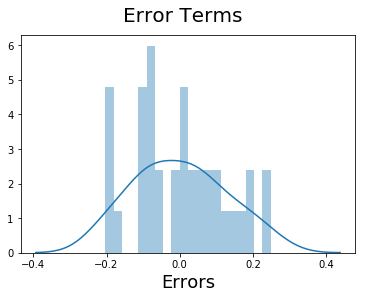

In [1365]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions on Test data

In [1366]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_test.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min   gmv_sum_Lag
25  0.000000e+00  1781       5.011534  1631.151096       2828416          2.141292                      9.520000                      0.370000                   0.320000                        5.570000                            0.010000                                  1.770000                                 0.620000                           0.830000                    0.000000                      0.000000                      50.500000         0             82.756632               17.243368                   0.0             1          0          34.5               13.0               0.000000e+00
48  1.285356e+06  3780       5.973812  1293.873380       4792507          2.353942                      21.947624                     1.162657                   0.622549                        11.242711                           0.211274                                  4.906641                                 1.512819                           2.290410                    0.000000                      0.000000                      45.972354         1             84.719222               15.280778                   0.0             1          0          7.5               -4.0                0.000000e+00
52  6.245920e+05  4131       5.917984  1553.059536       6286785          2.341897                      20.405059                     1.094545                   0.414071                        7.249328                            0.221660                                  5.041265                                 1.575020                           1.769328                    0.275099                      2.760158                      46.396047         1             83.992095               16.007905                   1.0             0          0          6.5               -2.0                1.285356e+06
37  2.400039e+06  2651       5.791183  1402.766821       3627555          2.417633                      21.390000                     0.860000                   0.300000                        13.950000                           0.140000                                  3.640000                                 1.120000                           1.380000                    0.000000                      0.000000                      46.900000         1             77.571539               22.428461                   0.0             1          0          27.5               13.0               6.245920e+05
6   5.048000e+03  5733       5.448716  1211.431178       6838529          2.554119                      10.680000                     0.570000                   0.430000                        2.610000                            0.130000                                  4.420000                                 1.440000                           1.080000                    0.000000                      0.000000                      50.300000         1             82.249779               17.750221                   0.0             0          0          17.5              -12.0               2.400039e+06

In [1367]:
Consumer_Elec_Climate_GamingAccessory_Master_ML_test[columns] = scaler.transform(Consumer_Elec_Climate_GamingAccessory_Master_ML_test[columns])
X_test = Consumer_Elec_Climate_GamingAccessory_Master_ML_test[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = Consumer_Elec_Climate_CameraAccessory_Master_ML_test['gmv_sum']

In [1368]:
X_test_sm.head()

const  units_sum  product_procurement_sla_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Sale_Week_Flag
25  1.0    0.168277   0.090447                      0.322820                                 0.041348                    0.000000                      0.391026          0.0           
48  1.0    0.357576   0.264899                      0.904757                                 0.264994                    0.000000                      0.100792          0.0           
52  1.0    0.390814   0.255018                      0.929734                                 0.185196                    0.458498                      0.127952          1.0           
37  1.0    0.250663   0.317150                      0.669759                                 0.125574                    0.000000                      0.160256          0.0           
6   1.0    0.542519   0.429118                      0.814471                                 0.079632                    0.000000                      0.378205          0.0

In [1369]:
y_pred = lr_2.predict(X_test_sm)

Text(0,0.5,'y_pred')

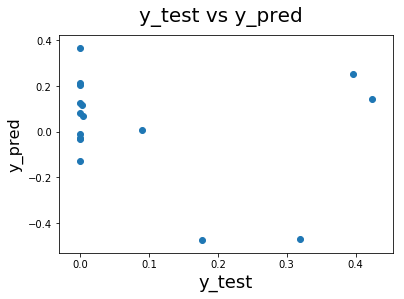

In [1370]:
#predicted_train_test_scatter_plot(y_test, y_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [1371]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [1372]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  0.2995276589056854 
R-Squared Score:  -3.065893720140788


### Linear Equation for Gaming accessory category
### GMV_SUM = 0.5982 + 0.3535 * units_sum + 0.3624 * product_procurement_sla_mean - 0.6503 * Weekly_Investment_Online_Marketing_mean + 0.2923 * Weekly_Investment_SEM_mean - 0.2033 * Weekly_Investment_Other_mean - 0.9428 * Monthly_NPS_mean + 0.0781 * Sale_Week_Flag

# Kyock Model

## 3) Home Audio

## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [1557]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Consumer_Elec_Climate_HomeAudio_Master_ML_train, Consumer_Elec_Climate_HomeAudio_Master_ML_test = train_test_split(Consumer_Elec_Climate_HomeAudio_Master_ML, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
For ease of Model eavaluation and bringing units of all the variables to a comparable Scale,we will use Rescale. We are using the Min-Max scaling of skLearn

In [1558]:
Consumer_Elec_Climate_HomeAudio_Master_ML_train, scaler = scale_feature(Consumer_Elec_Climate_HomeAudio_Master_ML_train)
Consumer_Elec_Climate_HomeAudio_Master_ML_train.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
25  0.009540  0.175221   0.209041  0.309221          0.137609         0.545644                      0.228735                      0.178744                   0.081481                        0.286868                            0.012987                                  0.322820                                 0.370370                           0.041348                    0.0                           0.000000                      0.391026          0.0           0.978383                0.021617                    0.0             1          0          0.985294           0.847458         
26  0.015592  0.009310   0.000000  1.000000          0.010016         1.000000                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      0.653846          1.0           0.029666                0.970334                    0.0             0          0          0.794118           0.745763         
35  0.543370  0.532347   0.574507  0.000000          0.349404         0.583023                      0.552345                      0.415459                   0.074074                        0.737890                            0.181818                                  0.669759                                 0.679012                           0.125574                    0.0                           0.000000                      0.160256          0.0           0.923783                0.076217                    0.0             0          0          0.750000           0.898305         
17  0.000284  0.455240   0.391280  0.213190          0.337721         0.513928                      0.442203                      0.144928                   0.025926                        0.365985                            0.233766                                  0.970315                                 0.919753                           0.150077                    0.4                           0.184385                      0.185897          0.0           0.944568                0.055432                    0.0             1          0          0.632353           0.525424         
7   0.000685  0.615421   0.476167  0.359006          0.492868         0.544805                      0.260360                      0.275362                   0.122222                        0.127557                            0.168831                                  0.814471                                 0.876543                           0.079632                    0.0                           0.000000                      0.378205          0.0           0.972370                0.027630                    1.0             1          1          0.000000           0.288136

In [1559]:
Consumer_Elec_Climate_HomeAudio_Master_ML_train.describe()

gmv_sum  units_sum   sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min
count  35.000000  35.000000  35.000000  35.000000         35.000000        35.000000                     35.000000                     35.000000                  35.000000                       35.000000                           35.000000                                 35.000000                                35.000000                          35.000000                   35.000000                     35.000000                     35.000000         35.00000      35.000000               35.000000                   35.000000       35.00000   35.000000  35.000000          35.000000        
mean   0.204487   0.503305   0.461389   0.352406          0.408811         0.566838                      0.386672                      0.409764                   0.141590                        0.348288                            0.160776                                  0.640887                                 0.678597                           0.146330                    0.143622                      0.155929                      0.326074          0.40000       0.794714                0.205286                    0.285714        0.80000    0.114286   0.587395           0.536077         
std    0.291813   0.217631   0.168665   0.260105          0.216795         0.145526                      0.225285                      0.277059                   0.209518                        0.267853                            0.222336                                  0.314977                                 0.318283                           0.210824                    0.293001                      0.310864                      0.216977          0.49705       0.326842                0.326842                    0.458349        0.40584    0.322803   0.287223           0.292994         
min    0.000000   0.000000   0.000000   0.000000          0.000000         0.000000                      0.000000                      0.000000                   0.000000                        0.000000                            0.000000                                  0.000000                                 0.000000                           0.000000                    0.000000                      0.000000                      0.000000          0.00000       0.000000                0.000000                    0.000000        0.00000    0.000000   0.000000           0.000000         
25%    0.000281   0.406780   0.368894   0.162319          0.299622         0.543583                      0.244547                      0.178744                   0.050000                        0.127557                            0.012987                                  0.406109                                 0.441039                           0.058193                    0.000000                      0.000000                      0.166667          0.00000       0.897975                0.031080                    0.000000        1.00000    0.000000   0.389706           0.305085         
50%    0.015592   0.479112   0.458047   0.233528          0.345736         0.583023                      0.324044                      0.454106                   0.081481                        0.286868                            0.103896                                  0.721976                                 0.811311                           0.085758                    0.000000                      0.000000                      0.3

## Splitting the data into Predictor Variable and Outcome Variable and Building a Linear Model
Let's split the data and Fit a regression line through the training data using statsmodels. But first we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

### Add lag variable on Dependent variable for Kyock Model

In [1560]:
Consumer_Elec_Climate_HomeAudio_Master_ML_train['gmv_sum_Lag'] = Consumer_Elec_Climate_HomeAudio_Master_ML_train['gmv_sum'].shift(1)
Consumer_Elec_Climate_HomeAudio_Master_ML_test['gmv_sum_Lag'] = Consumer_Elec_Climate_HomeAudio_Master_ML_test['gmv_sum'].shift(1)

Consumer_Elec_Climate_HomeAudio_Master_ML_train['gmv_sum_Lag'].fillna(0, inplace=True)
Consumer_Elec_Climate_HomeAudio_Master_ML_test['gmv_sum_Lag'].fillna(0, inplace=True)

In [1561]:
Consumer_Elec_Climate_CameraAccessory_Master_ML_train.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min  gmv_sum_Lag
40  1.000000   0.743812  0.314747          1.000000         0.892009                      1.000000                      0.653474                   1.000000                        1.000000                            1.000000                                  1.000000                                 0.940794                           1.000000                    0.0                           0.000000                      9.734435e-13      1.0           0.893389                0.106611                    1.0             1          0          0.691176           0.559322           0.000000   
44  0.232823   0.834471  0.486041          0.256127         0.660016                      0.223168                      0.440609                   0.066667                        0.124092                            0.051948                                  0.791434                                 0.888166                           0.052716                    0.0                           0.000000                      2.547596e-01      1.0           0.936795                0.063205                    1.0             1          0          0.470588           0.355932           1.000000   
37  0.144841   0.712223  1.000000          0.211167         1.000000                      0.517383                      0.401006                   0.074074                        0.727781                            0.181818                                  0.653040                                 0.657918                           0.087859                    0.0                           0.000000                      2.449612e-01      0.0           0.891246                0.108754                    0.0             0          0          0.750000           0.898305           0.398953   
17  0.486474   0.459209  0.403372          0.508717         0.035908                      0.398639                      0.123785                   0.025926                        0.341532                            0.233766                                  0.968813                                 0.914480                           0.113419                    0.4                           0.184385                      2.841550e-01      0.0           0.986118                0.013882                    0.0             1          0          0.632353           0.525424           0.348415   
7   0.447331   0.660491  0.449753          0.477745         0.000000                      0.202594                      0.257445                   0.122222                        0.093907                            0.168831                                  0.805079                                 0.868430                           0.039936                    0.0                           0.000000                      5.781084e-01      0.0           0.992589                0.007411                    1.0             1          1          0.000000           0.288136           0.000000

In [1562]:
X_Consumer_Elec_Climate_HomeAudio_Master_ML_train, y_Consumer_Elec_Climate_HomeAudio_Master_ML_train, lr_1, y_train_predict = data_split_and_linear_model(Consumer_Elec_Climate_HomeAudio_Master_ML_train)

In [1563]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     48.71
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.77e-07
Time:                        16:19:27   Log-Likelihood:                 77.425
No. Observations:                  35   AIC:                            -104.8
Df Residuals:                      10   BIC:                            -65.97
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [1564]:
vif = find_vif(X_Consumer_Elec_Climate_HomeAudio_Master_ML_train)
vif

Features           VIF
5   Weekly_Investment_Total_mean              1.177332e+08
14  Weekly_Investment_Other_mean              9.834952e+07
12  Weekly_Investment_SEM_mean                7.461798e+07
8   Weekly_Investment_Sponsorship_mean        6.486520e+07
11  Weekly_Investment_affiliates_mean         5.684771e+07
13  Weekly_Investment_Radio_mean              3.266319e+07
17  COD_Payment_Percentage                    1.803613e+07
6   Weekly_Investment_TV_mean                 1.064819e+07
9   Weekly_Investment_Content_Marketing_mean  1.017335e+07
7   Weekly_Investment_Digital_mean            6.072600e+06
10  Weekly_Investment_Online_Marketing_mean   4.999881e+06
18  Prepaid_Payment_Percentage                3.613974e+06
15  Monthly_NPS_mean                          1.534646e+06
3   product_mrp_sum                           6.453500e+02
0   units_sum                                 4.136100e+02
2   product_mrp_mean                          1.360200e+02
22  Max Temp (°C)_max                         6.753000e+01
23  Min Temp (°C)_min                         5.923000e+01
1   sla_mean                                  4.177000e+01
4   product_procurement_sla_mean              8.280000e+00
20  Rain_Flag                                 6.360000e+00
21  Snow_Flag                                 4.520000e+00
24  gmv_sum_Lag                               4.420000e+00
16  Pay_Day_Flag                              2.970000e+00
19  Sale_Week_Flag                            2.400000e+00

### Extremly high VIF Values and high P Values indicate there are insignificant and corelated variables which need to be eliminated first.

In [1565]:
Consumer_Elec_Climate_HomeAudio_Master_ML_train.head()

units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min  gmv_sum_Lag
25  0.175221   0.209041  0.309221          0.137609         0.545644                      0.228735                      0.178744                   0.081481                        0.286868                            0.012987                                  0.322820                                 0.370370                           0.041348                    0.0                           0.000000                      0.391026          0.0           0.978383                0.021617                    0.0             1          0          0.985294           0.847458           0.000000   
26  0.009310   0.000000  1.000000          0.010016         1.000000                      0.072519                      0.024155                   0.170370                        0.075888                            0.000000                                  0.048237                                 0.061728                           0.085758                    0.0                           0.000000                      0.653846          1.0           0.029666                0.970334                    0.0             0          0          0.794118           0.745763           0.009540   
35  0.532347   0.574507  0.000000          0.349404         0.583023                      0.552345                      0.415459                   0.074074                        0.737890                            0.181818                                  0.669759                                 0.679012                           0.125574                    0.0                           0.000000                      0.160256          0.0           0.923783                0.076217                    0.0             0          0          0.750000           0.898305           0.015592   
17  0.455240   0.391280  0.213190          0.337721         0.513928                      0.442203                      0.144928                   0.025926                        0.365985                            0.233766                                  0.970315                                 0.919753                           0.150077                    0.4                           0.184385                      0.185897          0.0           0.944568                0.055432                    0.0             1          0          0.632353           0.525424           0.543370   
7   0.615421   0.476167  0.359006          0.492868         0.544805                      0.260360                      0.275362                   0.122222                        0.127557                            0.168831                                  0.814471                                 0.876543                           0.079632                    0.0                           0.000000                      0.378205          0.0           0.972370                0.027630                    1.0             1          1          0.000000           0.288136           0.000284

In [1566]:
X_train = Consumer_Elec_Climate_HomeAudio_Master_ML_train

In [1567]:
y_train = y_Consumer_Elec_Climate_HomeAudio_Master_ML_train

In [1568]:
# Dropping highly correlated variables and insignificant variables

#Iteration 1
X = X_train.drop('Weekly_Investment_Total_mean', 1,) #Removing due to high VIF (3398636.27) indicating highly correlated & high P Value (0.991) indicating insignificance
#Iteration 2
X = X.drop('Max Temp (°C)_max', 1,) #Removing due to highest VIF (21774393.24) indicating highly correlated
#Iteration 3
X = X.drop('product_mrp_mean', 1,) #Removing due to P Value (0.631) indicating insignificance
#Iteration 4
X = X.drop('Rain_Flag', 1,) #Removing due to high VIF (160.41) indicating highly correlated & high P Value (0.991) indicating insignificance
#Iteration 5
X = X.drop('Weekly_Investment_Other_mean', 1,) #Removing due to high VIF (2.42) indicating highly correlated & high P Value (0.986) indicating insignificance
#Iteration 20
X = X.drop('Pay_Day_Flag', 1,) #Removing due to high VIF (3.07) indicating highly correlated & high P Value (0.417) indicating insignificance
#Iteration 6
X = X.drop('Weekly_Investment_Digital_mean', 1,)  #Removing due to highest VIF (376.78) indicating highly correlated
#Iteration 14
X = X.drop('COD_Payment_Percentage', 1,) #Removing due to high VIF (21.02) indicating highly correlated & high P Value (0.906) indicating insignificance
#Iteration 4
X = X.drop('product_mrp_sum', 1,)#Removing due to high VIF (1999.01) indicating highly correlated & high P Value (0.592) indicating insignificance
#Iteration 9
X = X.drop('Weekly_Investment_affiliates_mean', 1,)#Removing due to P Value (0.666) indicating insignificance
#Iteration 10
X = X.drop('Monthly_NPS_mean', 1,)#Removing due to high VIF (674.05) indicating highly correlated
#Iteration 13
X = X.drop('Weekly_Investment_SEM_mean', 1,) #Removing due to high VIF (42.73) indicating highly correlated & high P Value (0.962) indicating insignificance
#Iteration 12
X = X.drop('Snow_Flag', 1,) #Removing due to high VIF (18.14) indicating highly correlated & high P Value (0.925) indicating insignificance
#Iteration 7
X = X.drop('gmv_sum_Lag', 1,) #Removing due to high VIF (337.65) indicating highly correlated & high P Value (0.261) indicating insignificance
#Iteration 15
#X = X.drop('gmv_sum_Lag', 1,) #Removing due to high VIF (80.17) indicating highly correlated & high P Value (0.156) indicating insignificance
#Iteration 19
X = X.drop('sla_mean', 1,)#Removing due to high VIF (5.43) indicating highly correlated
#Iteration 16
X = X.drop('Prepaid_Payment_Percentage', 1,) #Removing due to high VIF (4.02) indicating highly correlated & high P Value (0.808) indicating insignificance
#Iteration 11
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,)#Removing due to high VIF (600.72) indicating highly correlated
#Iteration 18
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,) #Removing due to high VIF (7.71) indicating highly correlated & high P Value (0.074) indicating insignificance
#Iteration 17
X = X.drop('product_procurement_sla_mean', 1,)#Removing due to high VIF (3.34) indicating highly correlated & high P Value (0.506) indicating insignificance

## Skipping any further iterations to reduce VIF as the R Score dips below 60.

In [1569]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [1570]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     6.832
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           0.000153
Time:                        16:19:33   Log-Likelihood:                 9.7324
No. Observations:                  35   AIC:                            -5.465
Df Residuals:                      28   BIC:                             5.423
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [1571]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  units_sum                                 7.54
1  Weekly_Investment_TV_mean                 4.36
5  Min Temp (°C)_min                         2.40
2  Weekly_Investment_Content_Marketing_mean  1.92
4  Sale_Week_Flag                            1.69
3  Weekly_Investment_Radio_mean              1.54

### Making Predictions on Train data

In [1572]:
y_train_pred.head()

26    0.072650
41    0.842760
28    0.260645
38    0.220671
17    0.013209
dtype: float64

### Residual Analysis of the train data

In [1573]:
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

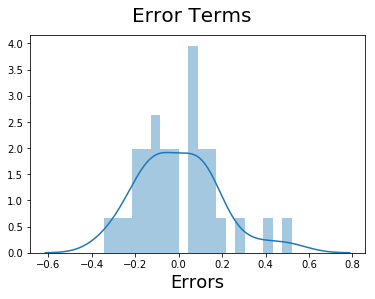

In [1574]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions on Test data

In [1575]:
Consumer_Elec_Climate_HomeAudio_Master_ML_test.head()

gmv_sum  units_sum  sla_mean  product_mrp_mean  product_mrp_sum  product_procurement_sla_mean  Weekly_Investment_Total_mean  Weekly_Investment_TV_mean  Weekly_Investment_Digital_mean  Weekly_Investment_Sponsorship_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Online_Marketing_mean  Weekly_Investment_affiliates_mean  Weekly_Investment_SEM_mean  Weekly_Investment_Radio_mean  Weekly_Investment_Other_mean  Monthly_NPS_mean  Pay_Day_Flag  COD_Payment_Percentage  Prepaid_Payment_Percentage  Sale_Week_Flag  Rain_Flag  Snow_Flag  Max Temp (°C)_max  Min Temp (°C)_min  gmv_sum_Lag
6   2268.0     3392.0     5.026535  4102.114490       13758492.0       2.355397                      10.680000                     0.570000                   0.430000                        2.61000                             0.130000                                  4.420000                                 1.440000                           1.080000                    0.0                           0.0                           50.300000         1.0           80.381634               19.618366                   0.0             0          0          17.5              -12.0               0.0        
36  3918162.0  2121.0     6.380795  3045.946547       6439131.0        2.459792                      30.757323                     1.150946                   1.726206                        16.72825                            0.499404                                  4.655459                                 1.365307                           4.637455                    0.0                           0.0                           45.473794         1.0           77.814570               22.185430                   0.0             1          0          26.5               8.0                2268.0     
37  3310758.0  1863.0     5.967532  2960.149892       5470357.0        2.564935                      37.810000                     1.370000                   2.800000                        18.82000                            0.770000                                  5.420000                                 1.550000                           7.090000                    0.0                           0.0                           44.400000         0.0           79.816017               20.183983                   0.0             0          0          23.0               10.0               3918162.0  
28  4949069.0  2401.0     6.822250  3336.889168       7978502.0        2.628189                      3.790000                      0.050000                   0.560000                        1.65000                             0.000000                                  0.290000                                 0.120000                           1.120000                    0.0                           0.0                           54.600000         1.0           75.993308               24.006692                   1.0             1          0          33.0               11.0               3310758.0  
43  3716317.0  1854.0     5.881971  3502.038982       6468266.0        2.479155                      11.380000                     0.940000                   0.280000                        3.15000                             0.040000                                  4.350000                                 1.470000                           1.160000                    0.0                           0.0                           47.000000         0.0           81.645912               18.354088                   0.0             1          1          16.0              -4.0                4949069.0

In [1576]:
Consumer_Elec_Climate_HomeAudio_Master_ML_test[columns] = scaler.transform(Consumer_Elec_Climate_HomeAudio_Master_ML_test[columns])
X_test = Consumer_Elec_Climate_HomeAudio_Master_ML_test[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = Consumer_Elec_Climate_HomeAudio_Master_ML_test['gmv_sum']

In [1577]:
X_test_sm.head()

const  units_sum  Weekly_Investment_TV_mean  Weekly_Investment_Content_Marketing_mean  Weekly_Investment_Radio_mean  Sale_Week_Flag  Min Temp (°C)_min
6   1.0    0.809501   0.275362                   0.168831                                  0.0                           0.0             0.000000         
36  1.0    0.506087   0.556013                   0.648577                                  0.0                           0.0             0.677966         
37  1.0    0.444497   0.661836                   1.000000                                  0.0                           0.0             0.745763         
28  1.0    0.572929   0.024155                   0.000000                                  0.0                           1.0             0.779661         
43  1.0    0.442349   0.454106                   0.051948                                  0.0                           0.0             0.271186

In [1578]:
y_pred = lr_2.predict(X_test_sm)

Text(0,0.5,'y_pred')

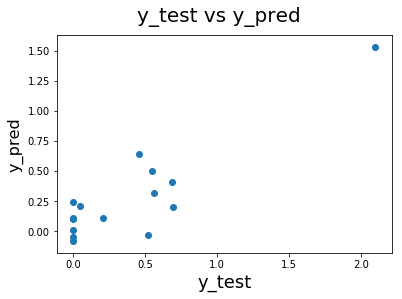

In [1579]:
#predicted_train_test_scatter_plot(y_test, y_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [1580]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [1581]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  0.2785973819910156 
R-Squared Score:  0.7258138051913188


### Linear Equation of line for Home Audio Category based on Kyock model
### gmv_sum = - 0.4866 + 0.6386 * units_sum - 0.0126 * Weekly_Investment_TV_mean  + 0.4258 * Weekly_Investment_Content_Marketing_mean - 0.1742 * Weekly_Investment_Radio_mean + 0.0844 * Sale_Week_Flag + 0.5733 * Min Temp (°C)_min